(Timestamp('2023-03-01 00:00:00'), 'Rising Wedge')
(Timestamp('2023-03-02 00:00:00'), 'Rising Wedge')
(Timestamp('2023-03-03 00:00:00'), 'Rising Wedge')
(Timestamp('2023-03-06 00:00:00'), 'Rising Wedge')
(Timestamp('2023-03-08 00:00:00'), 'Rising Wedge')
(Timestamp('2023-03-09 00:00:00'), 'Rising Wedge')
(Timestamp('2023-03-10 00:00:00'), 'Rising Wedge')
(Timestamp('2023-03-13 00:00:00'), 'Rising Wedge')
(Timestamp('2023-03-14 00:00:00'), 'Rising Wedge')
(Timestamp('2023-03-15 00:00:00'), 'Rising Wedge')
(Timestamp('2023-03-16 00:00:00'), 'Rising Wedge')
(Timestamp('2023-03-17 00:00:00'), 'Falling Wedge')
(Timestamp('2023-03-20 00:00:00'), 'Falling Wedge')
(Timestamp('2023-03-21 00:00:00'), 'Falling Wedge')
(Timestamp('2023-06-27 00:00:00'), 'Rising Wedge')
(Timestamp('2023-06-28 00:00:00'), 'Rising Wedge')
(Timestamp('2023-06-30 00:00:00'), 'Rising Wedge')
(Timestamp('2023-07-03 00:00:00'), 'Rising Wedge')
(Timestamp('2023-07-04 00:00:00'), 'Rising Wedge')
(Timestamp('2023-07-05 00:00

C:\Users\Aviral Mishra\AppData\Local\Temp\ipykernel_13588\3472691309.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].annotate(pattern, (subset_data.index[-1], subset_data['Close'][-1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, color='blue')


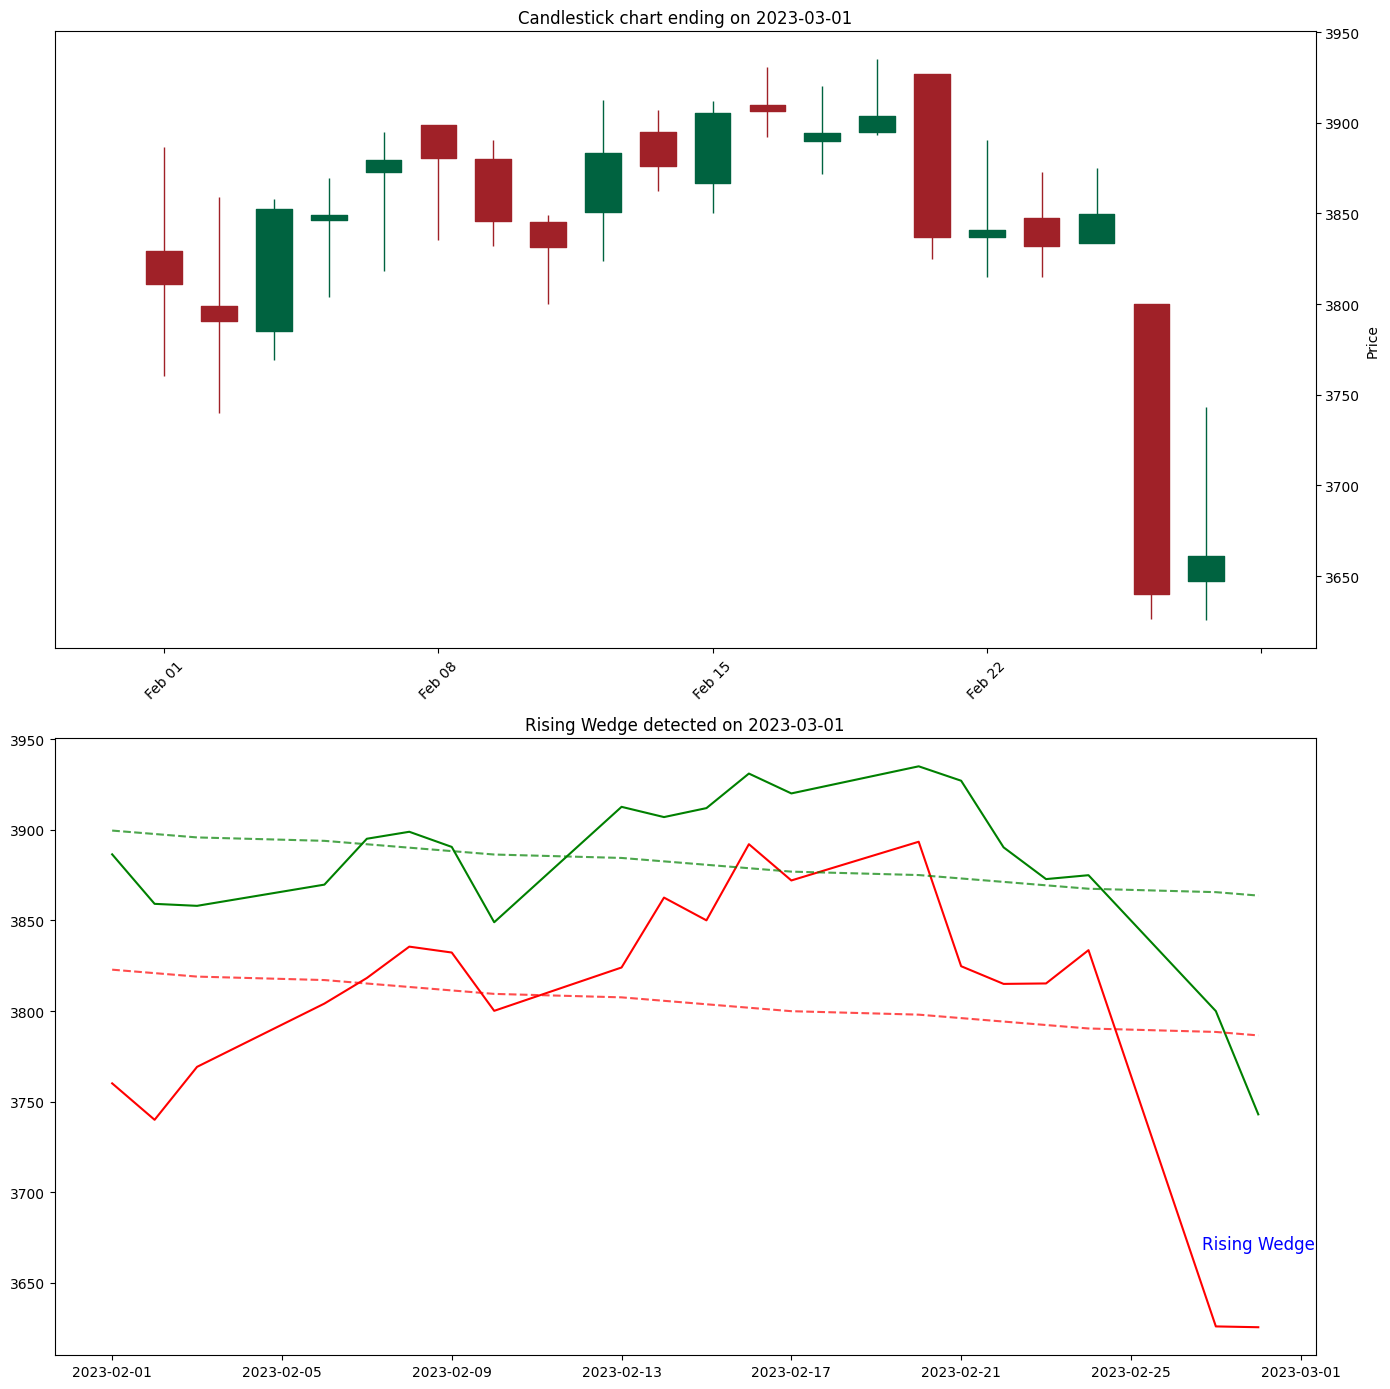

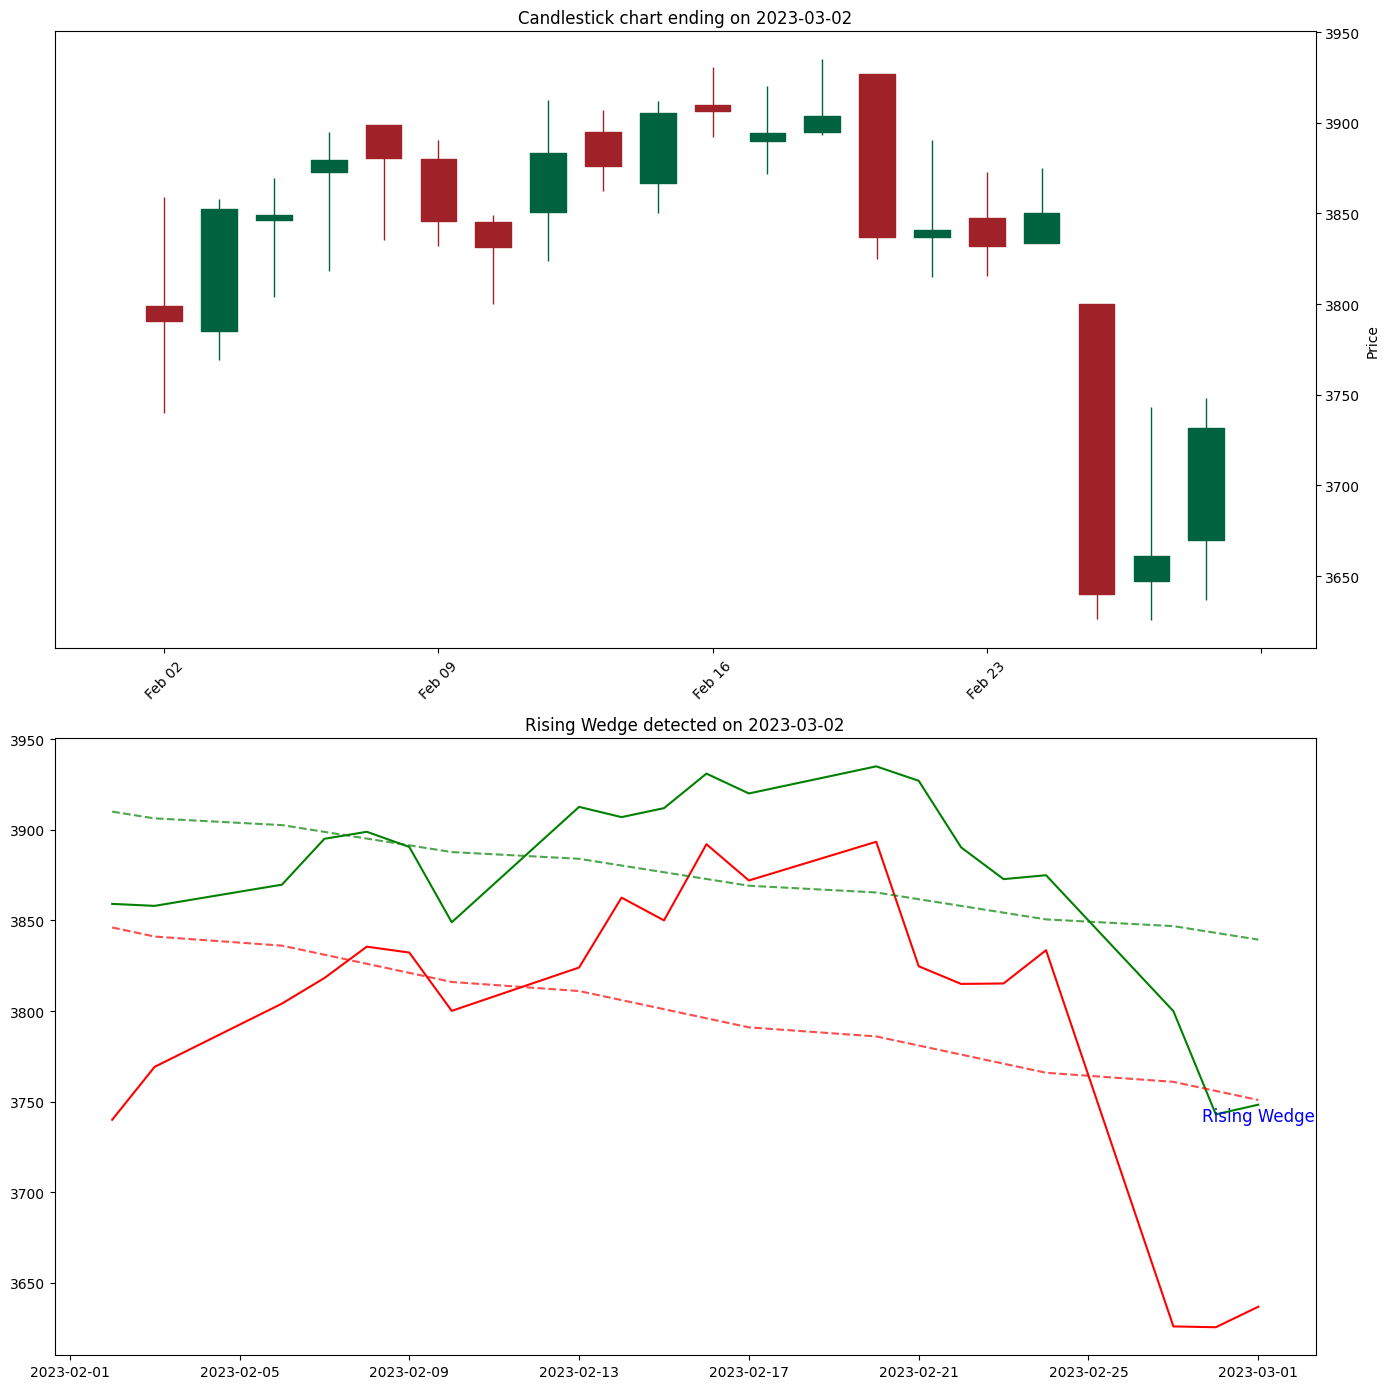

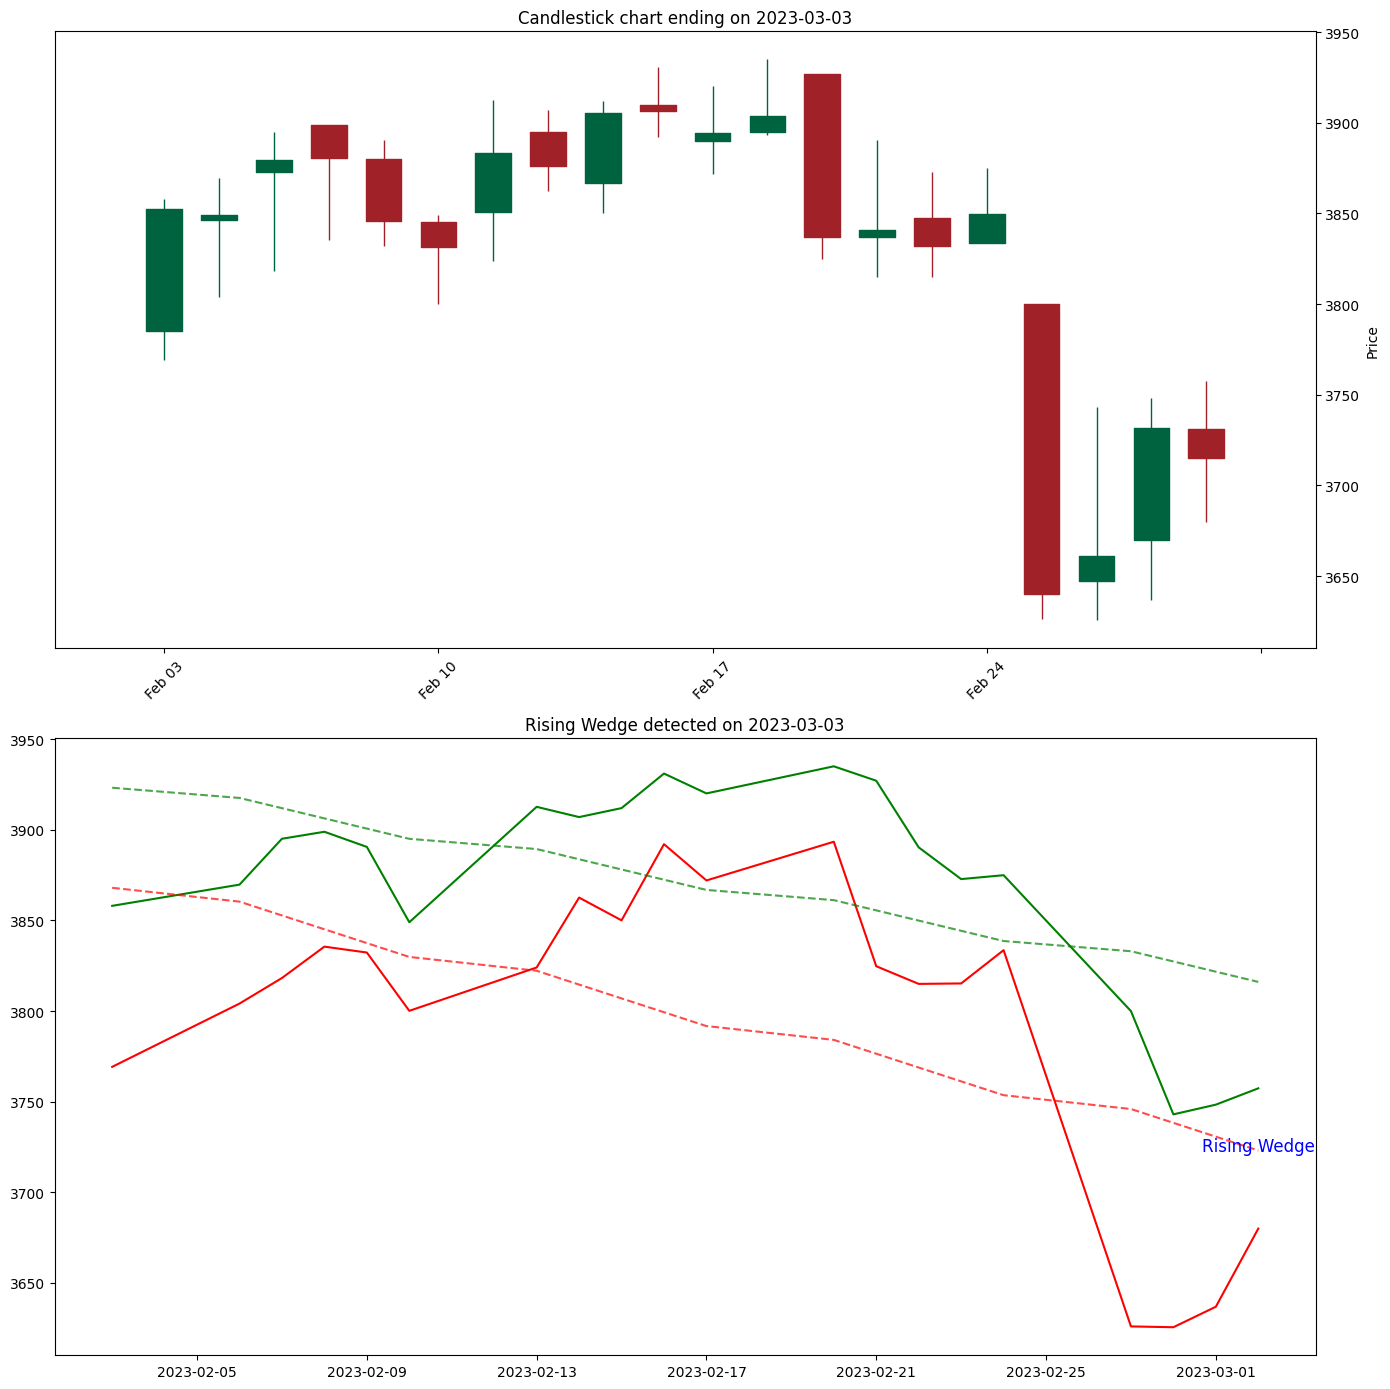

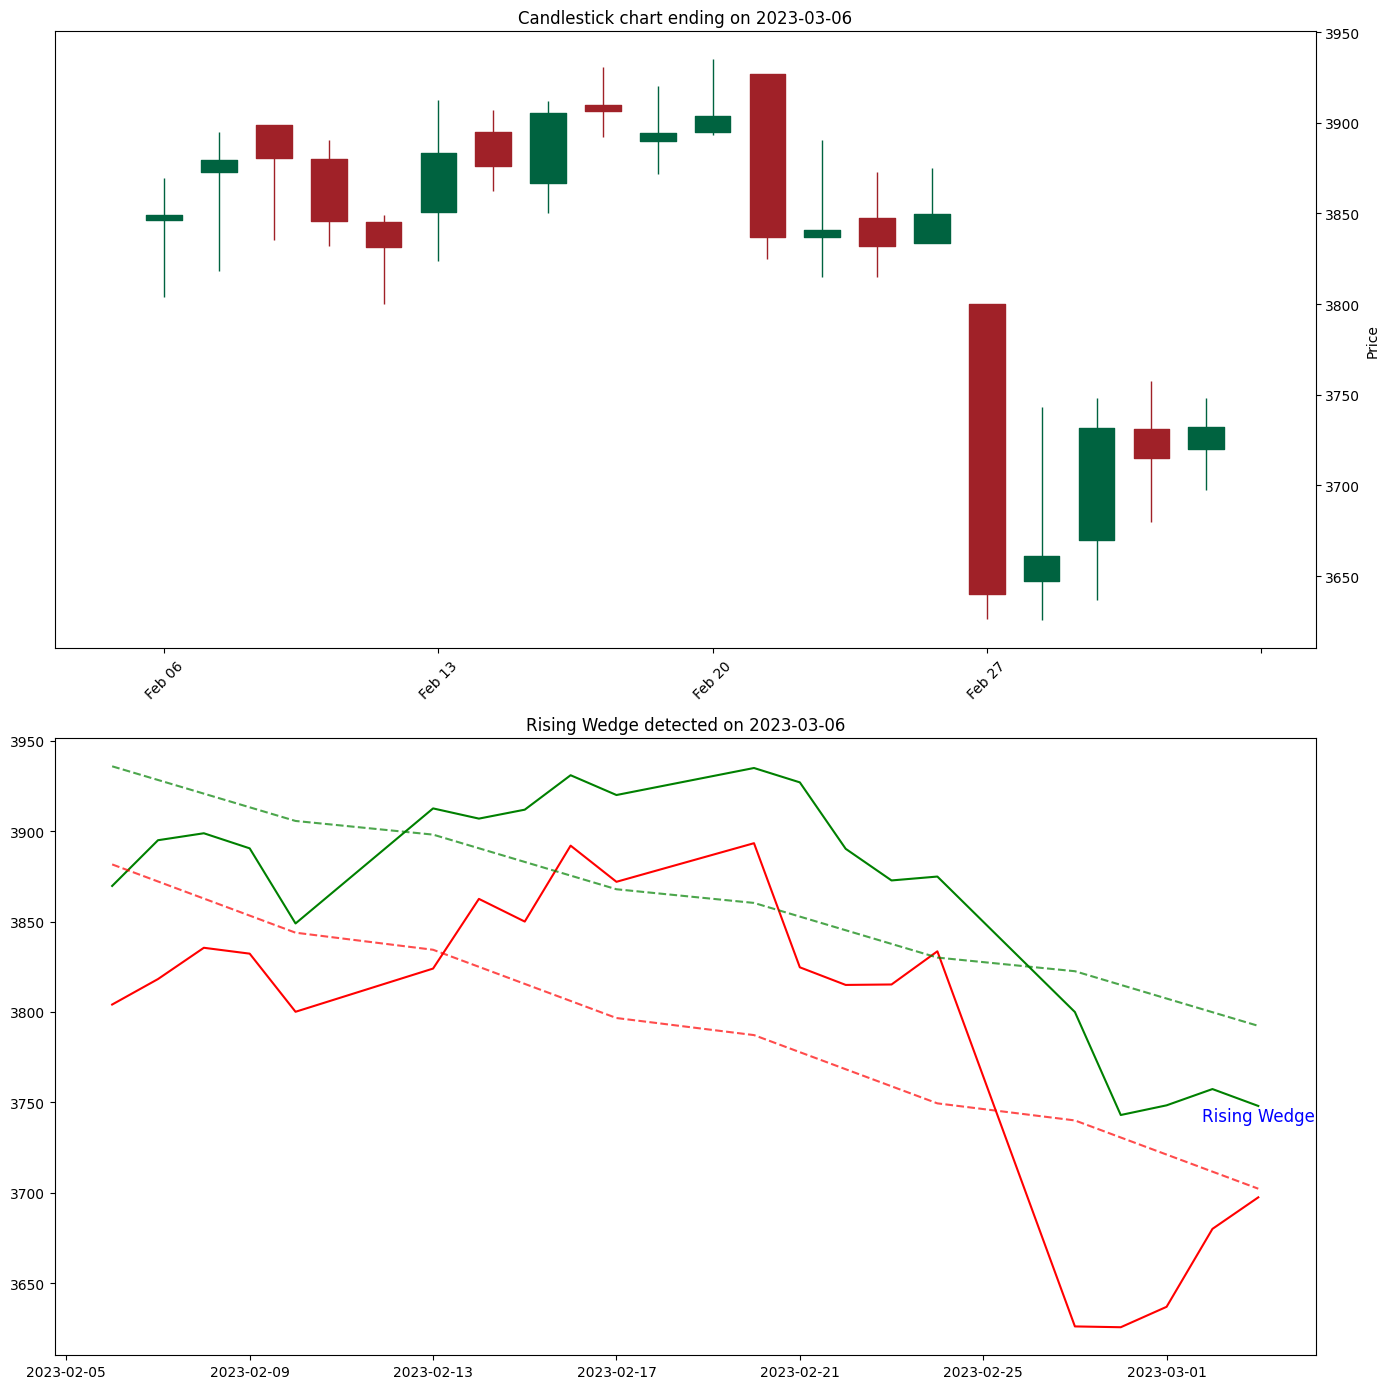

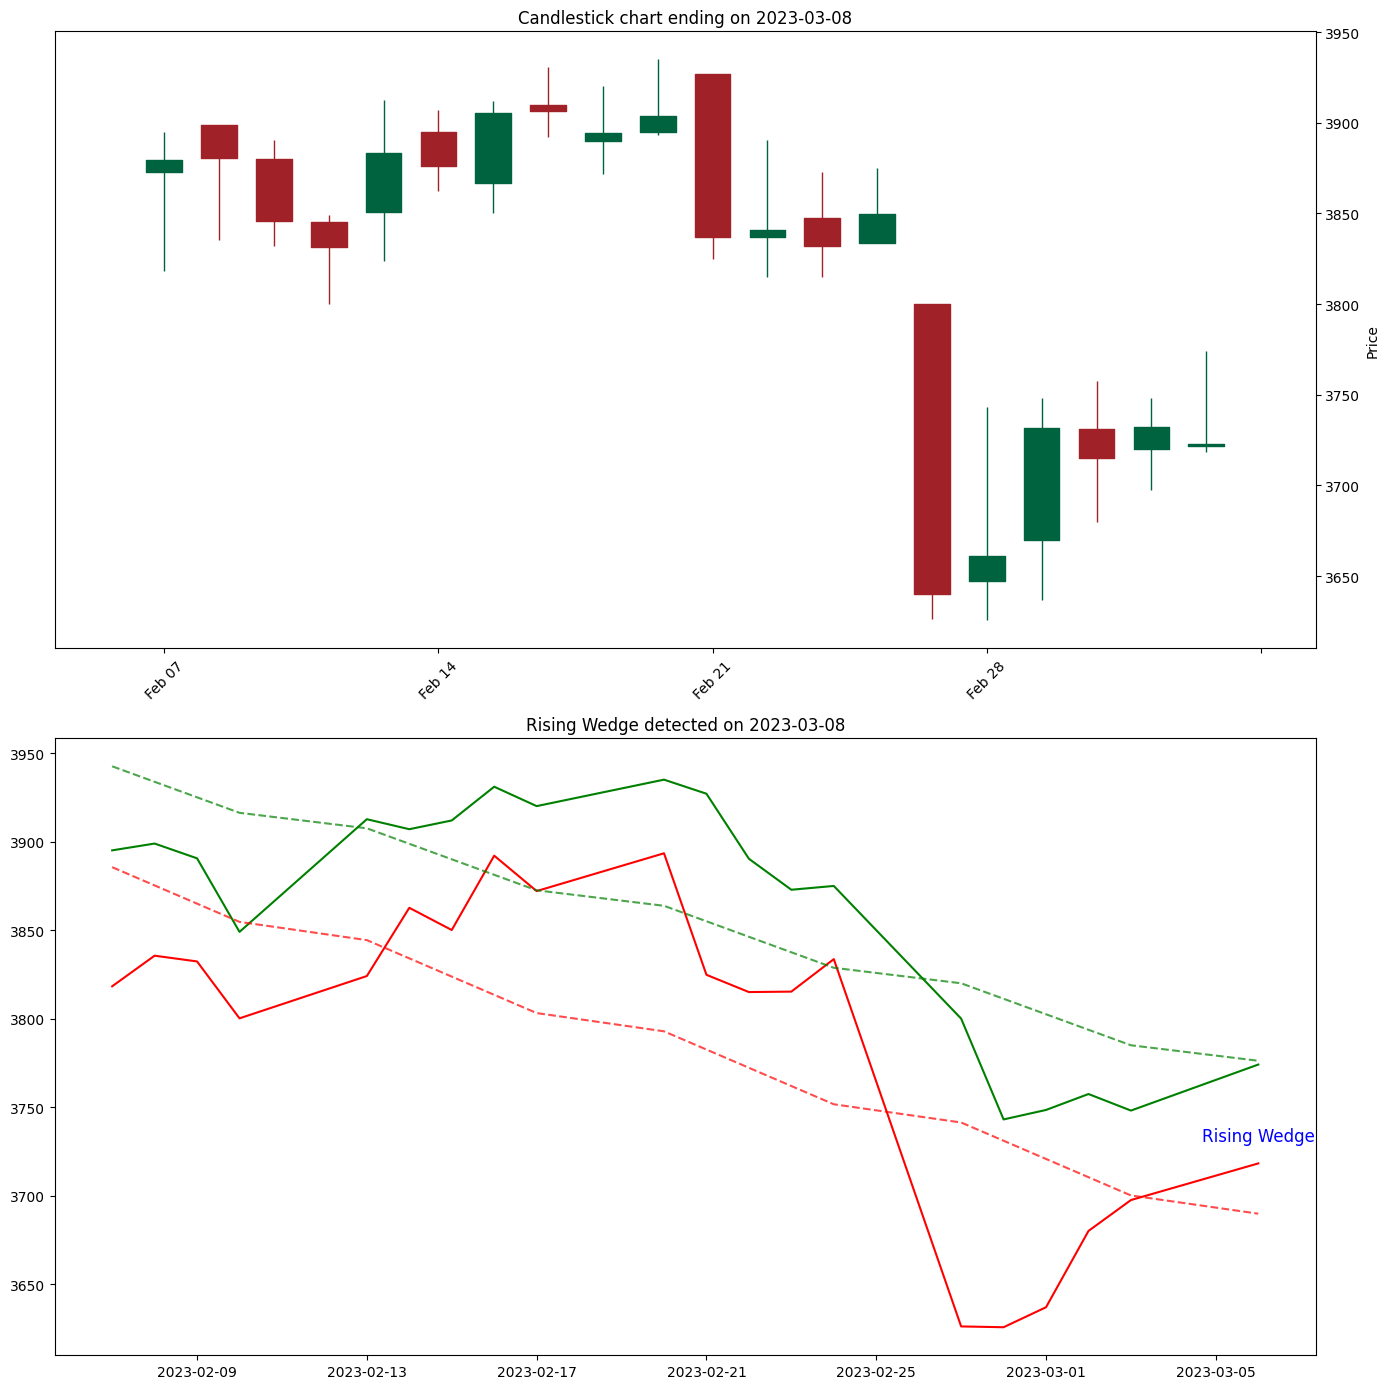

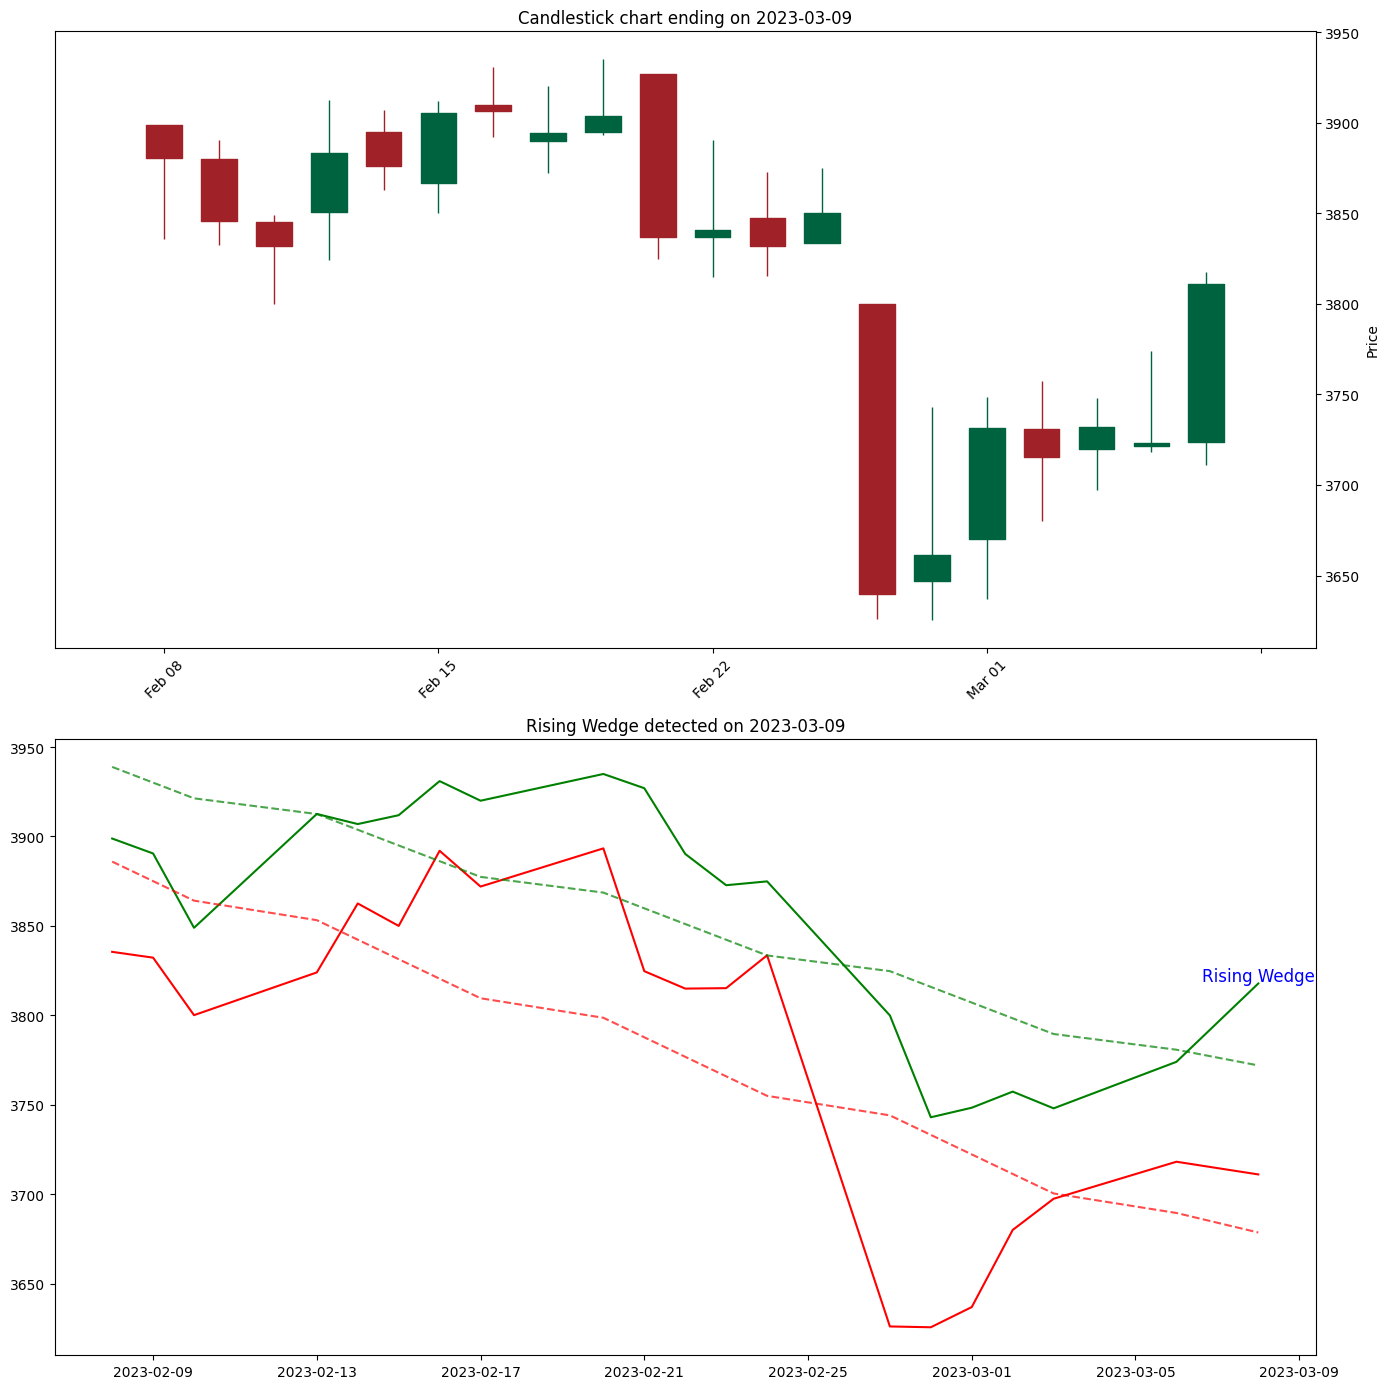

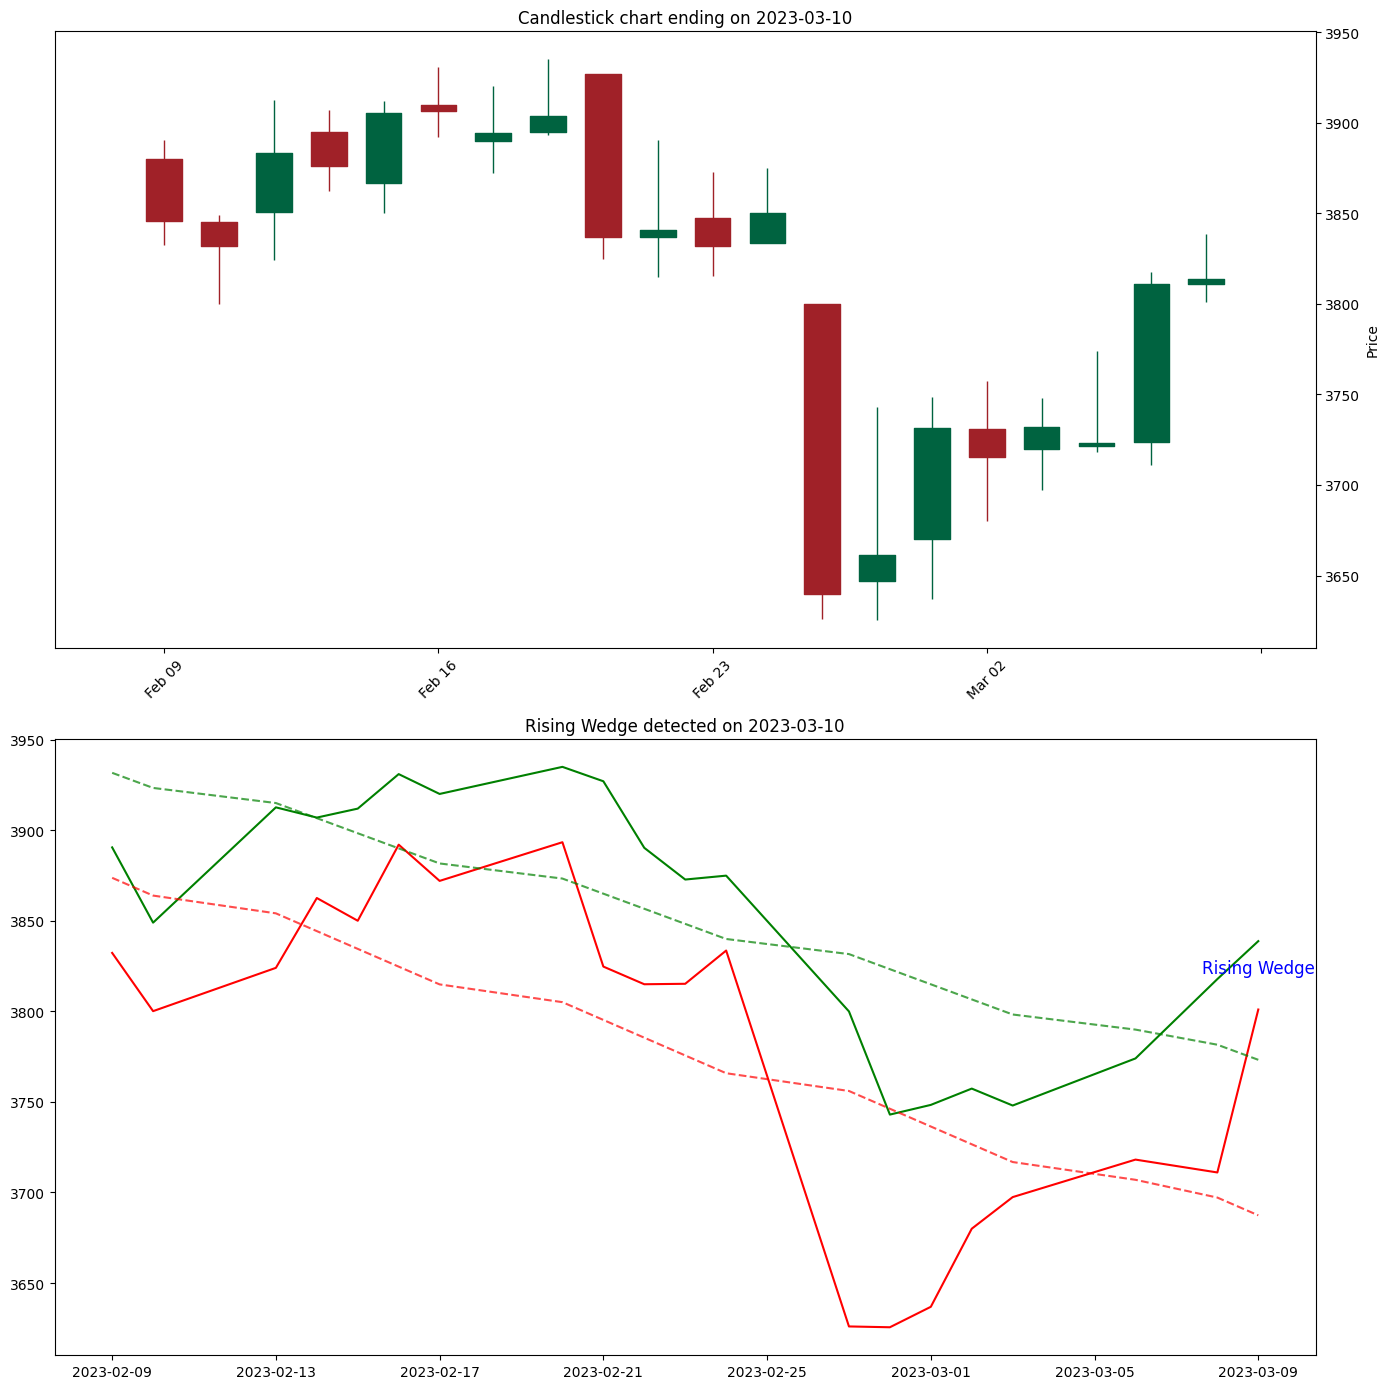

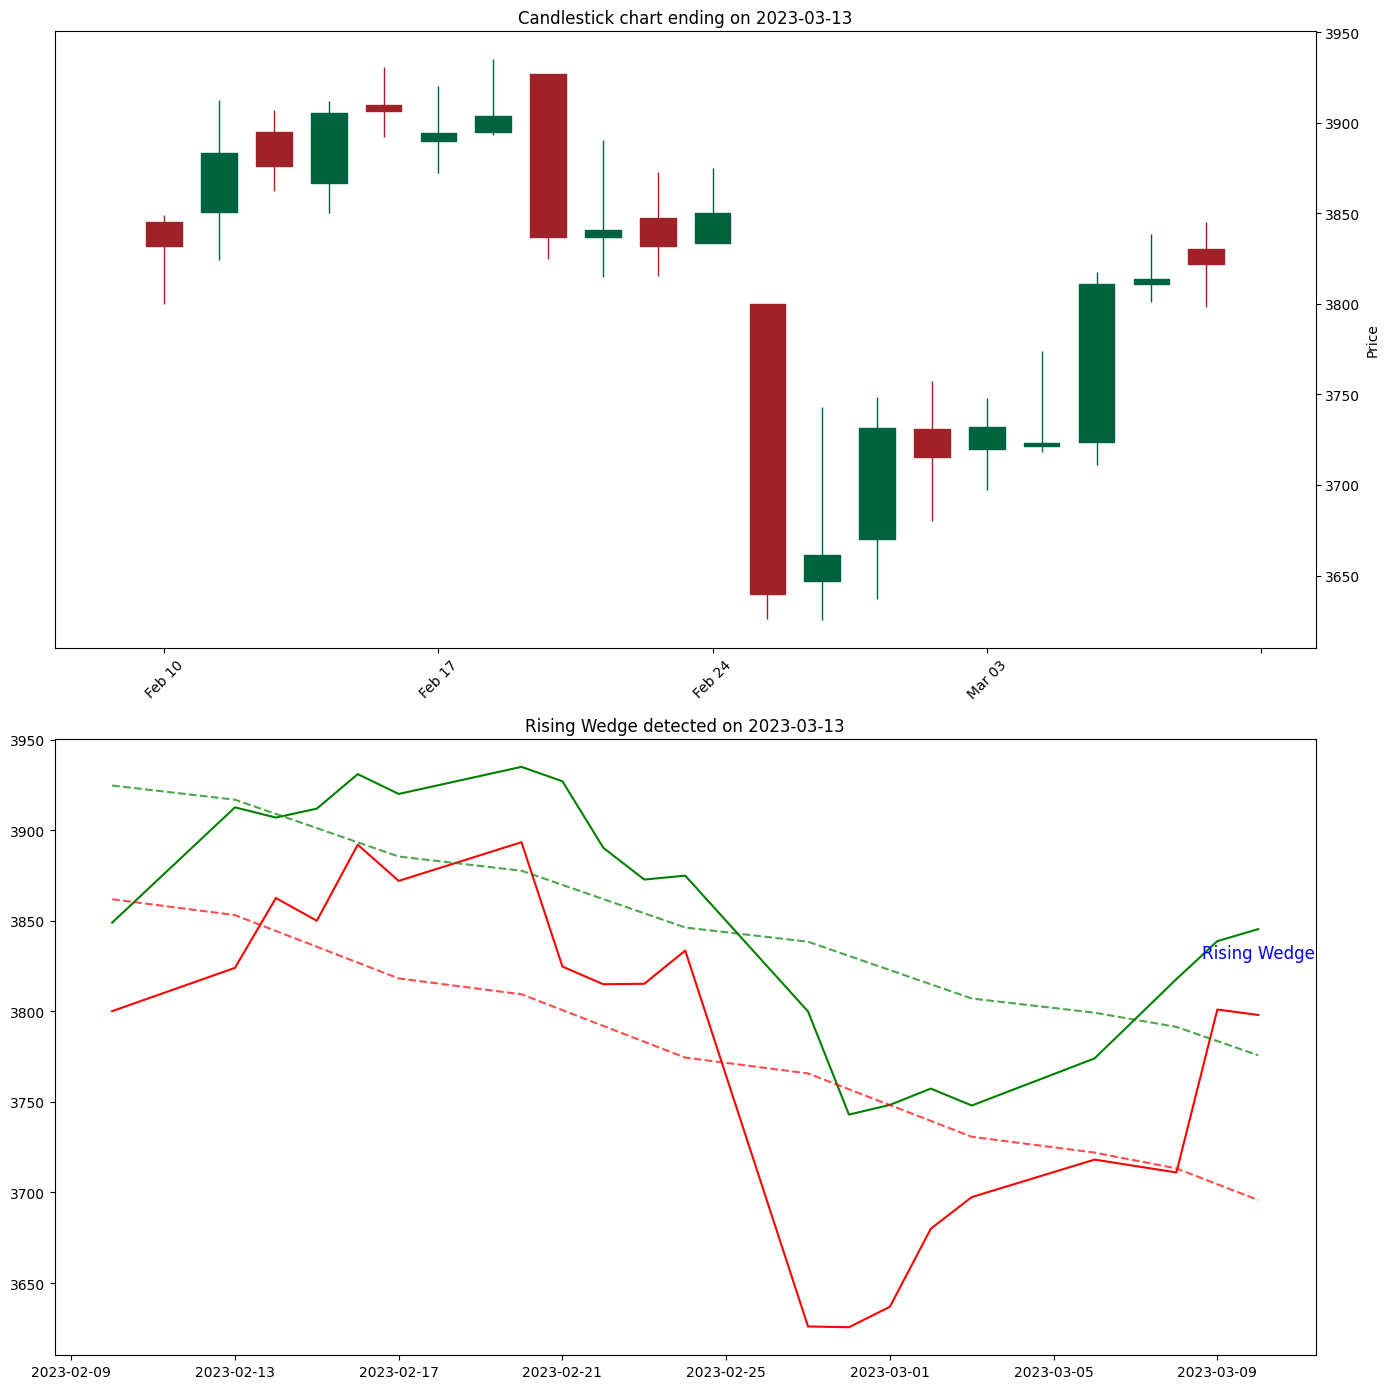

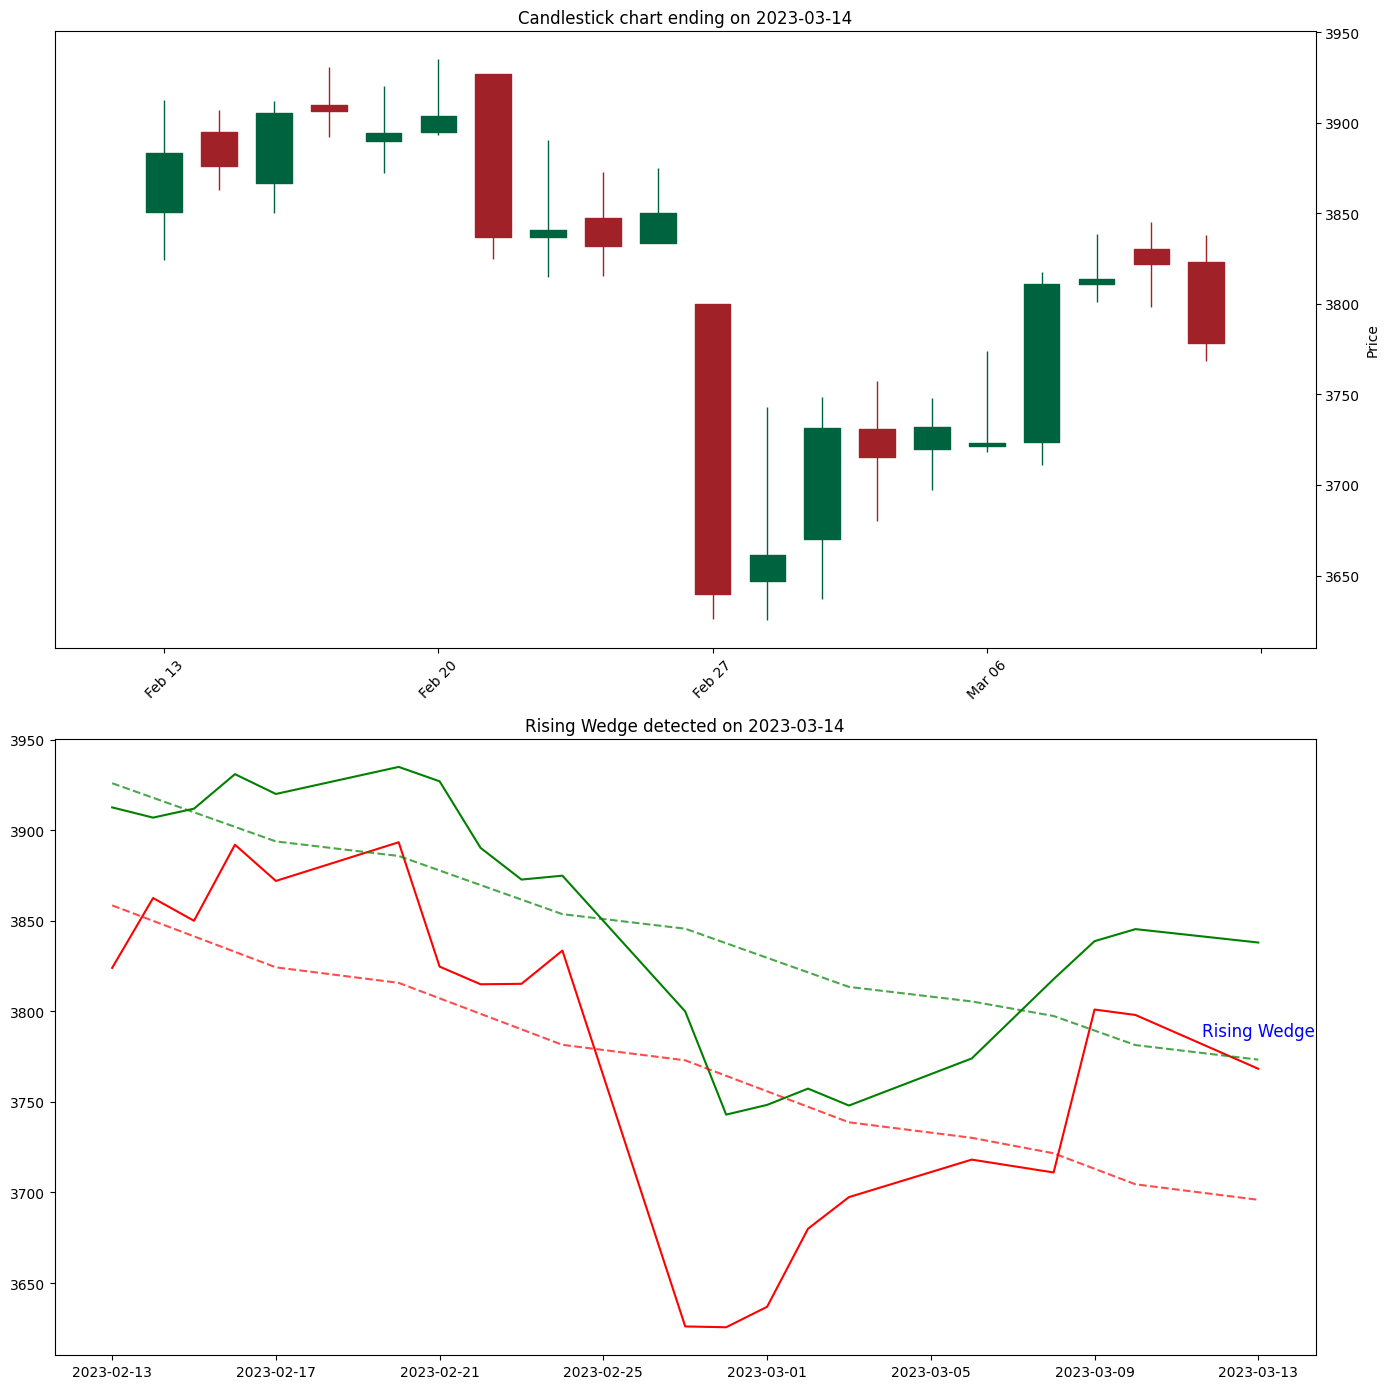

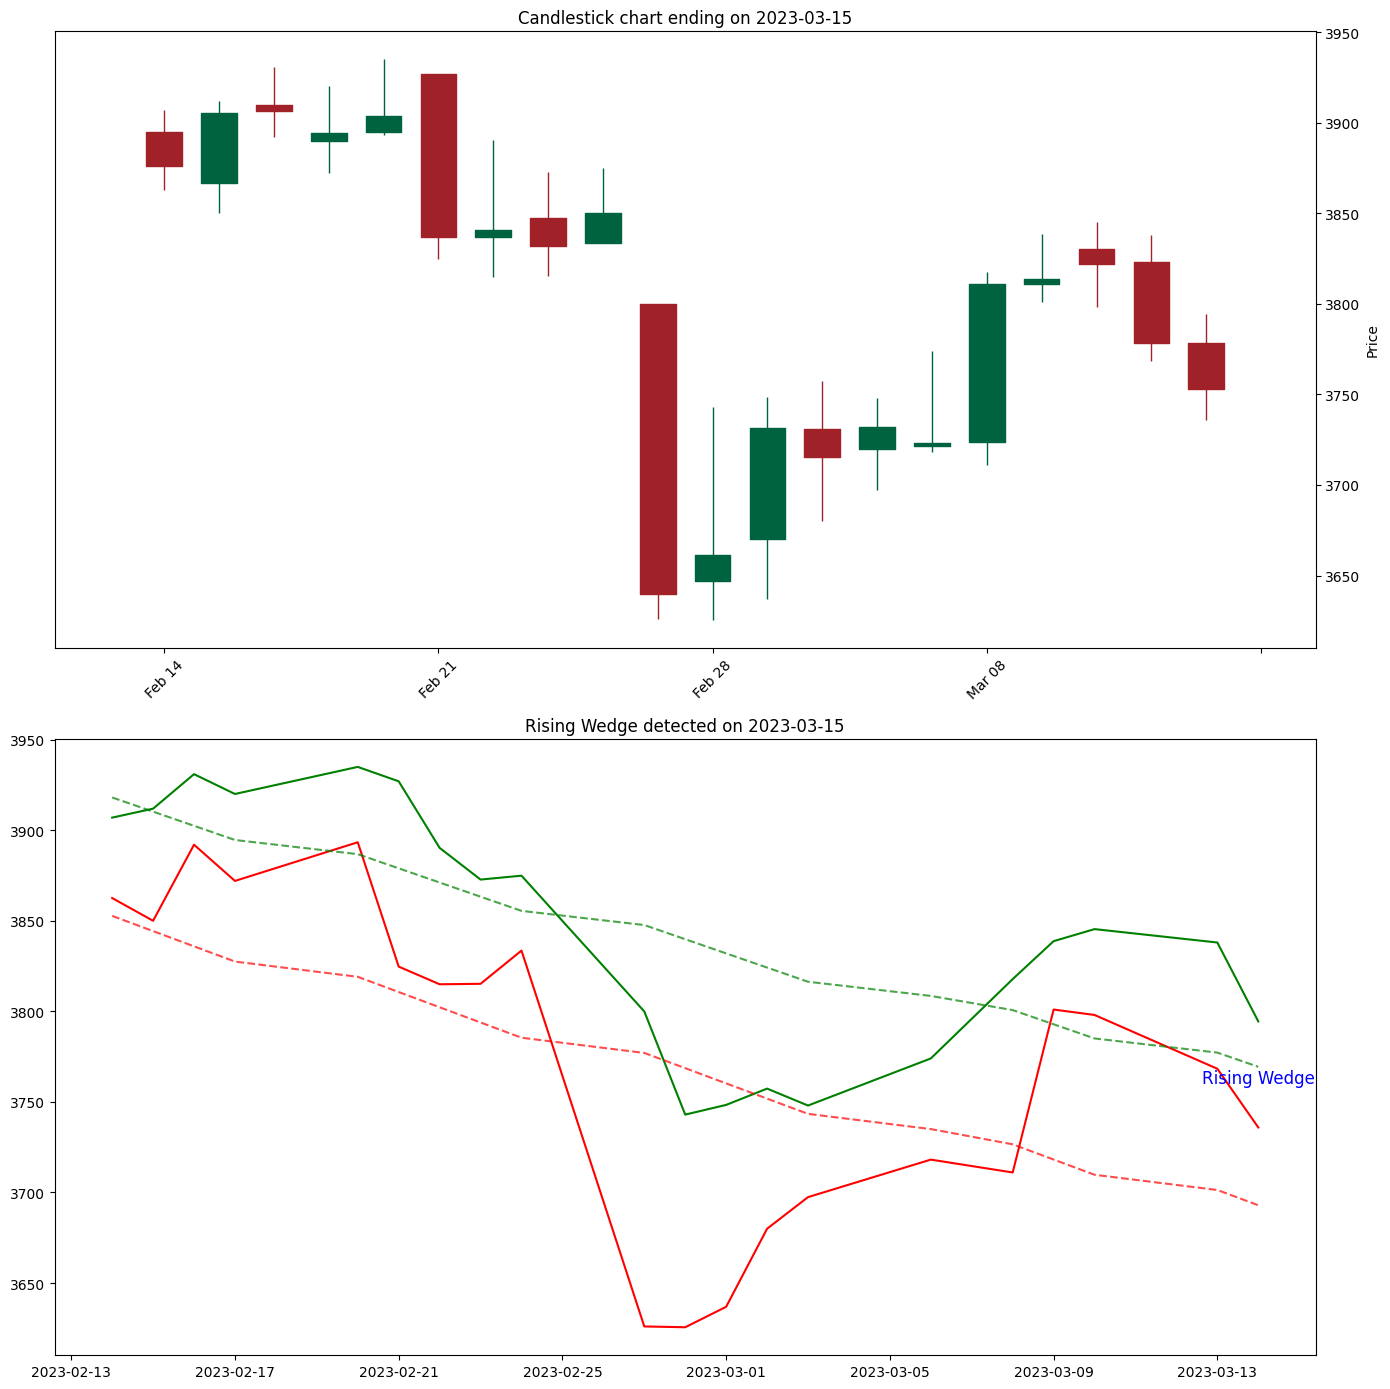

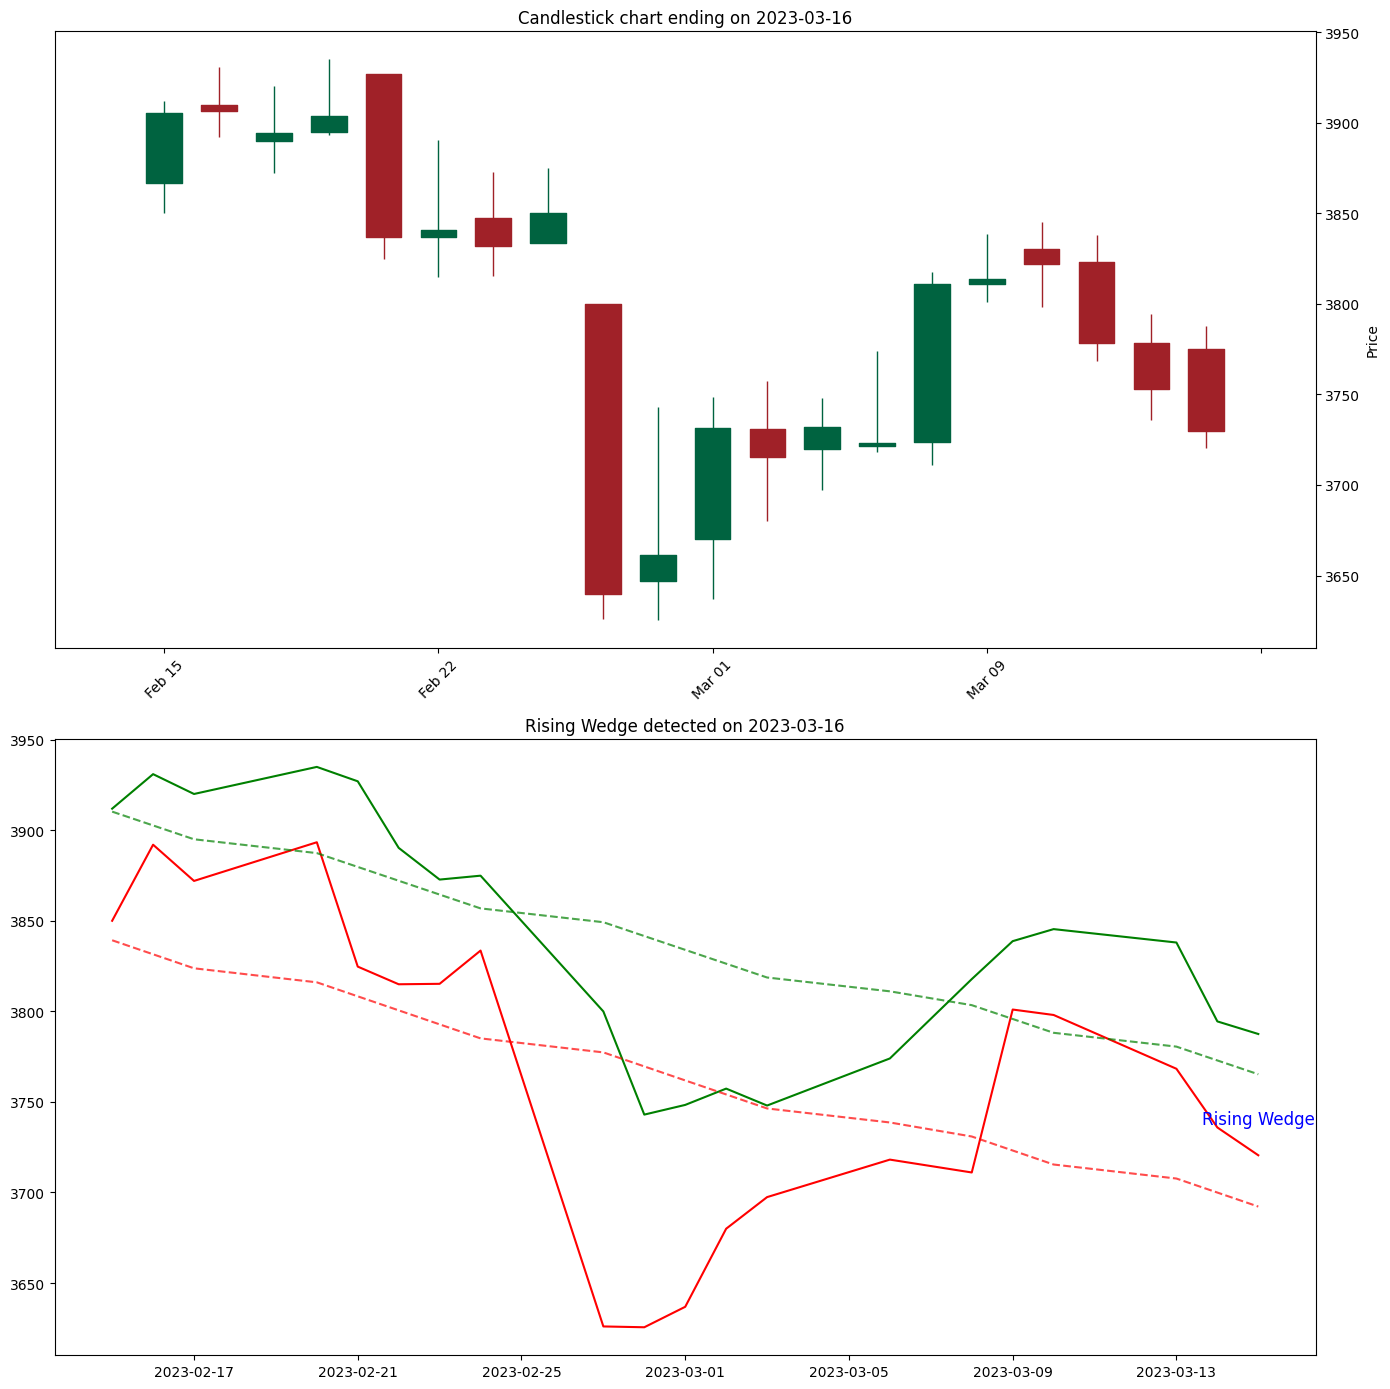

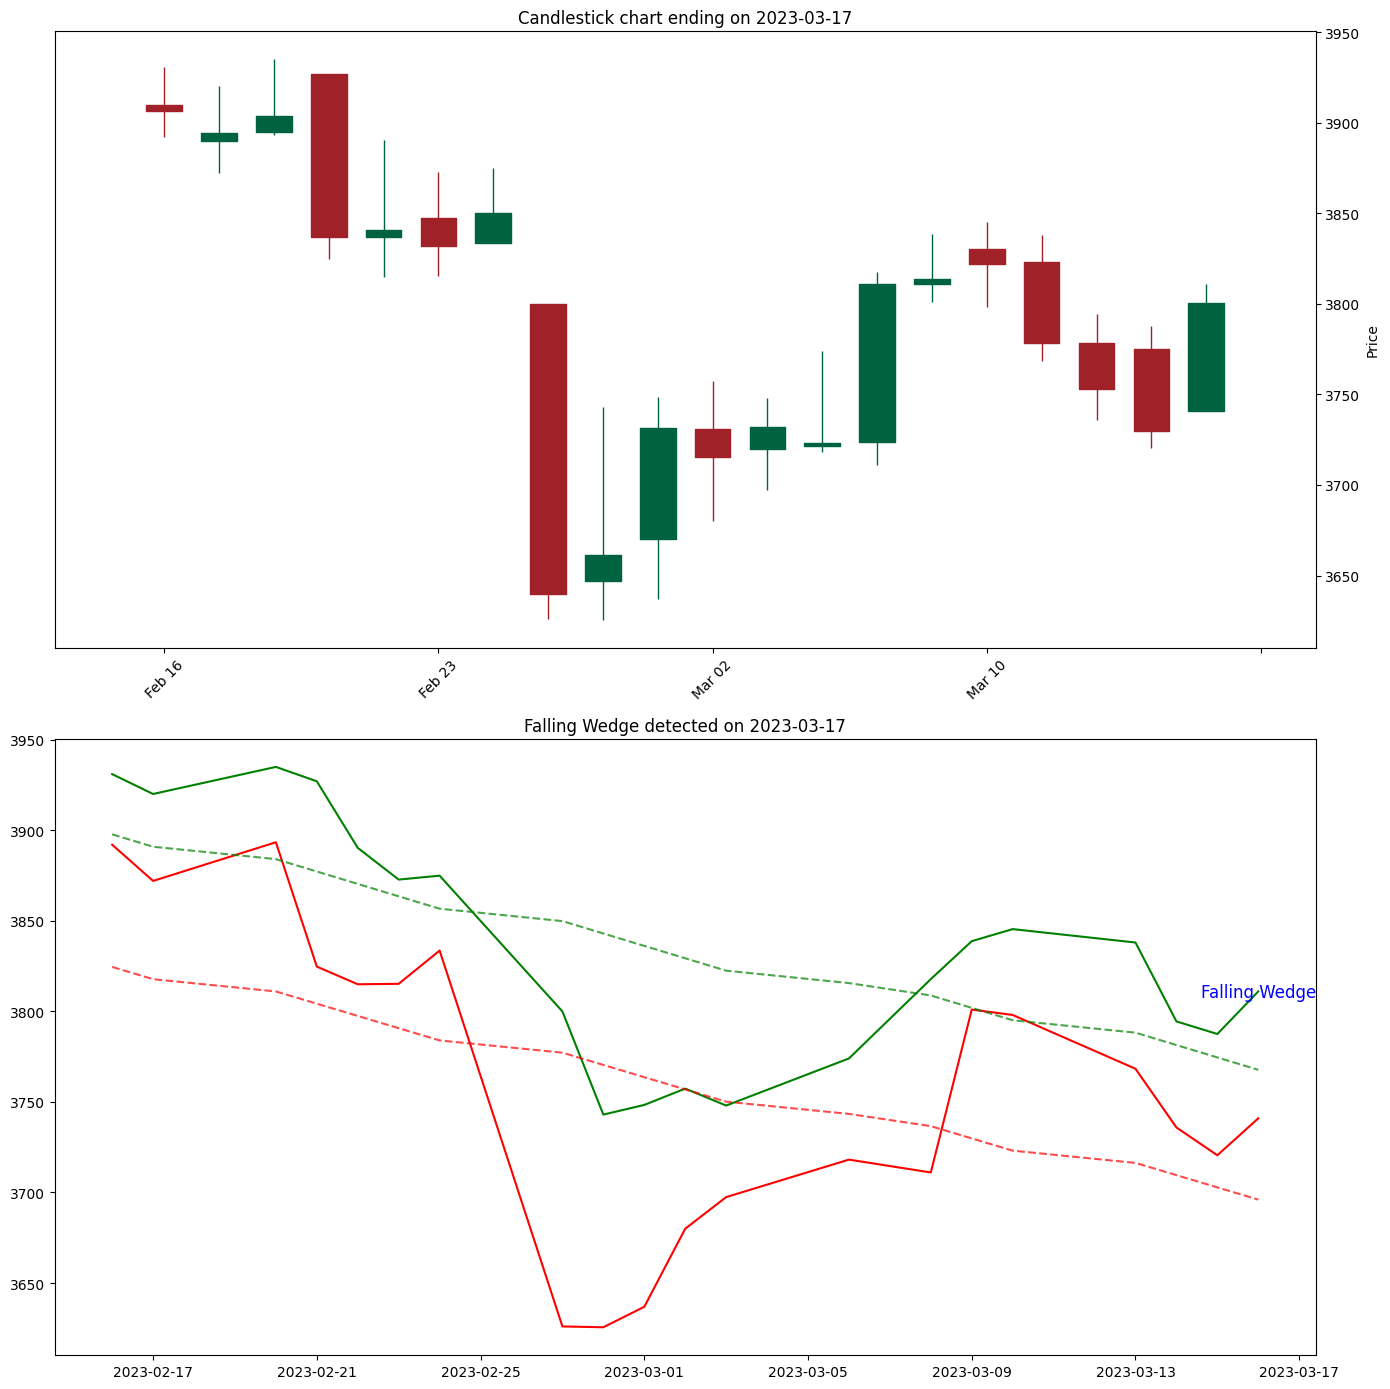

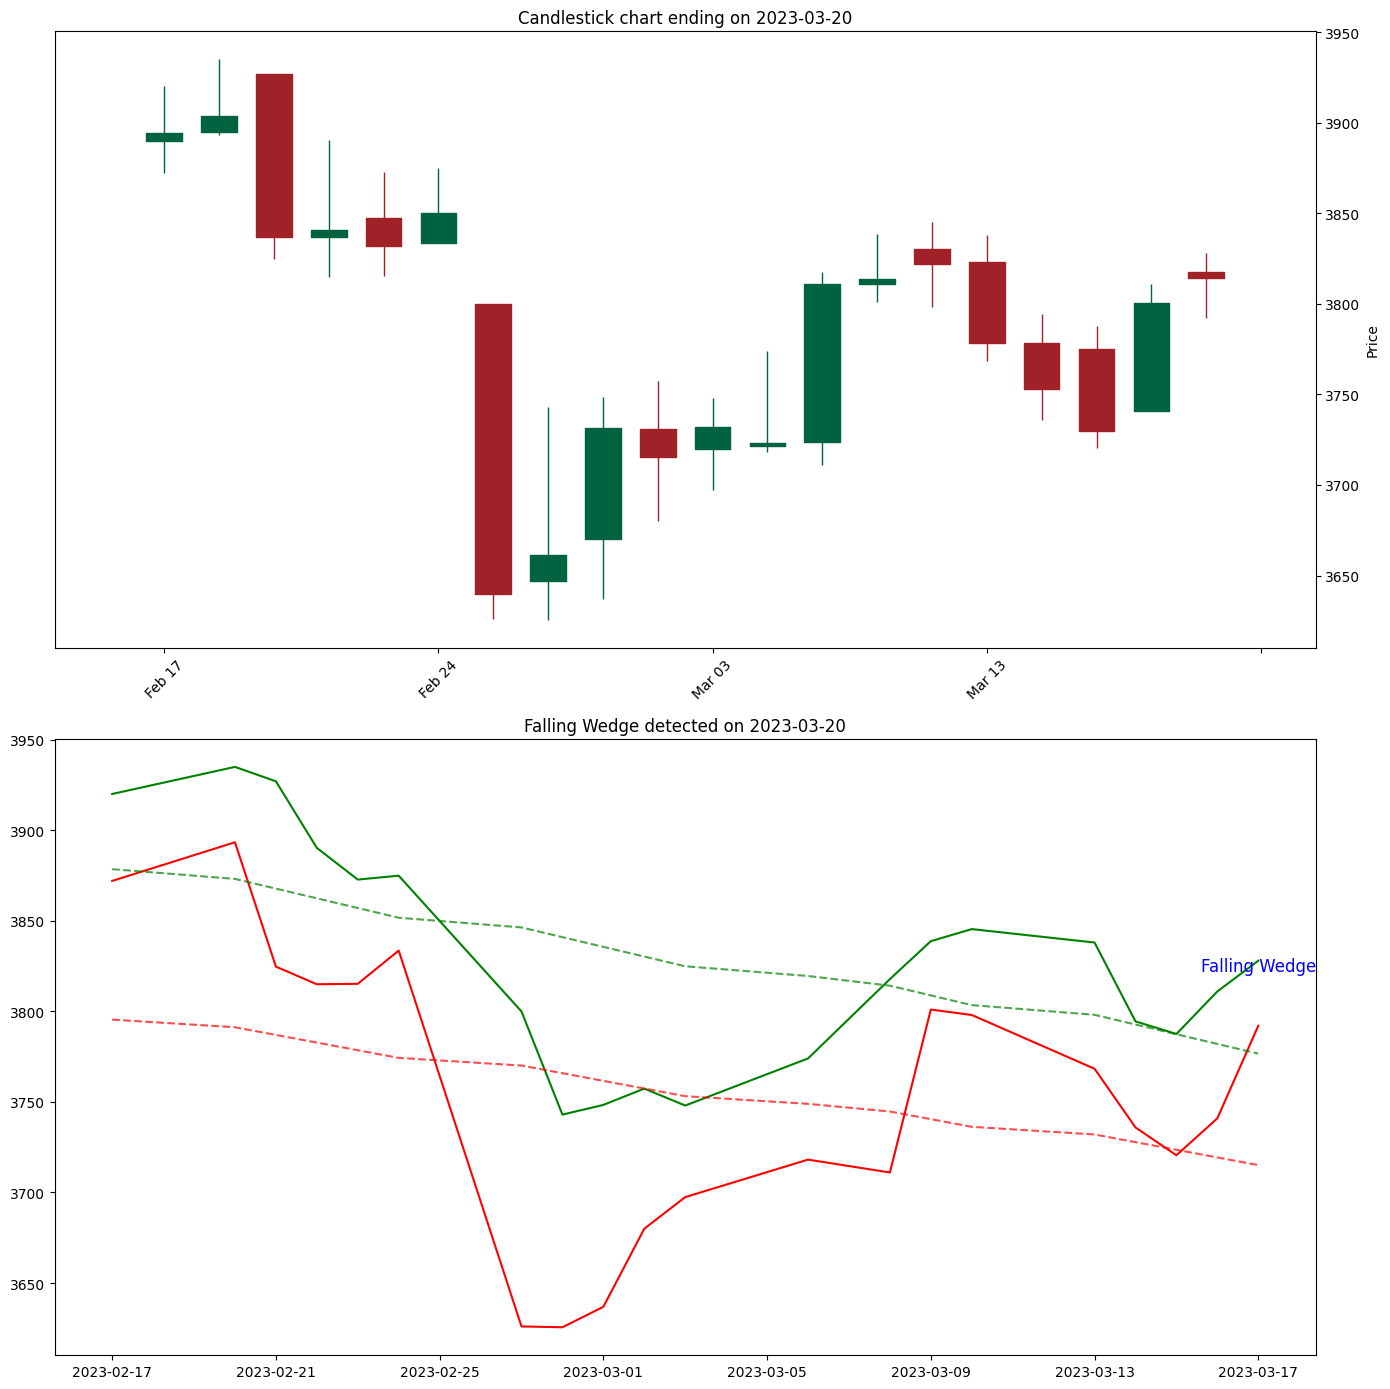

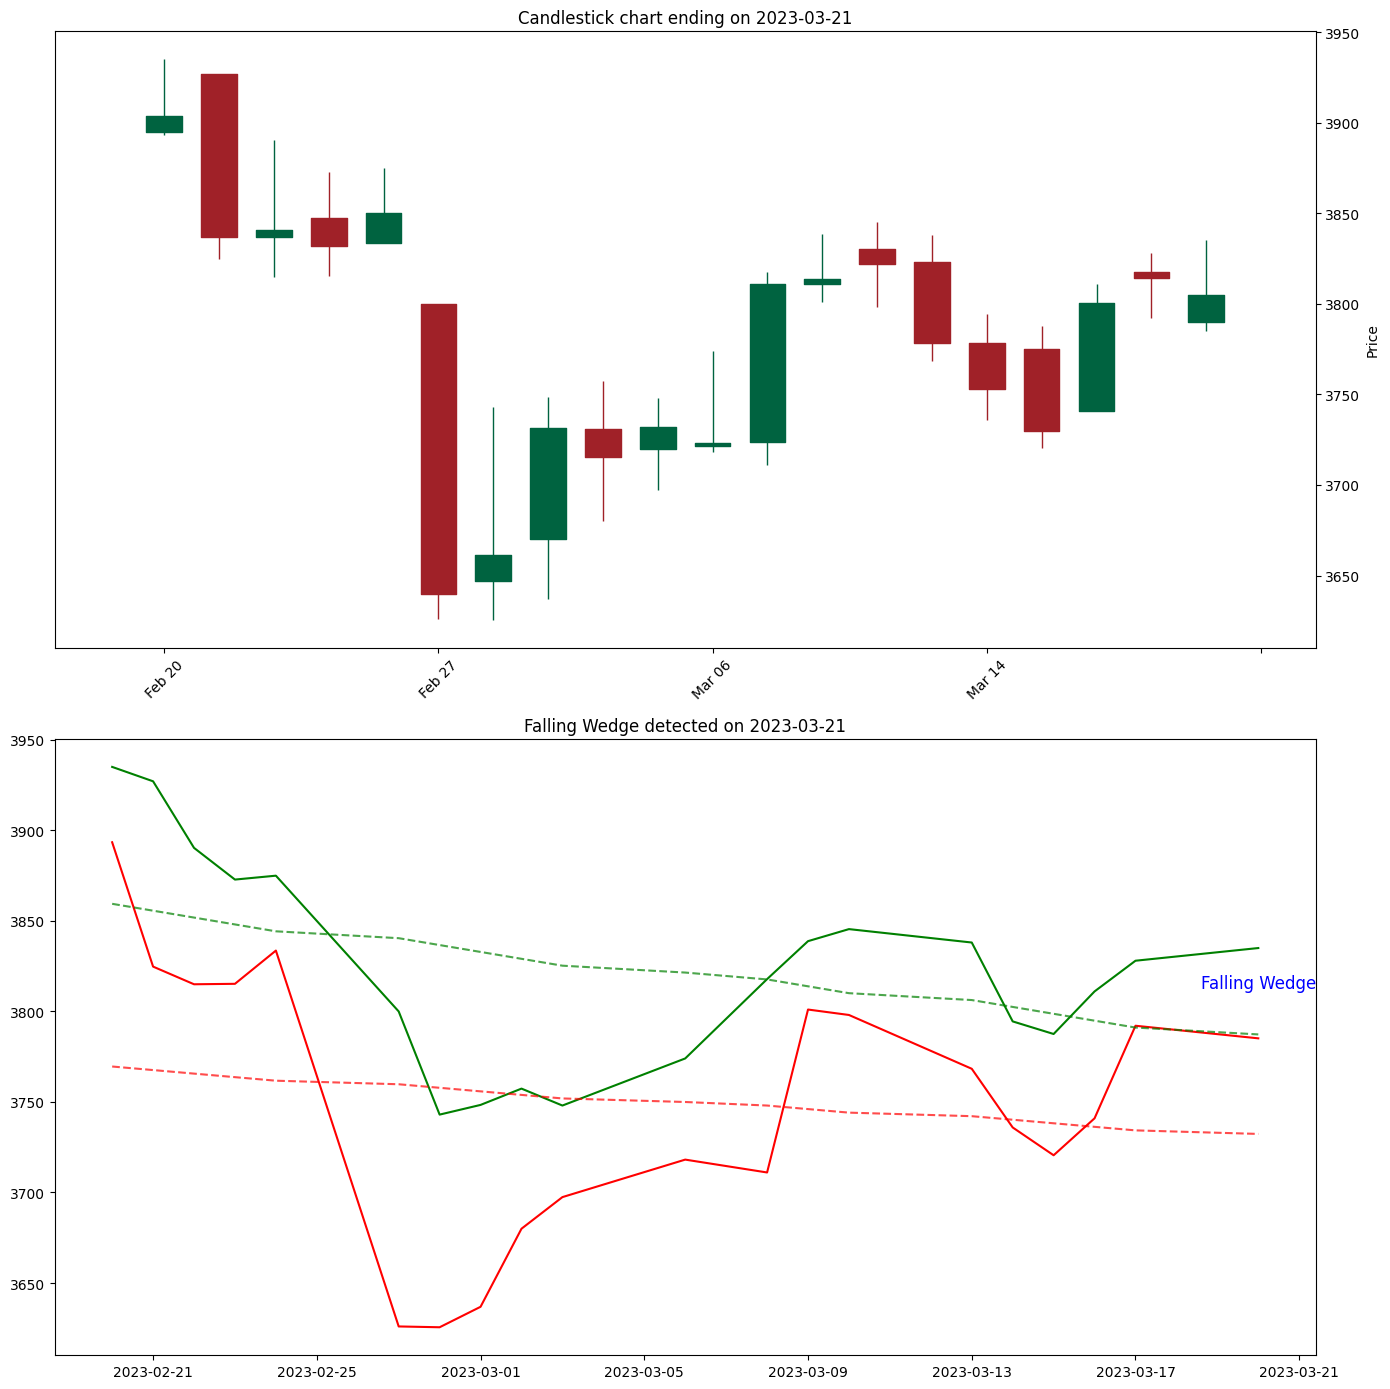

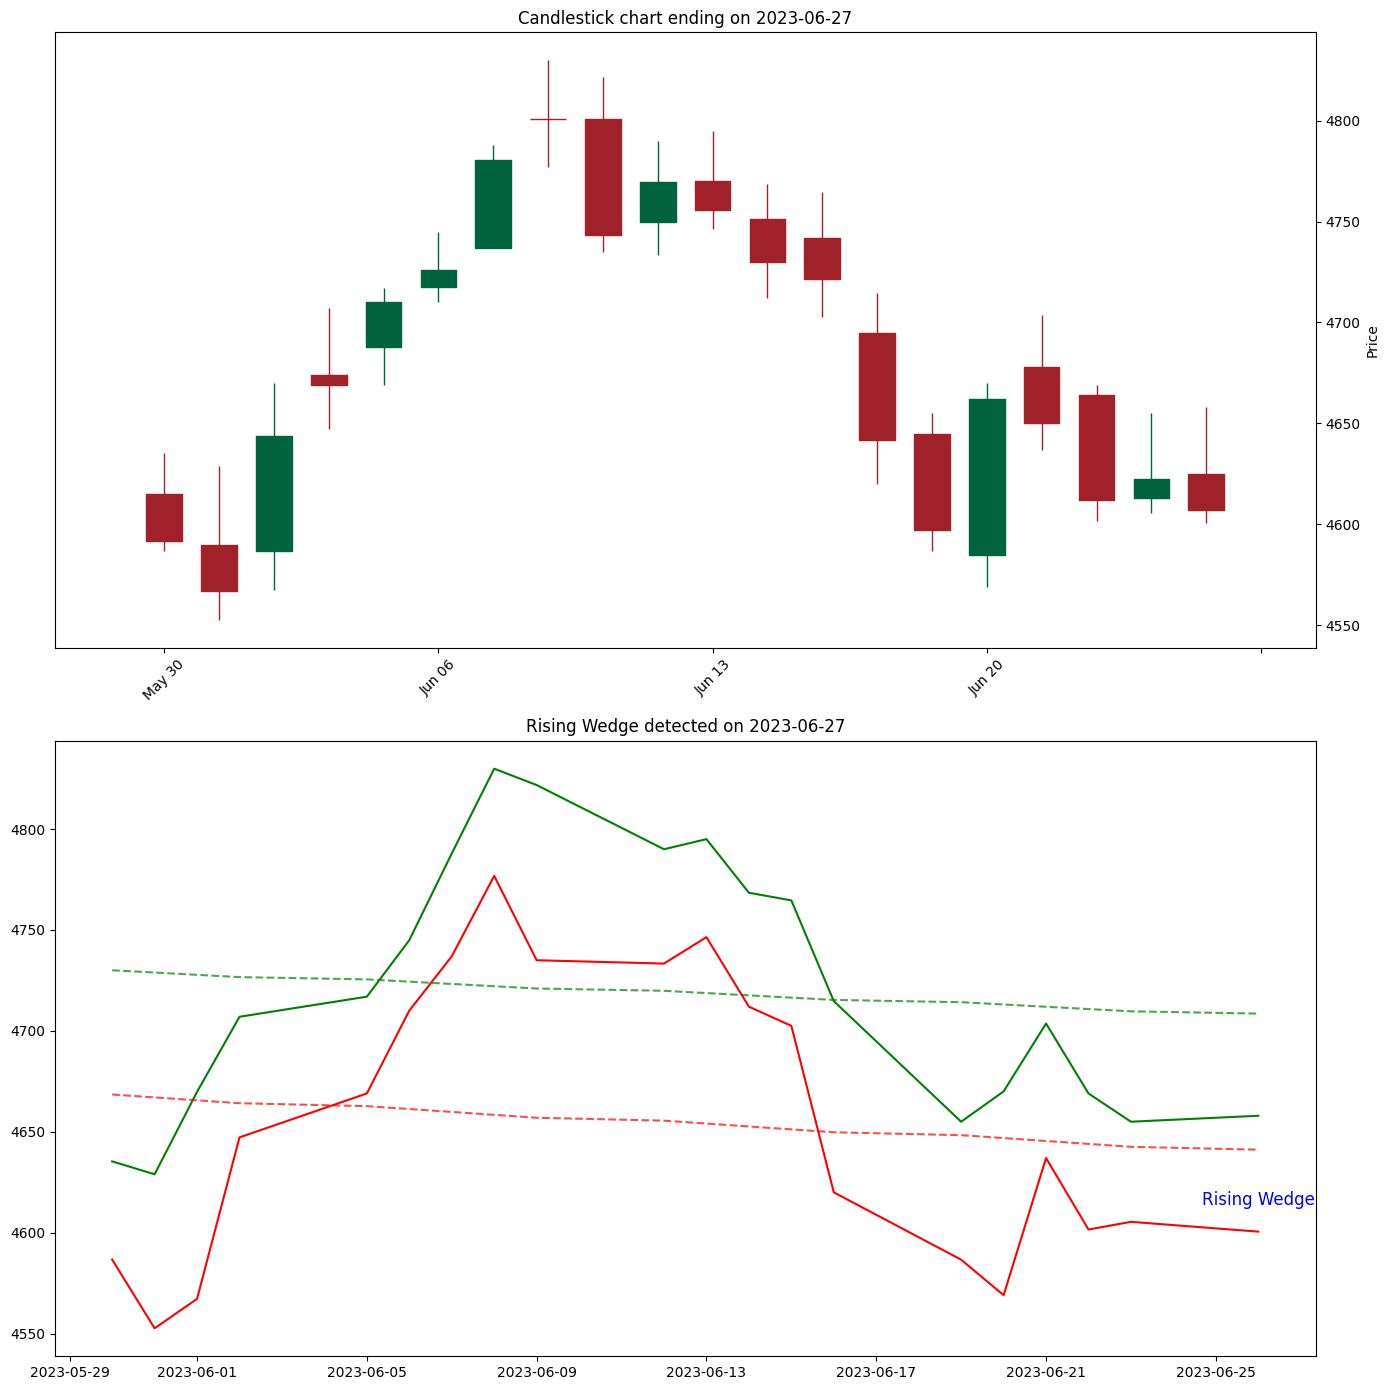

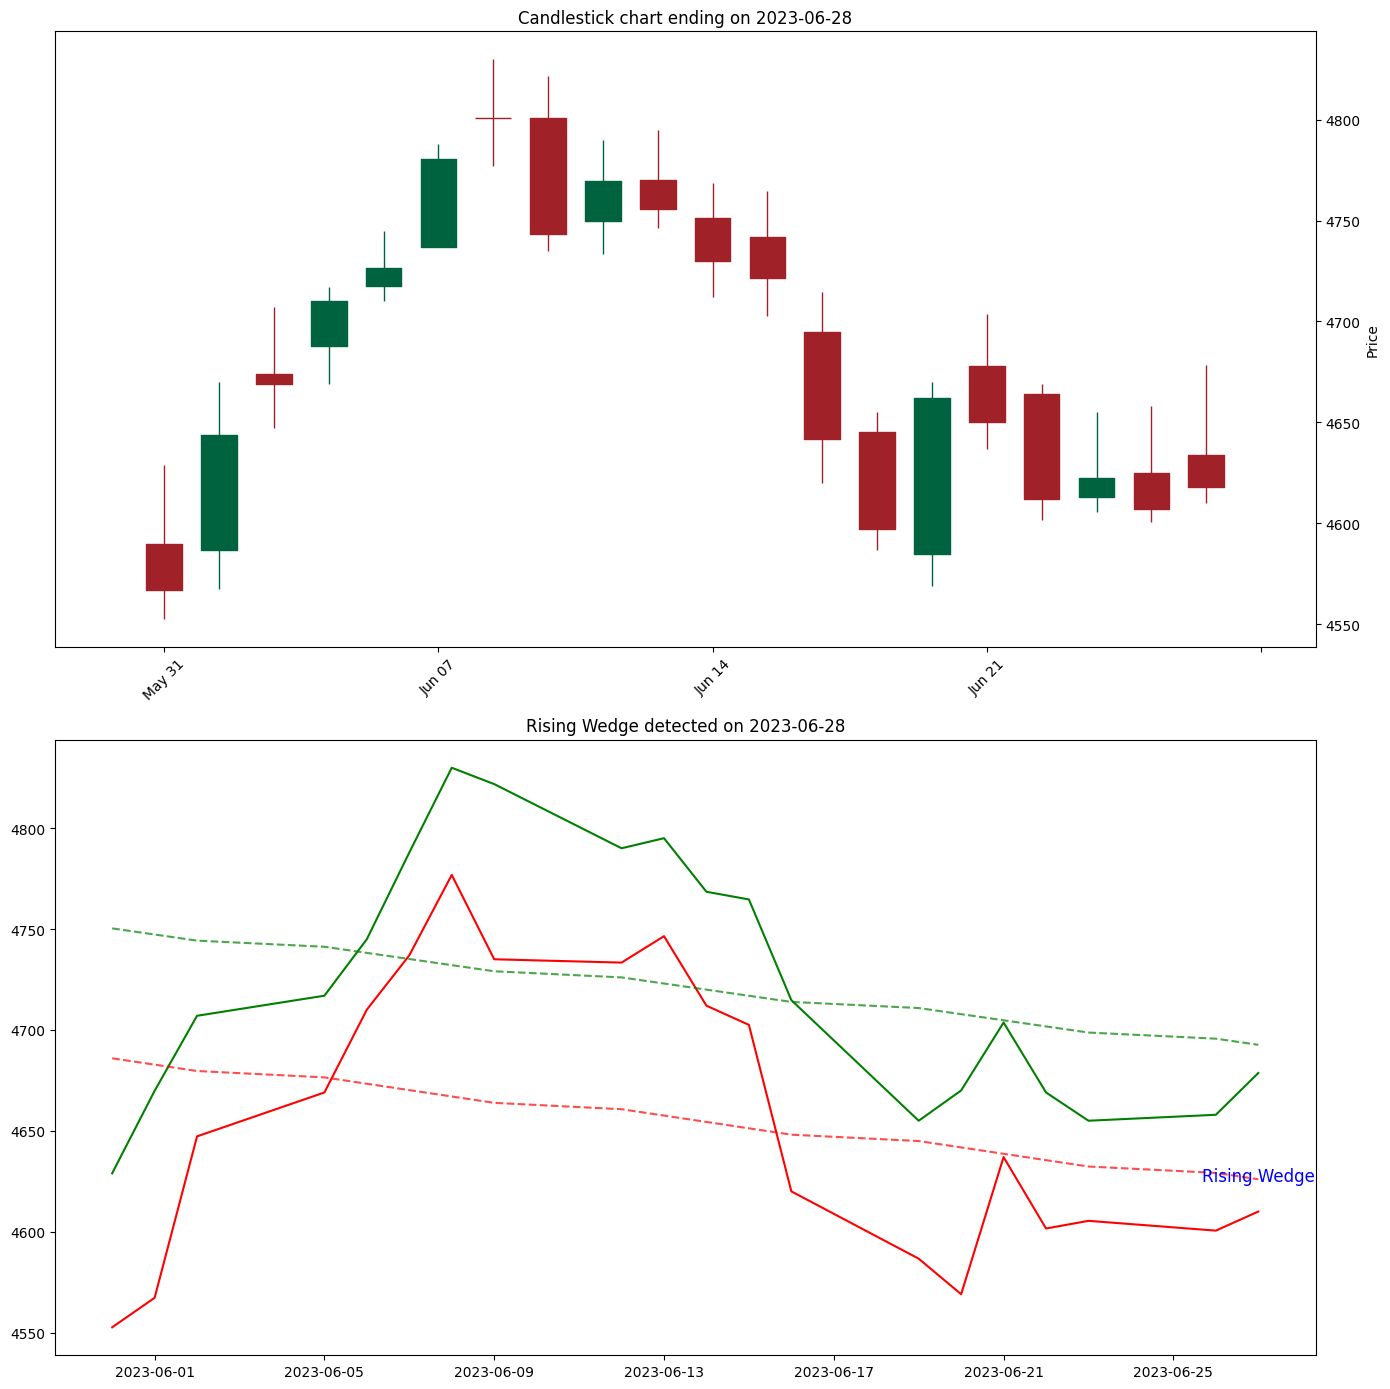

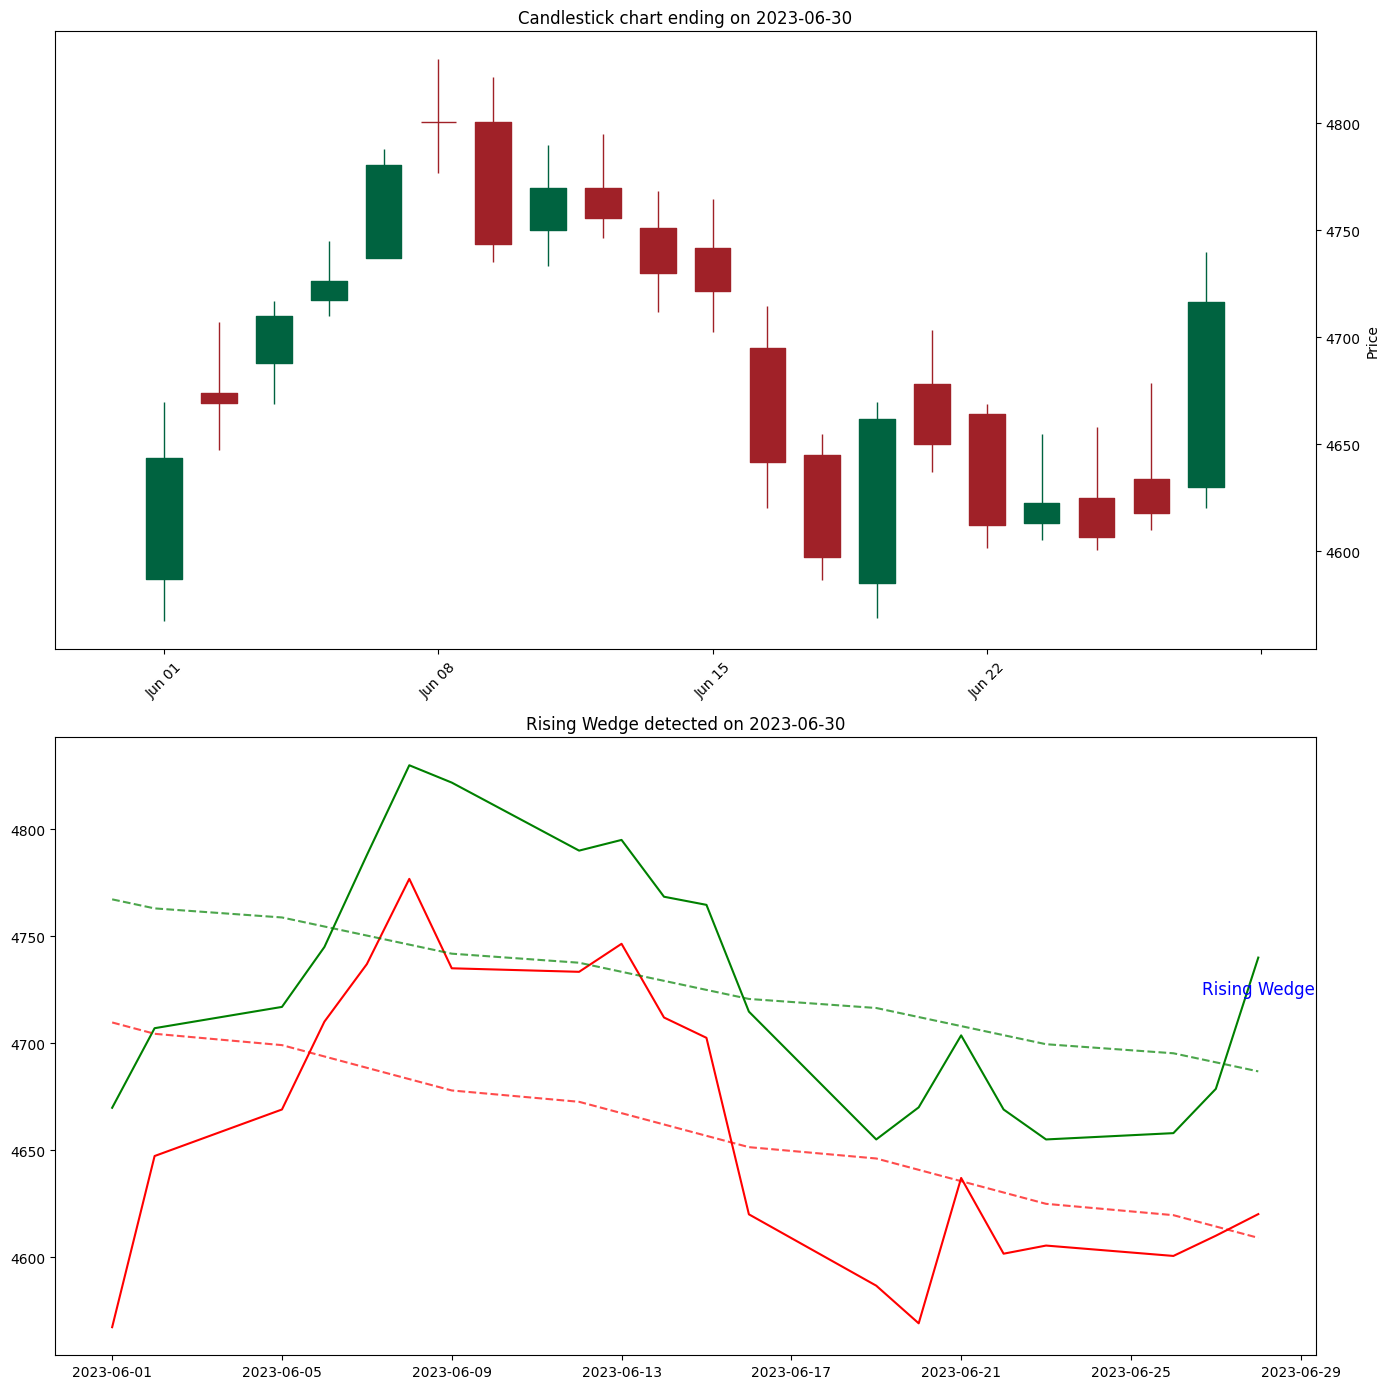

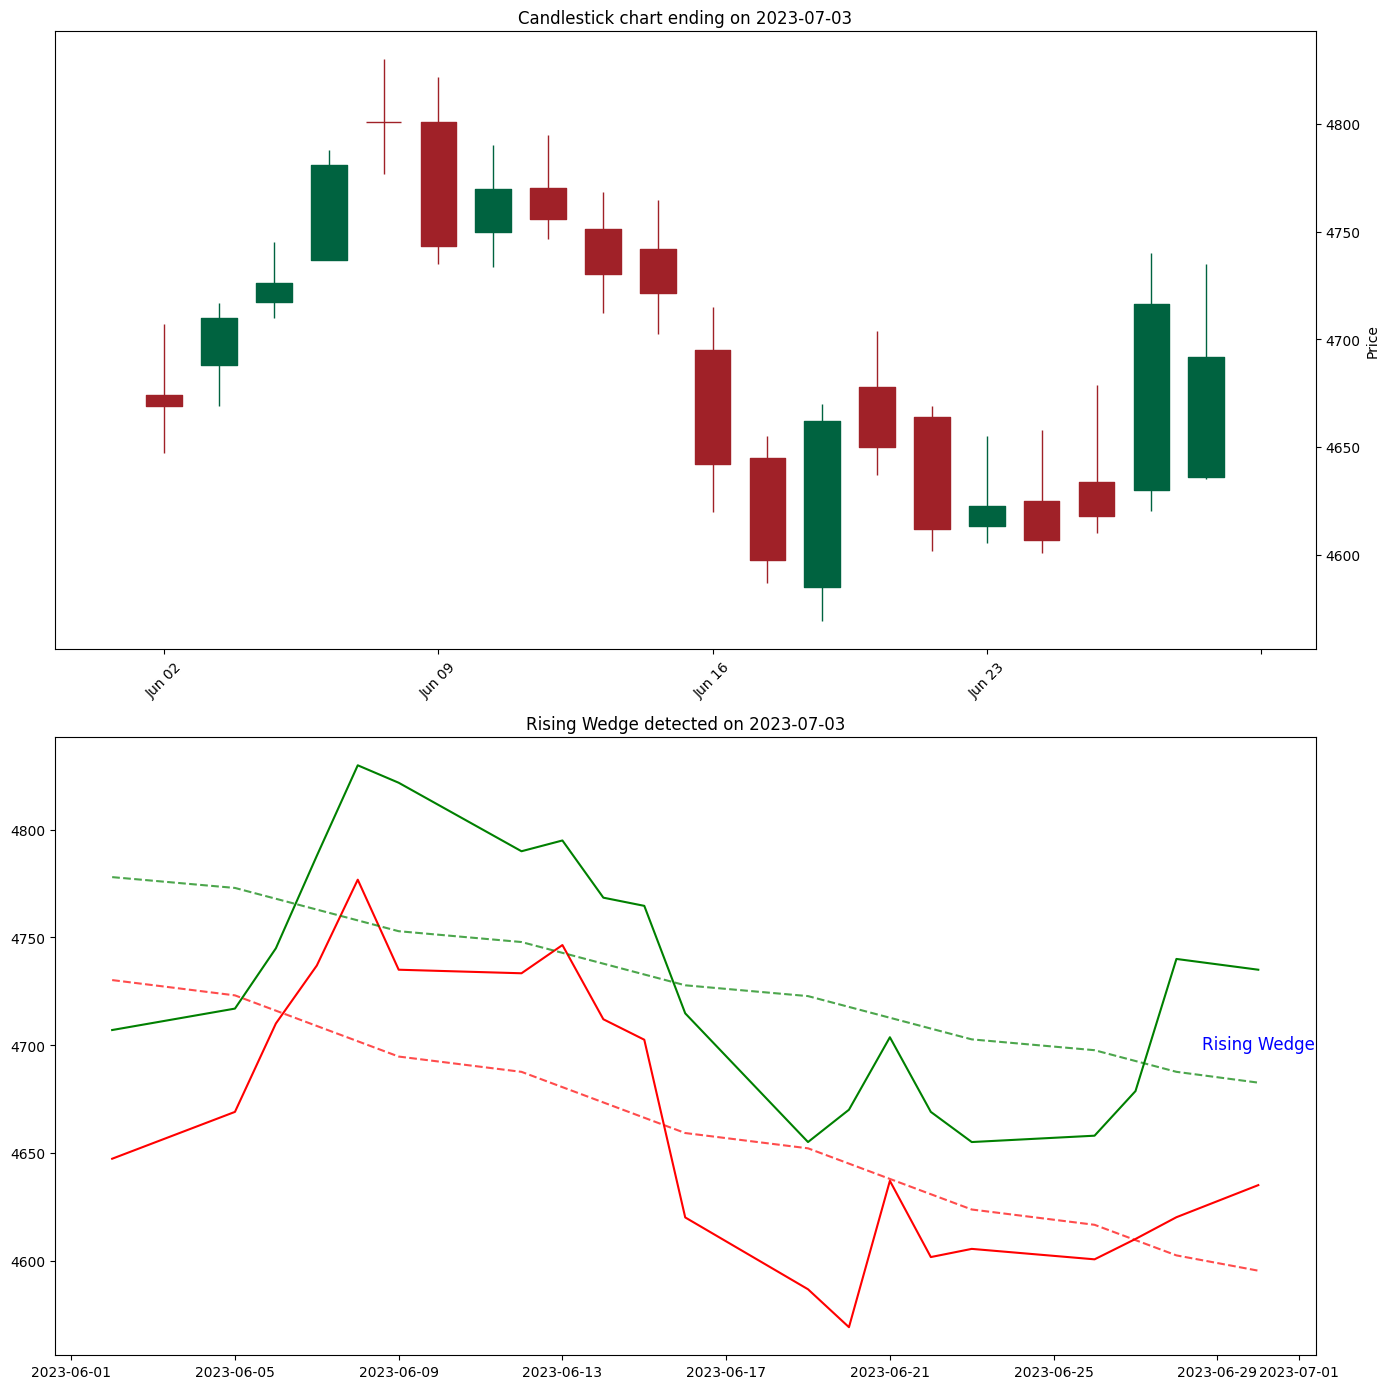

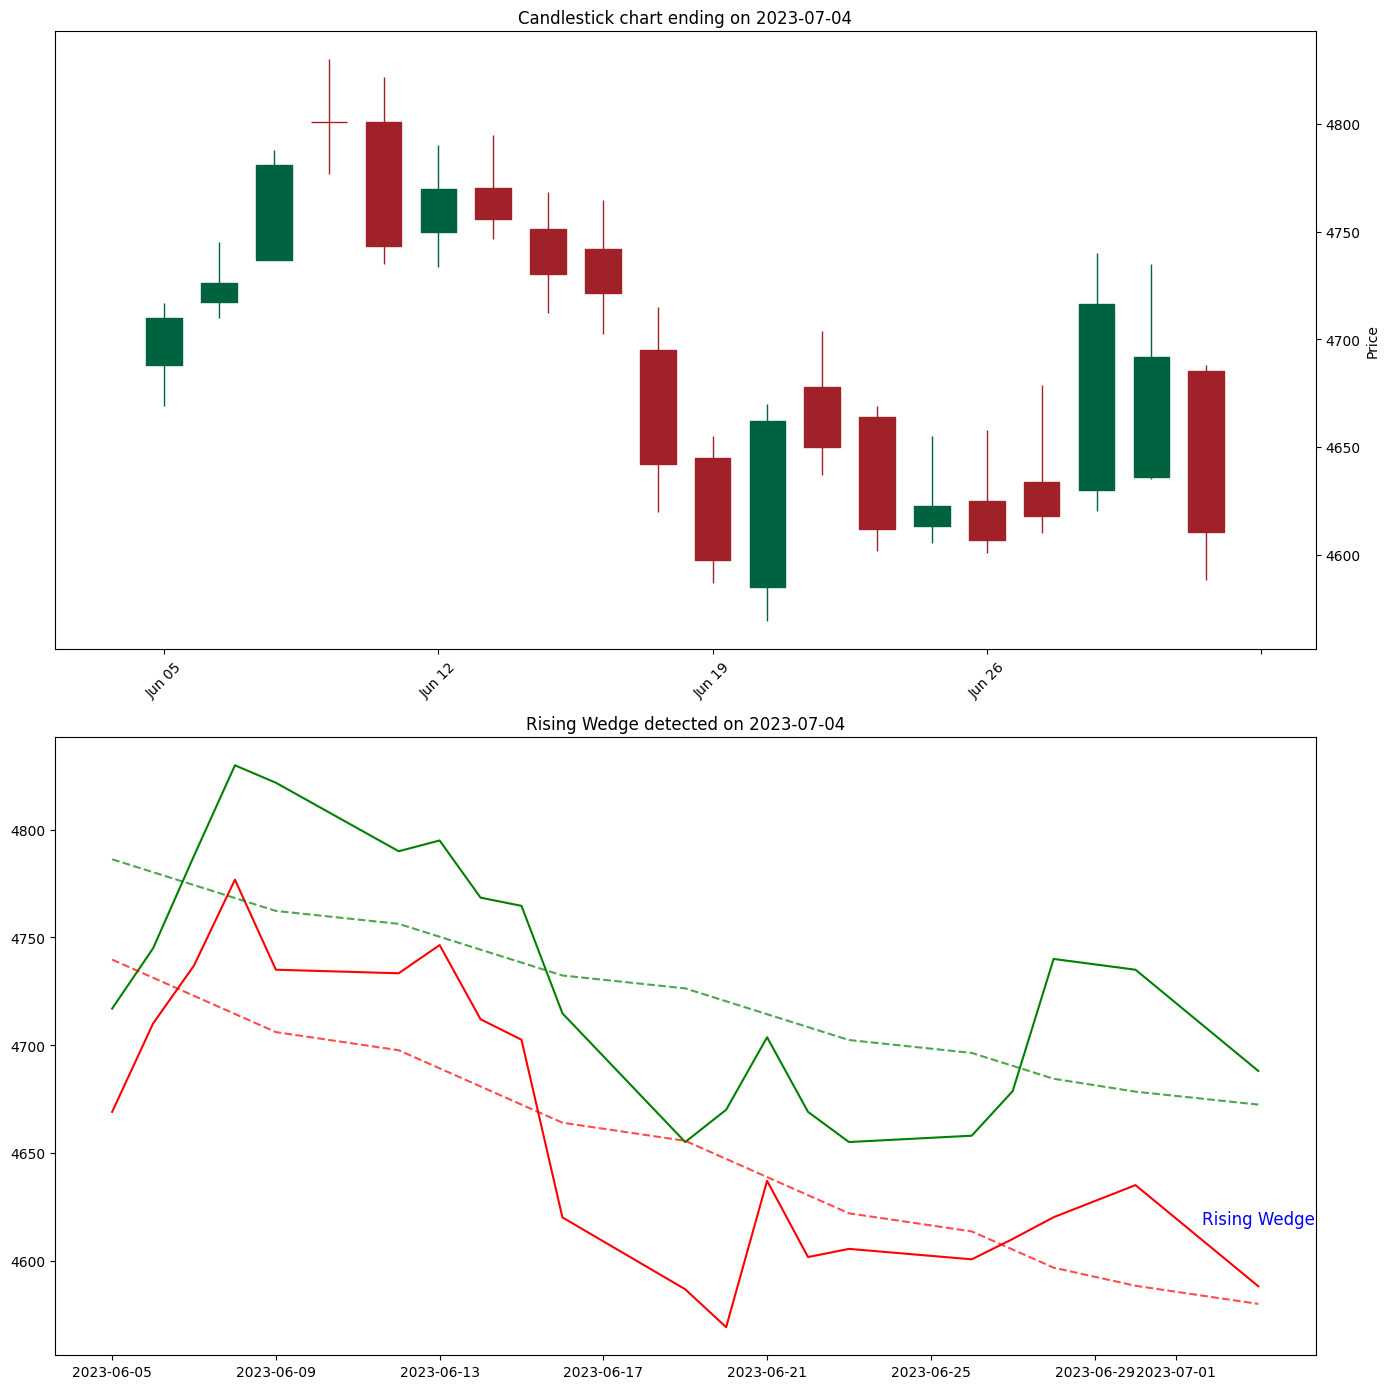

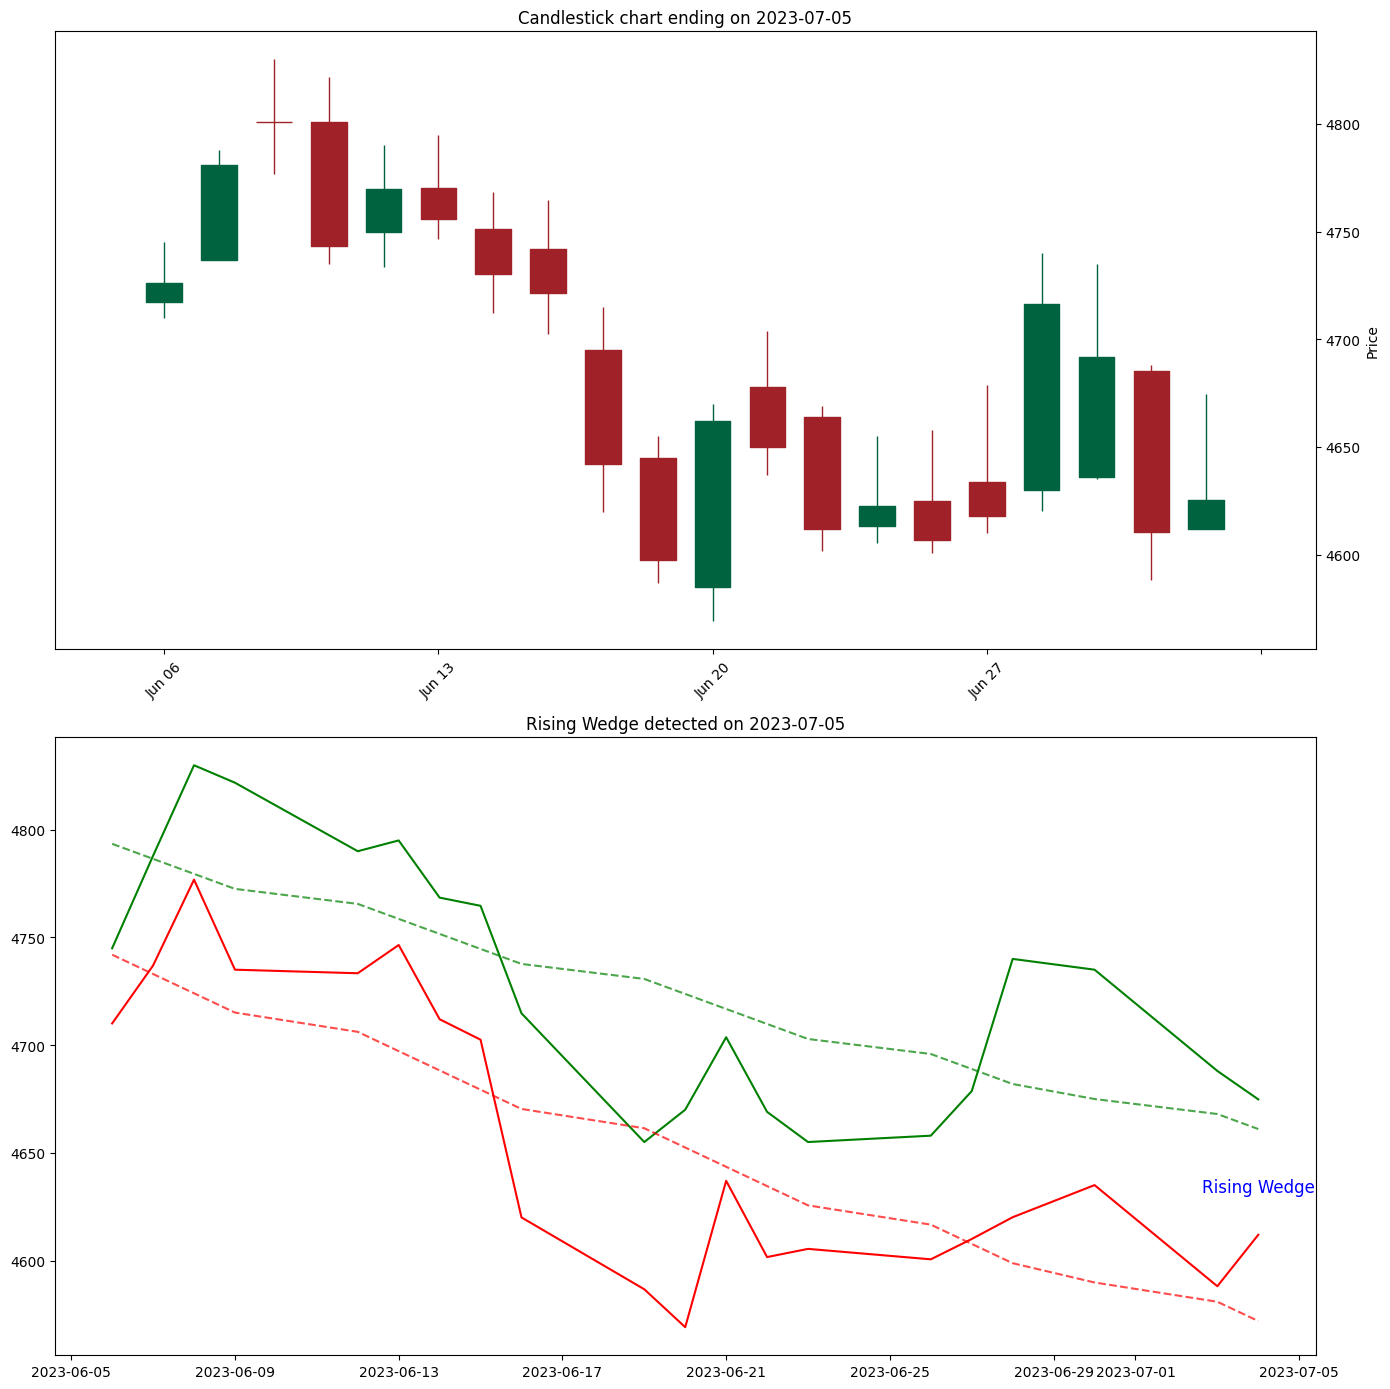

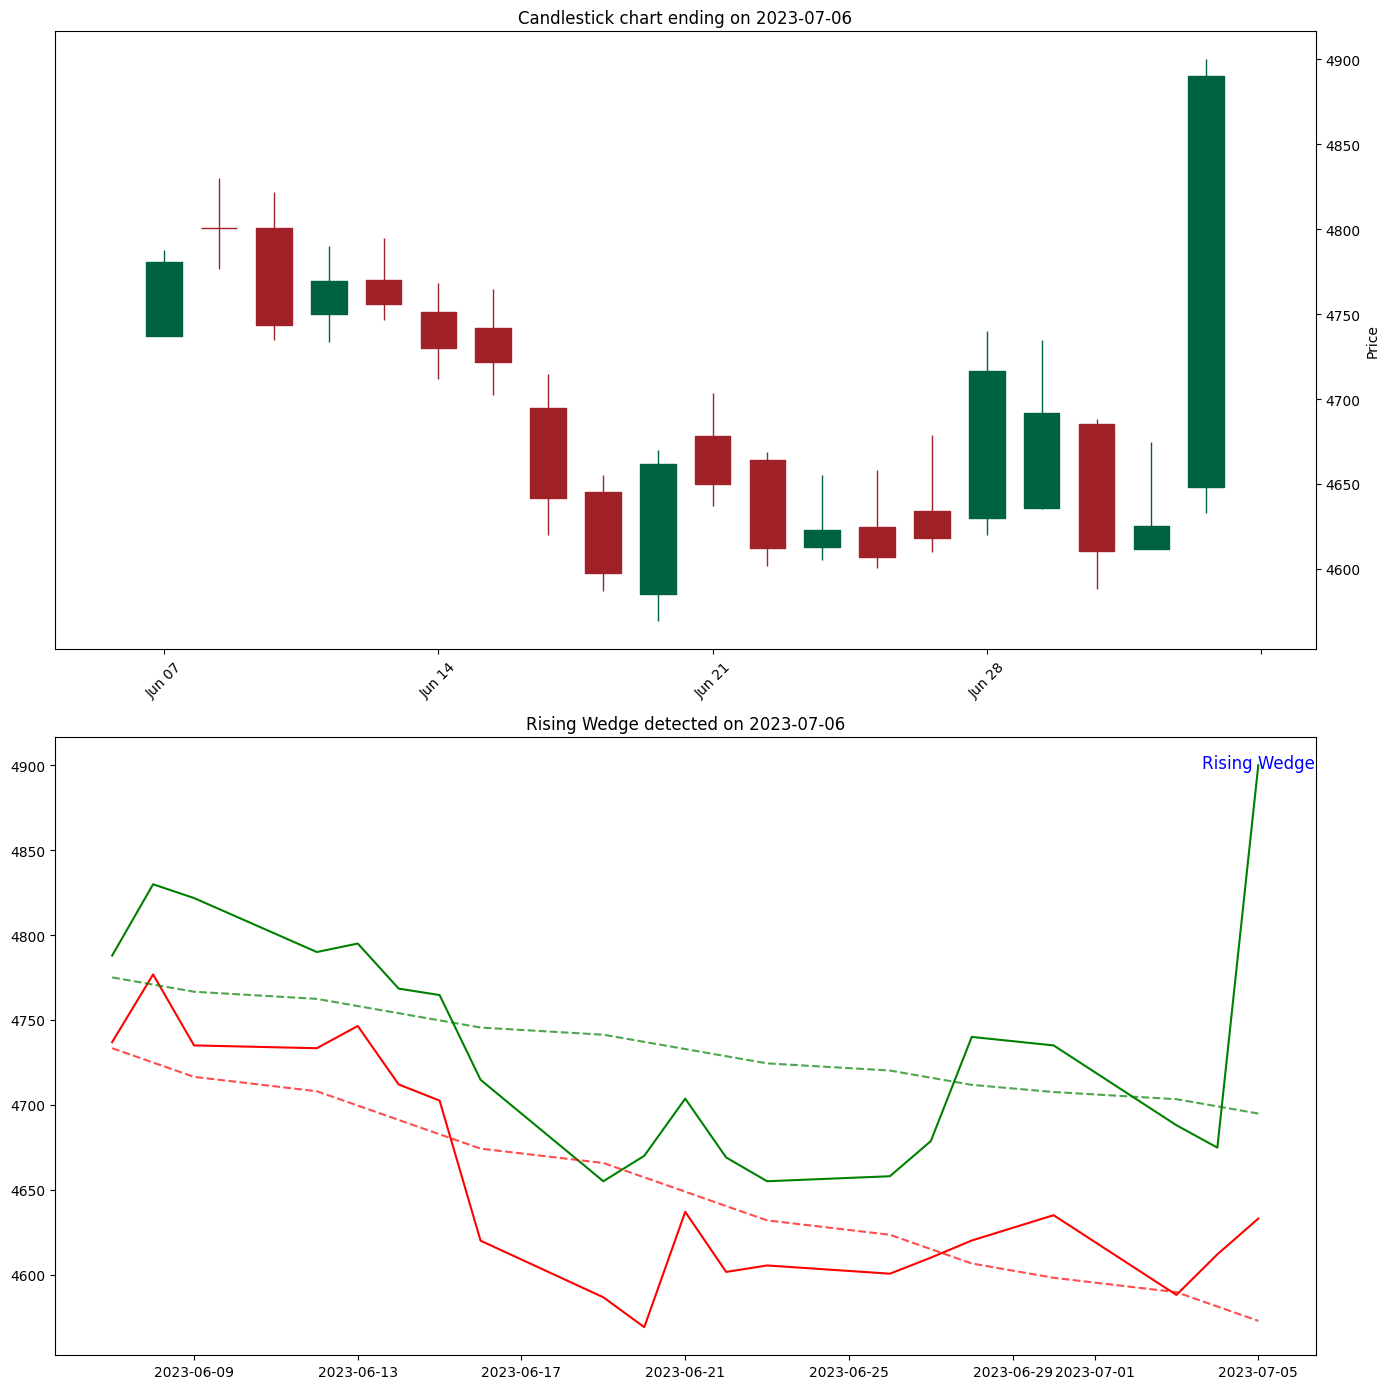

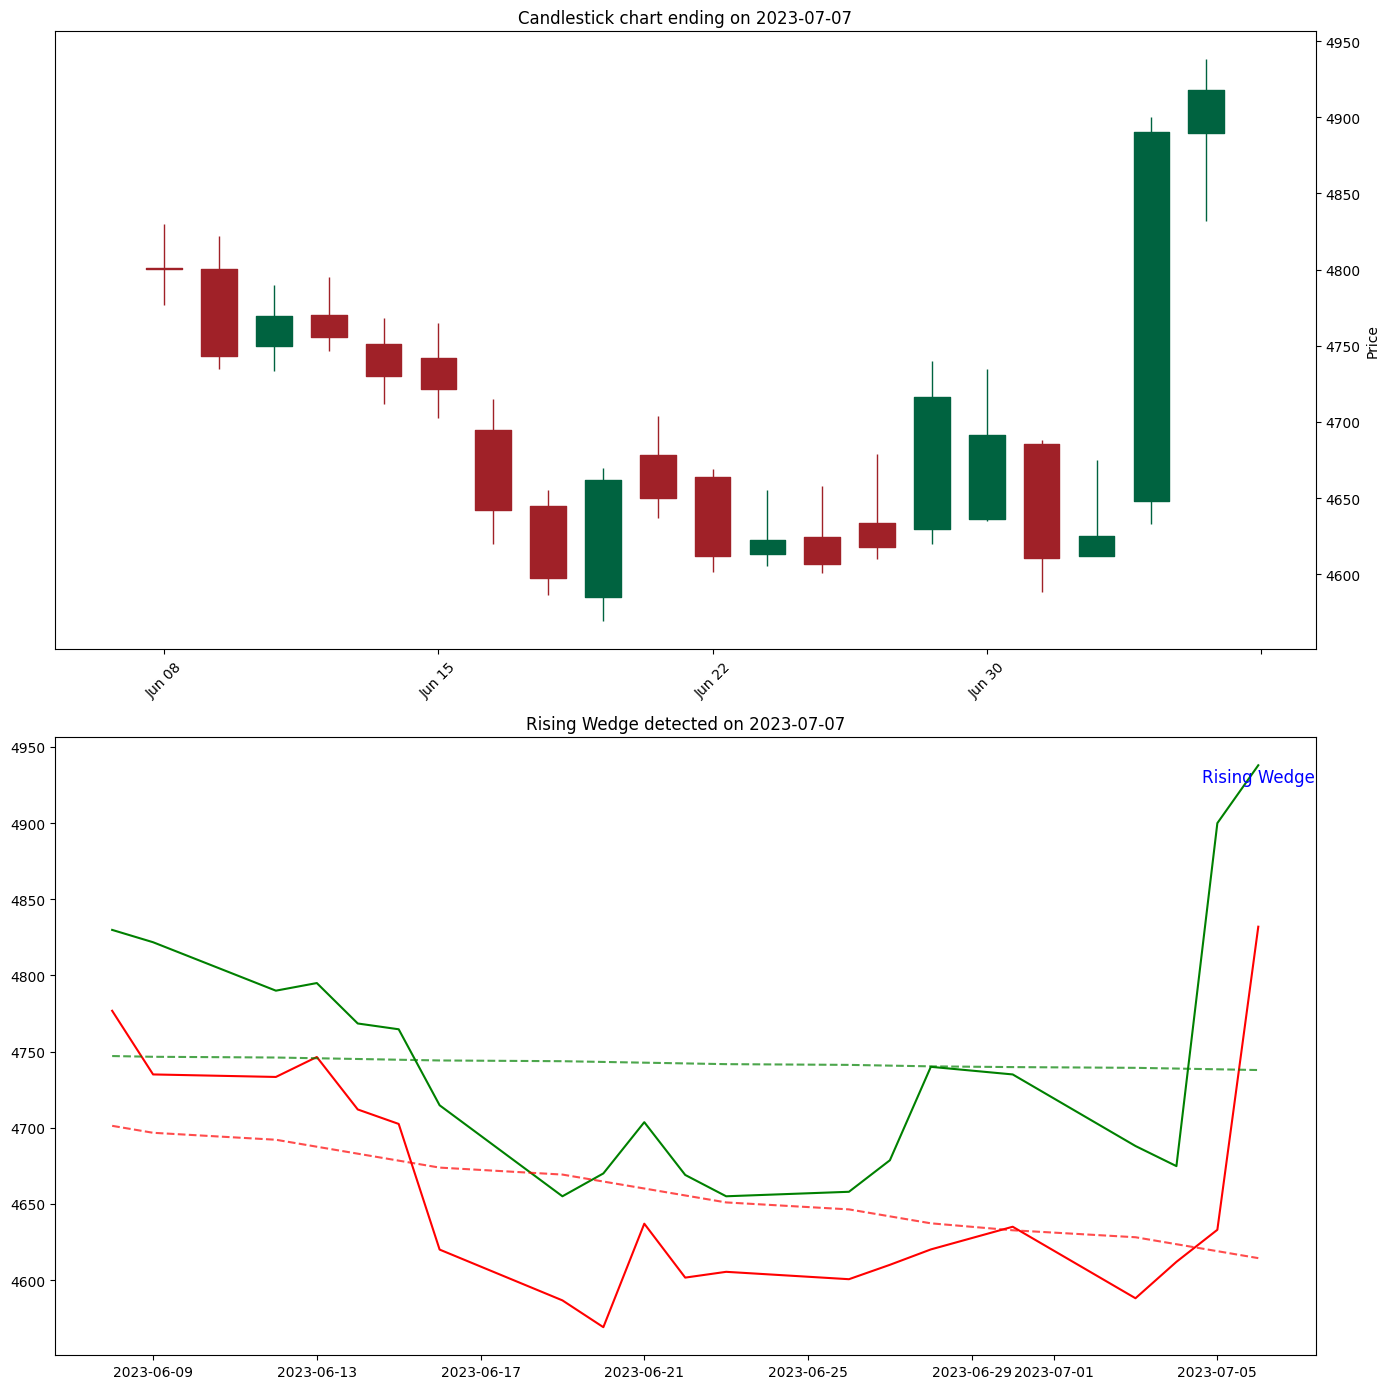

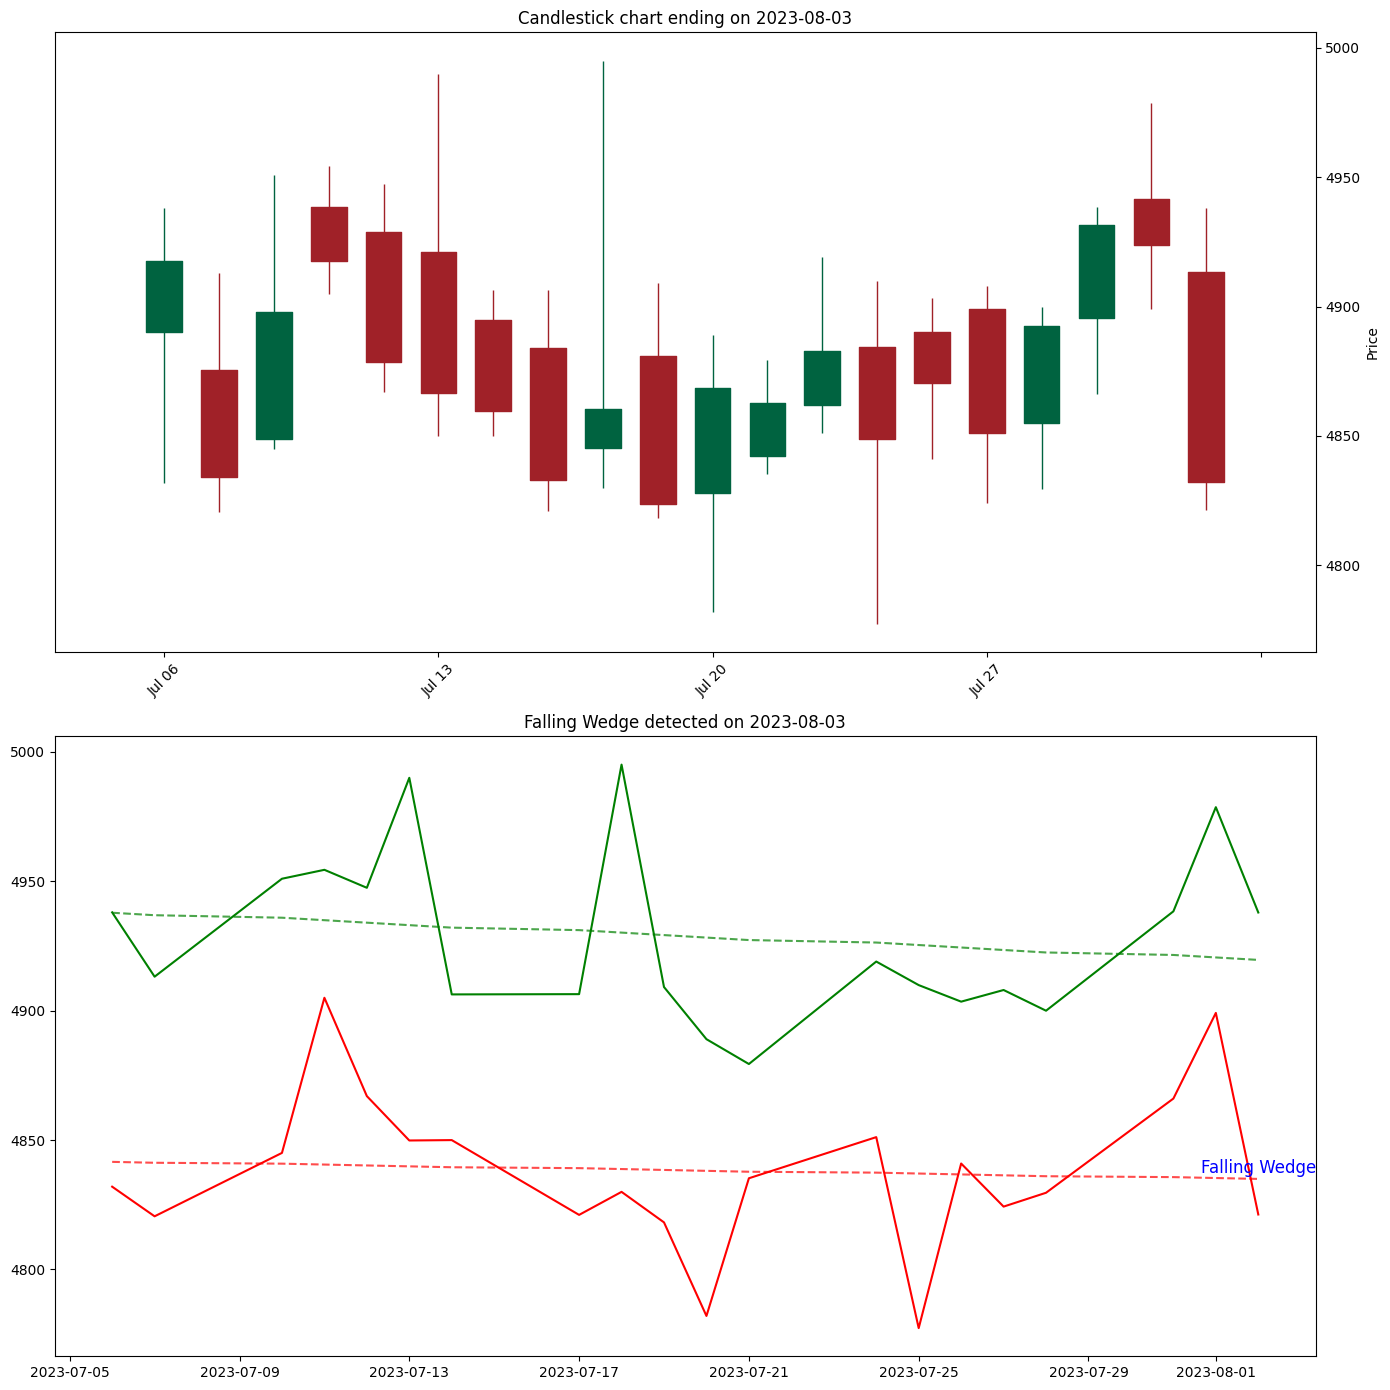

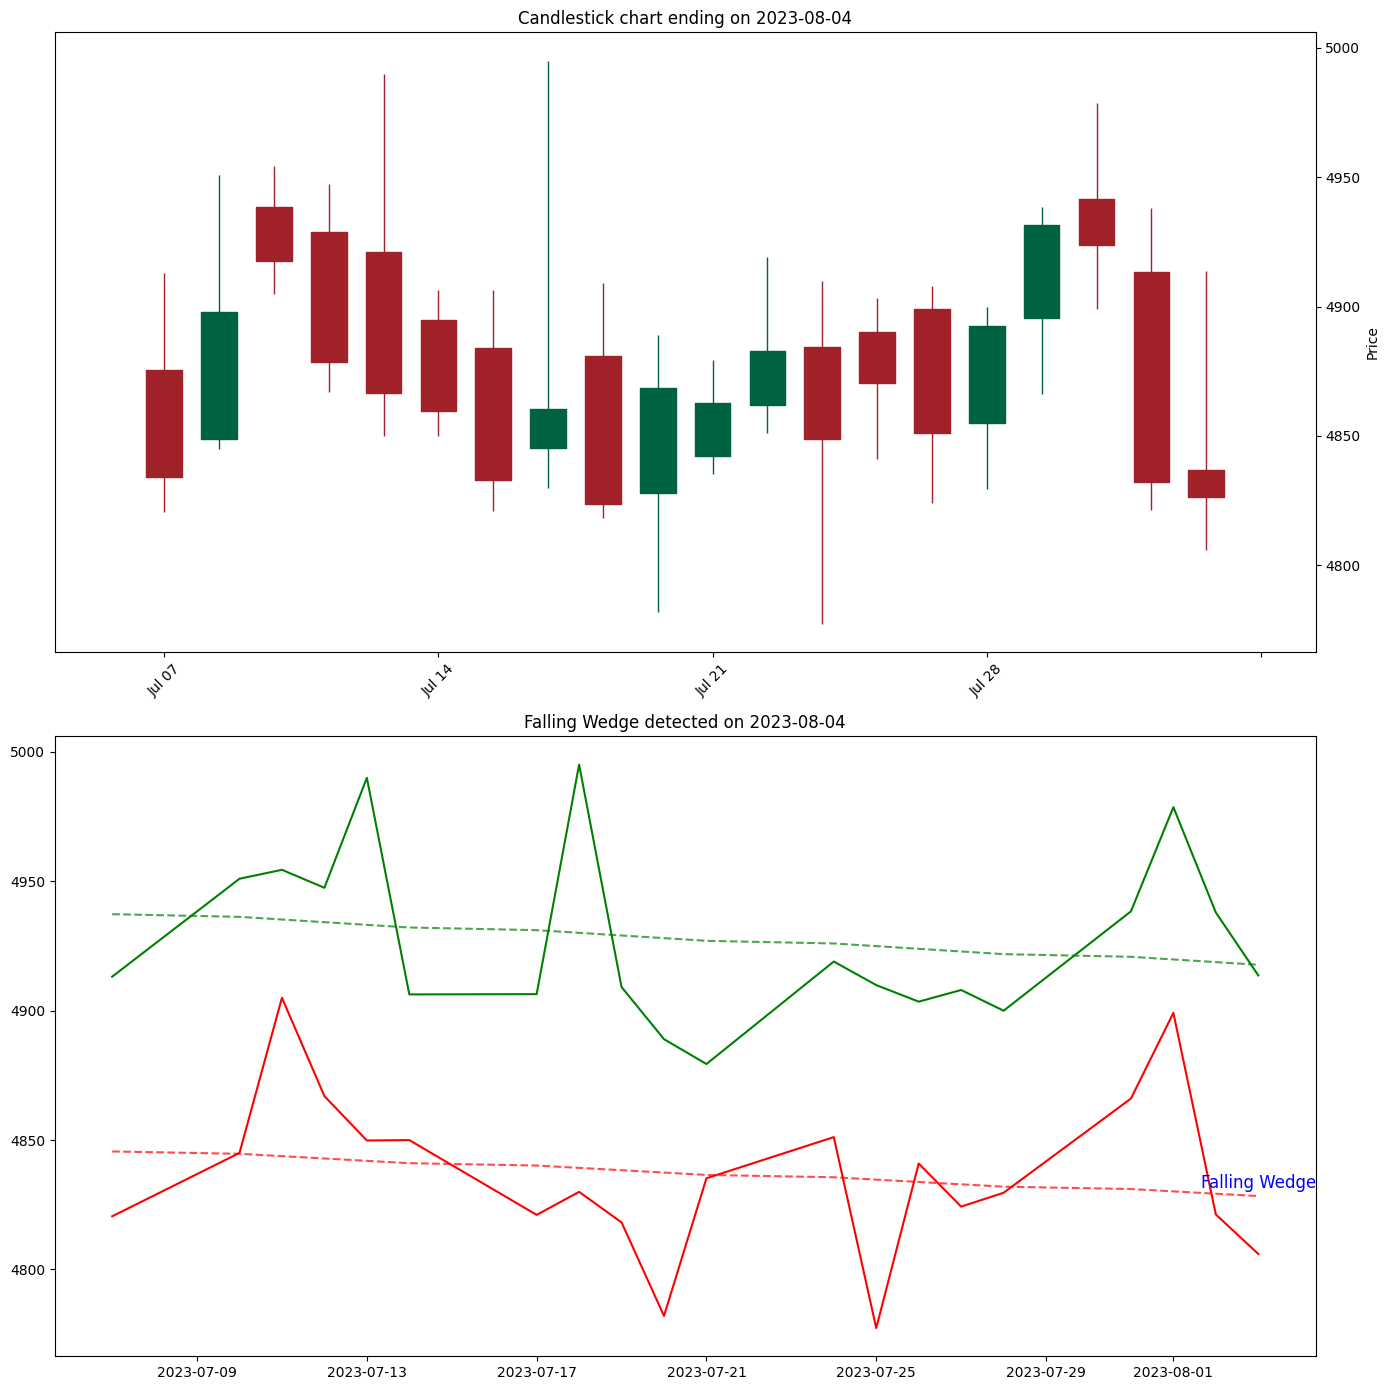

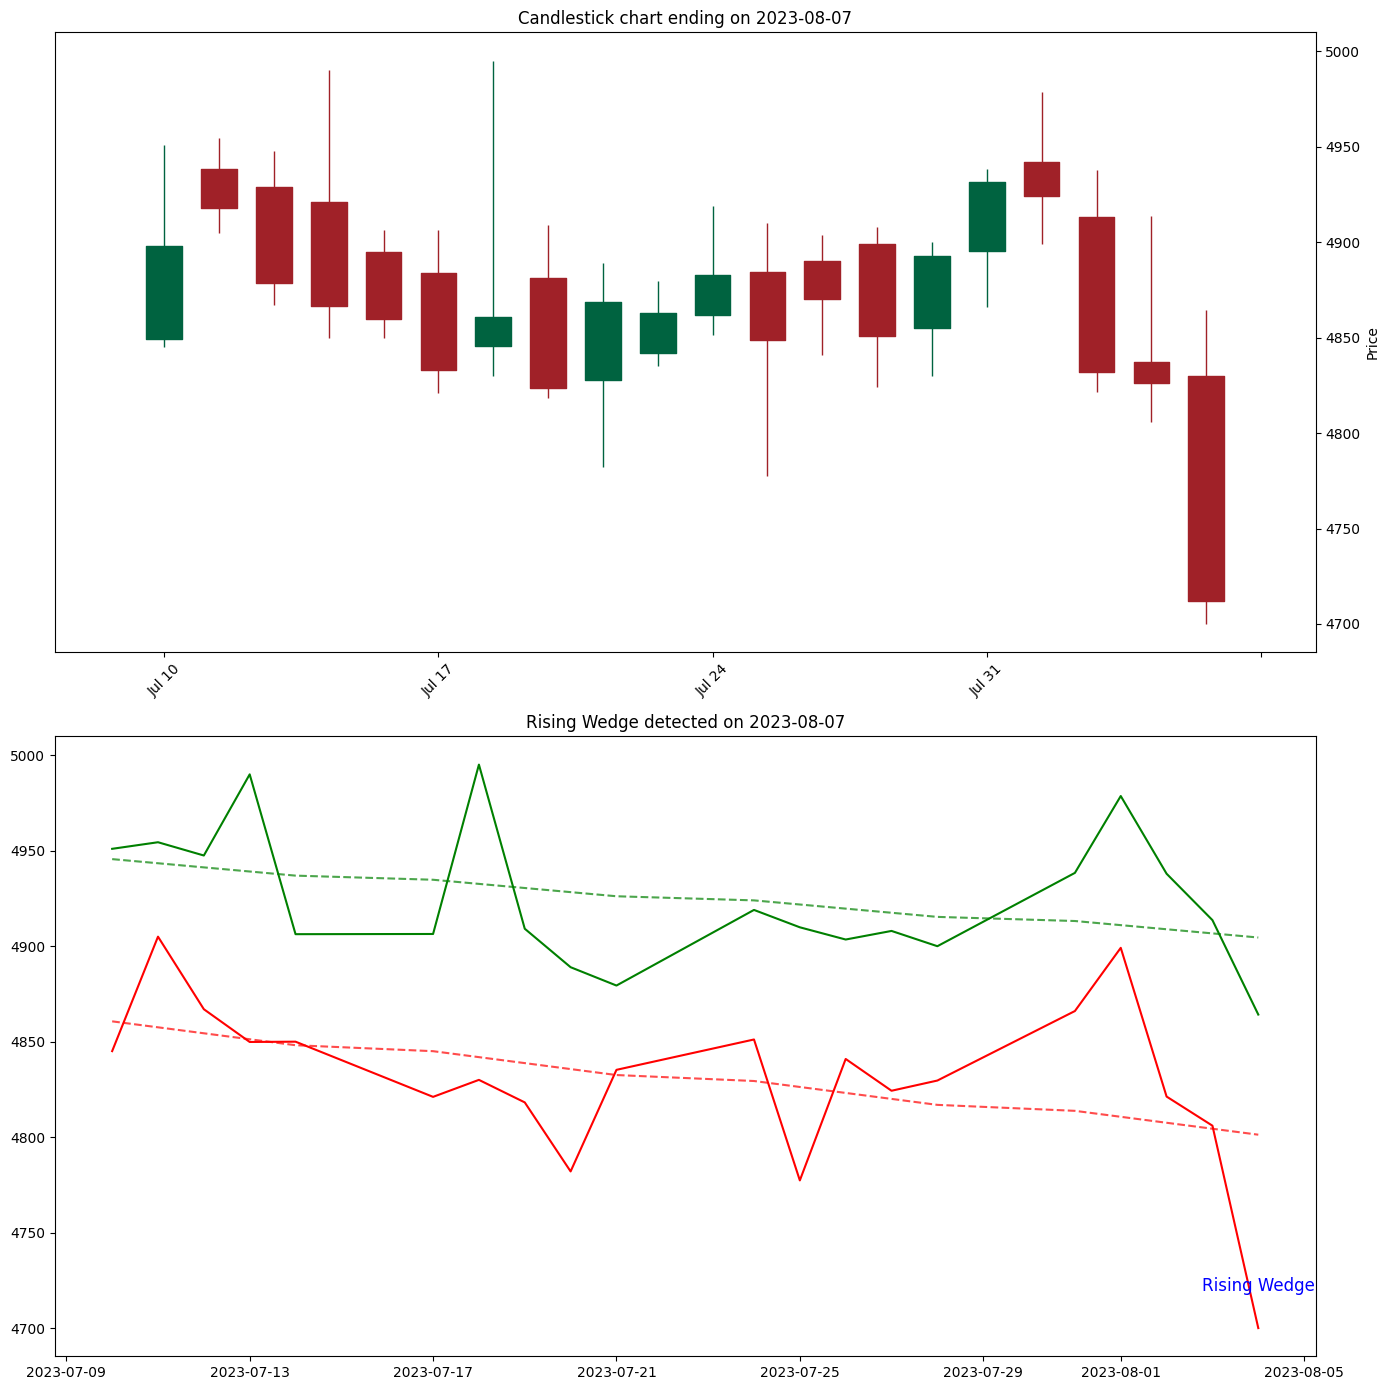

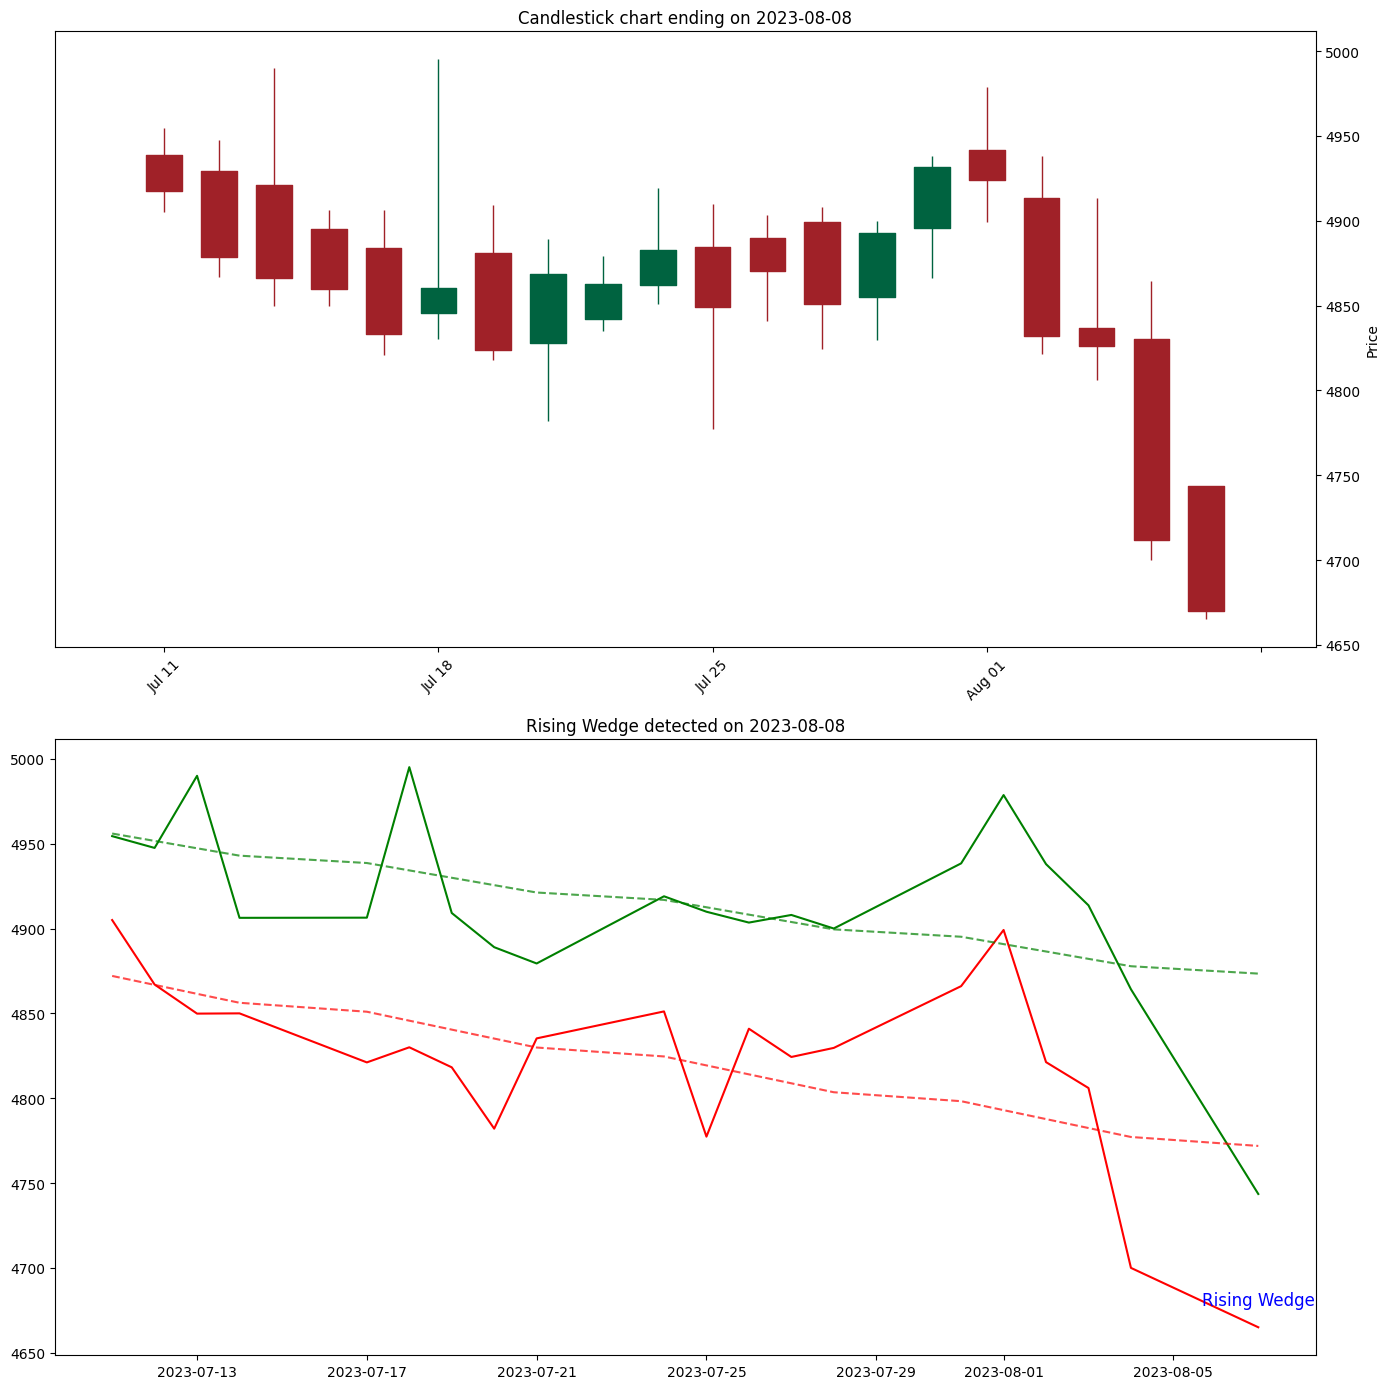

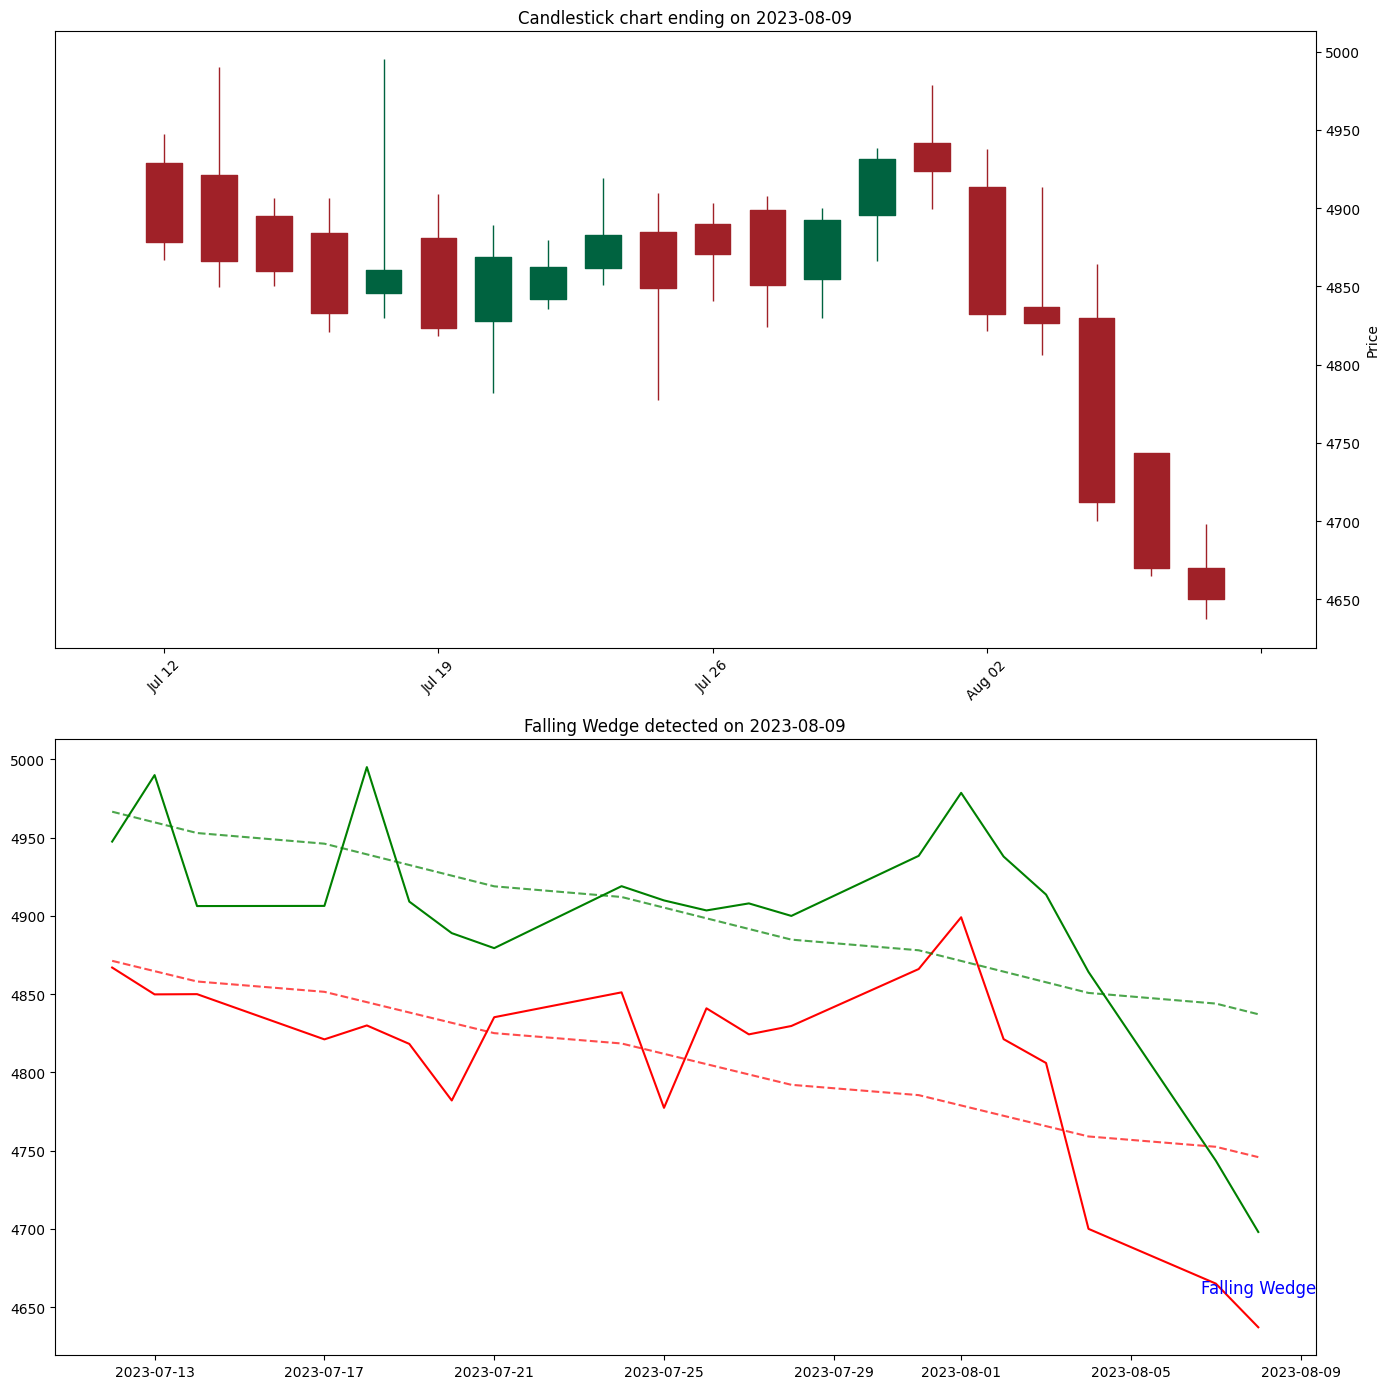

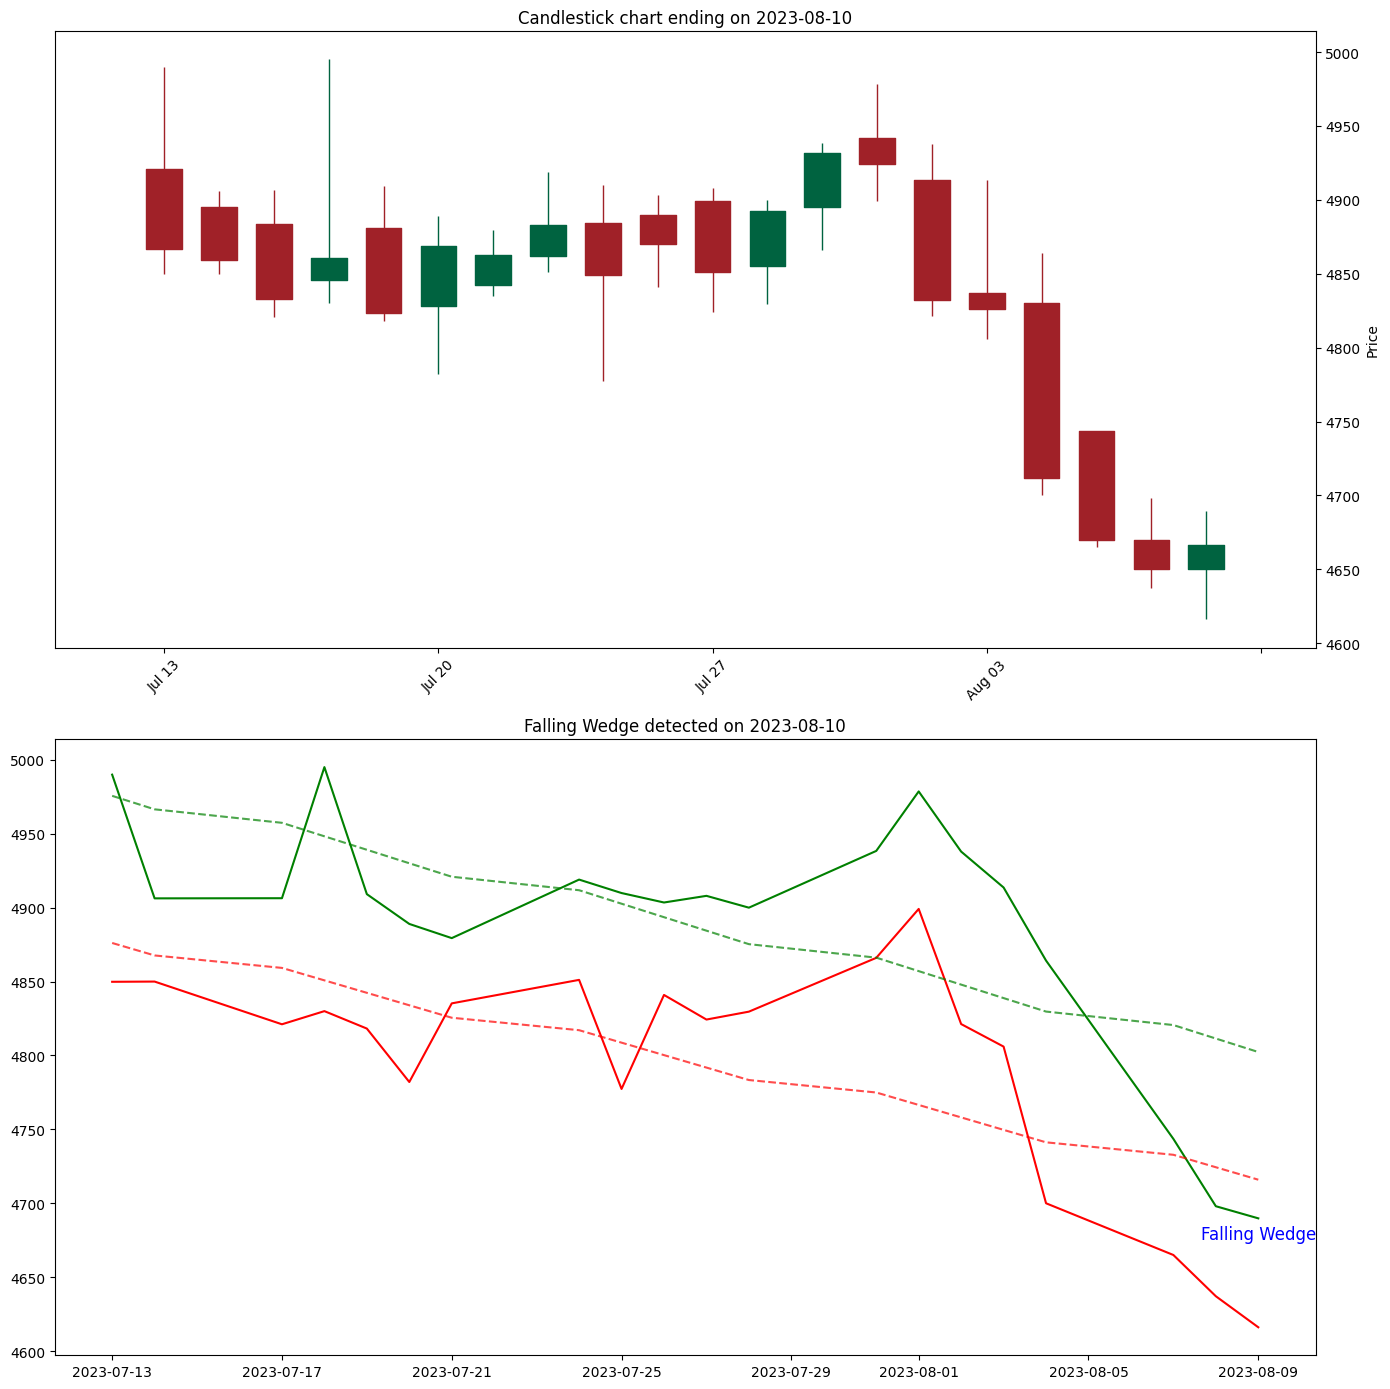

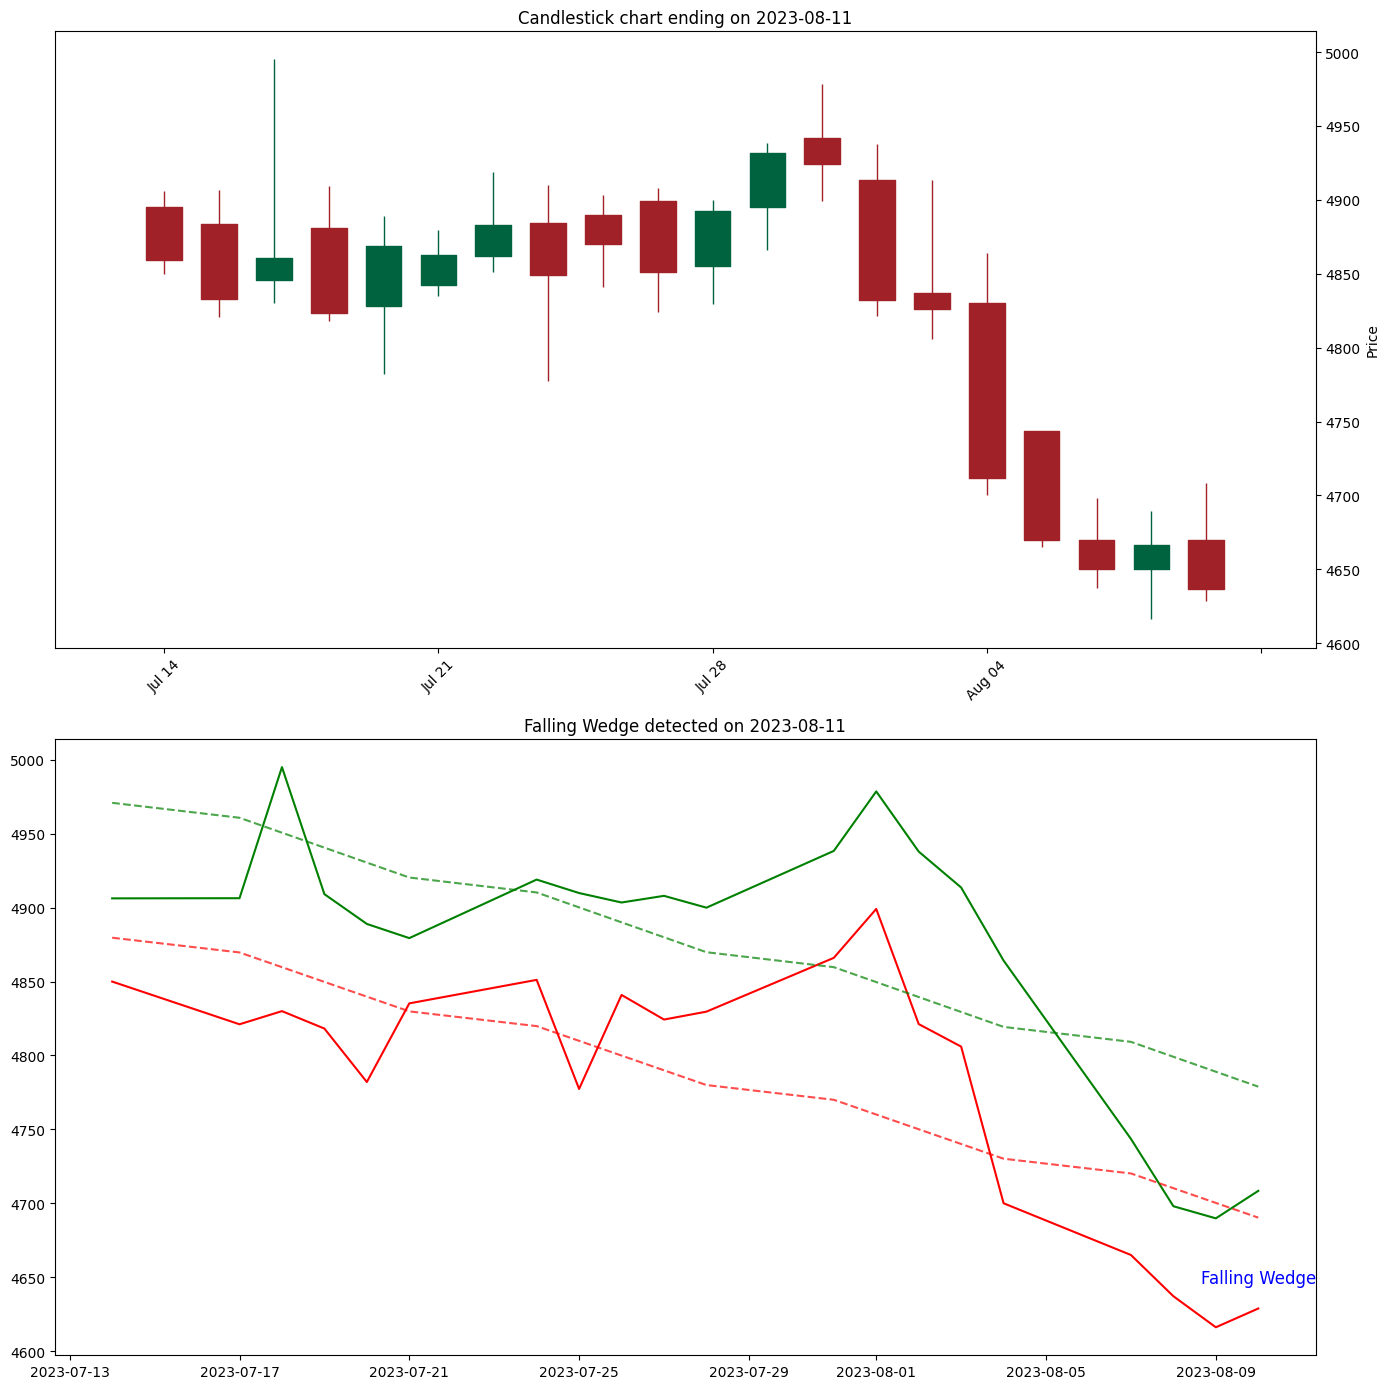

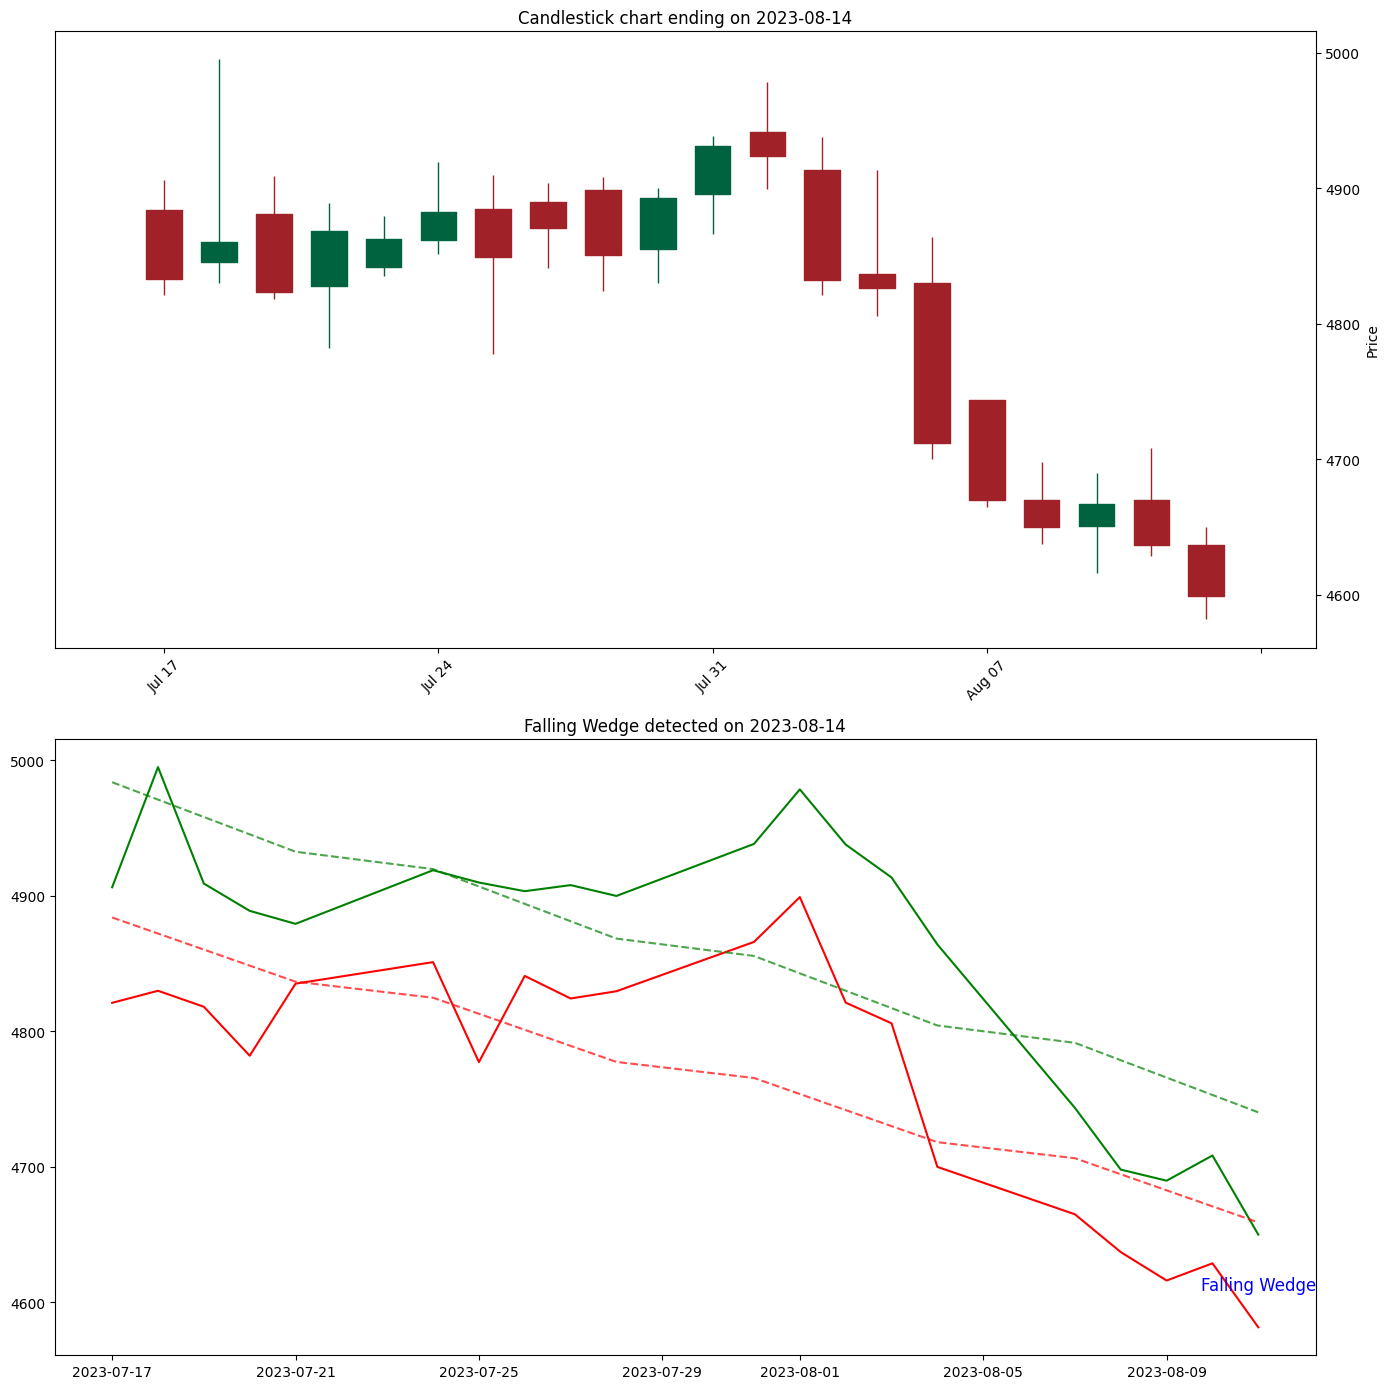

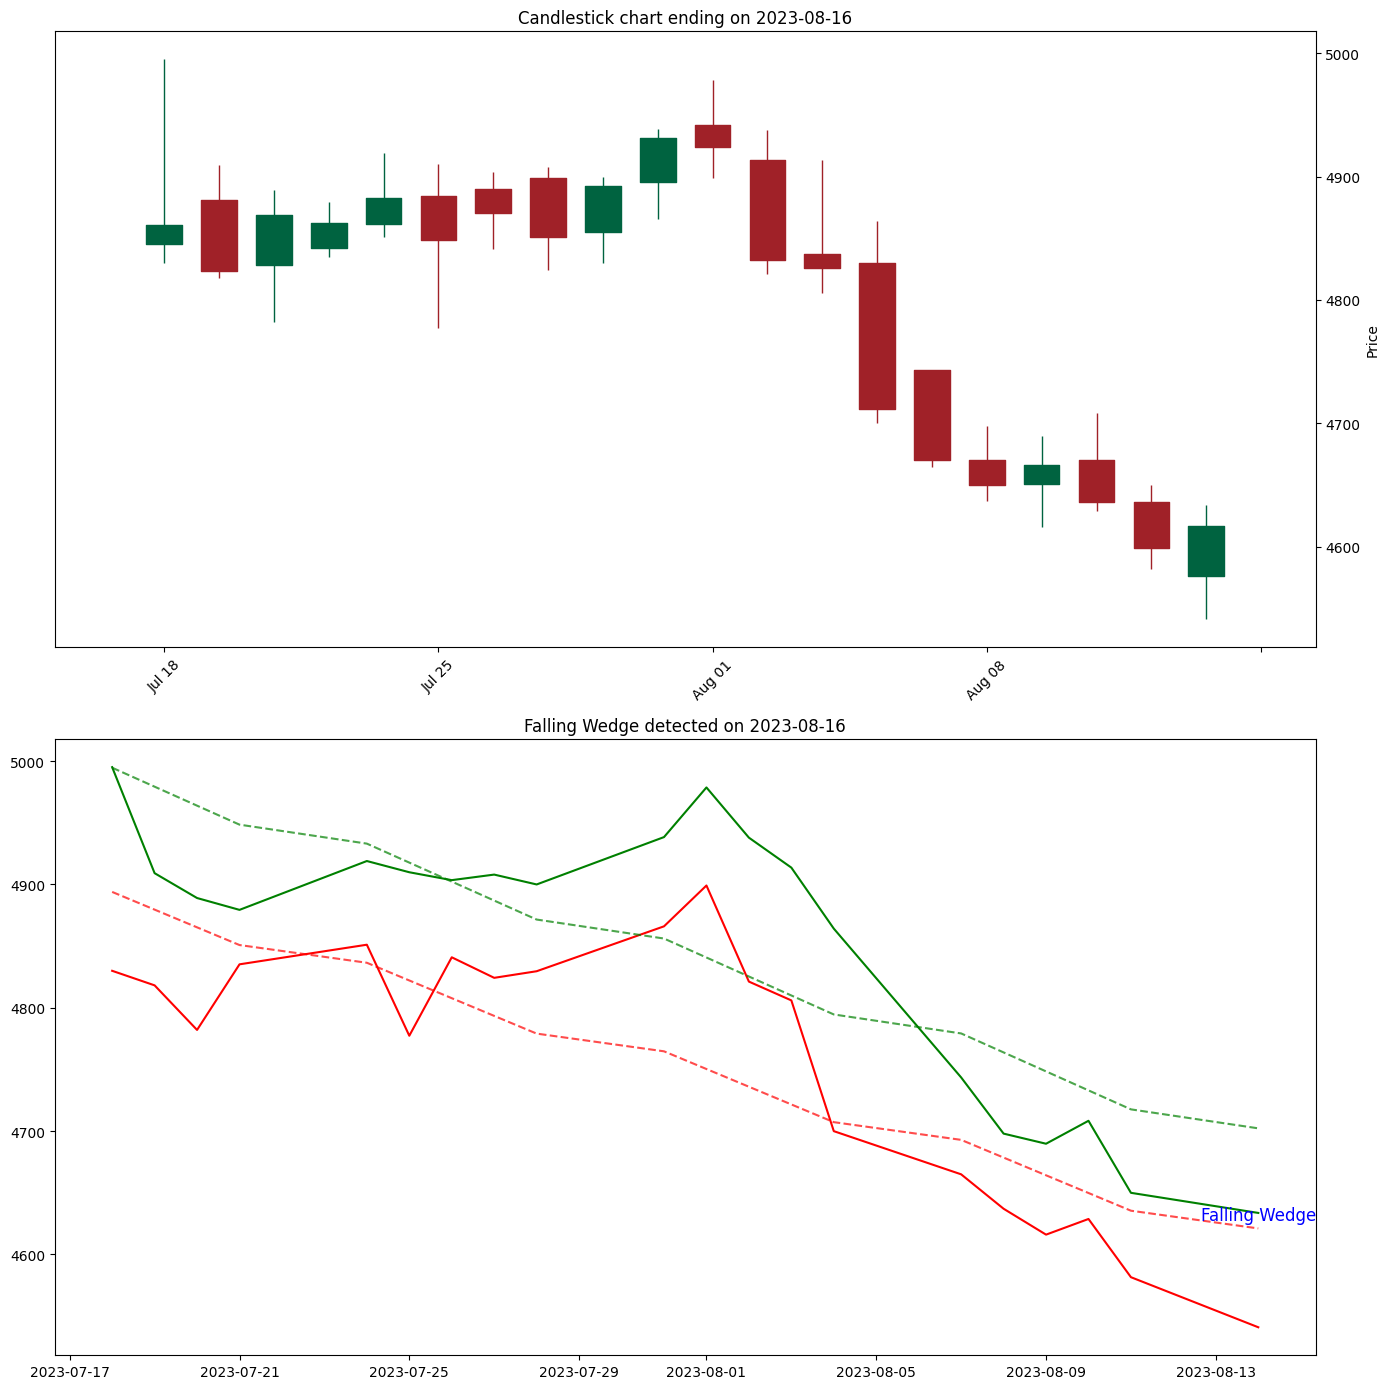

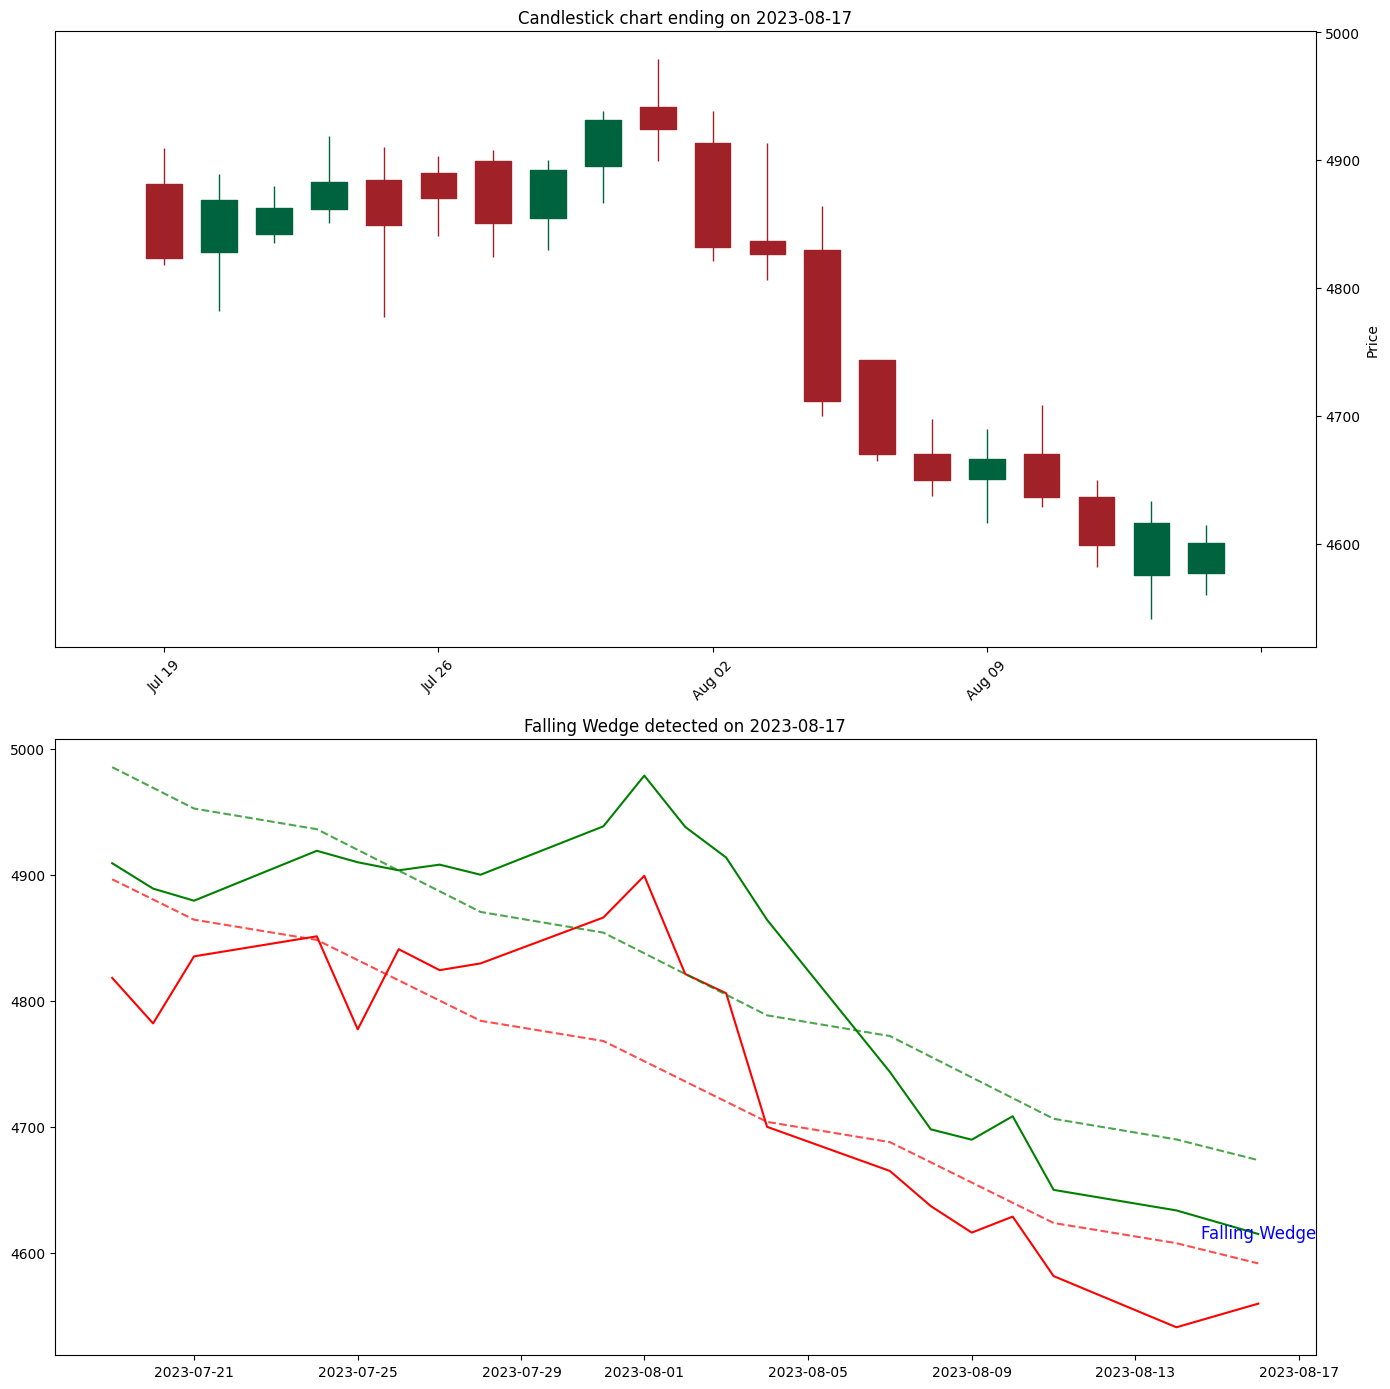

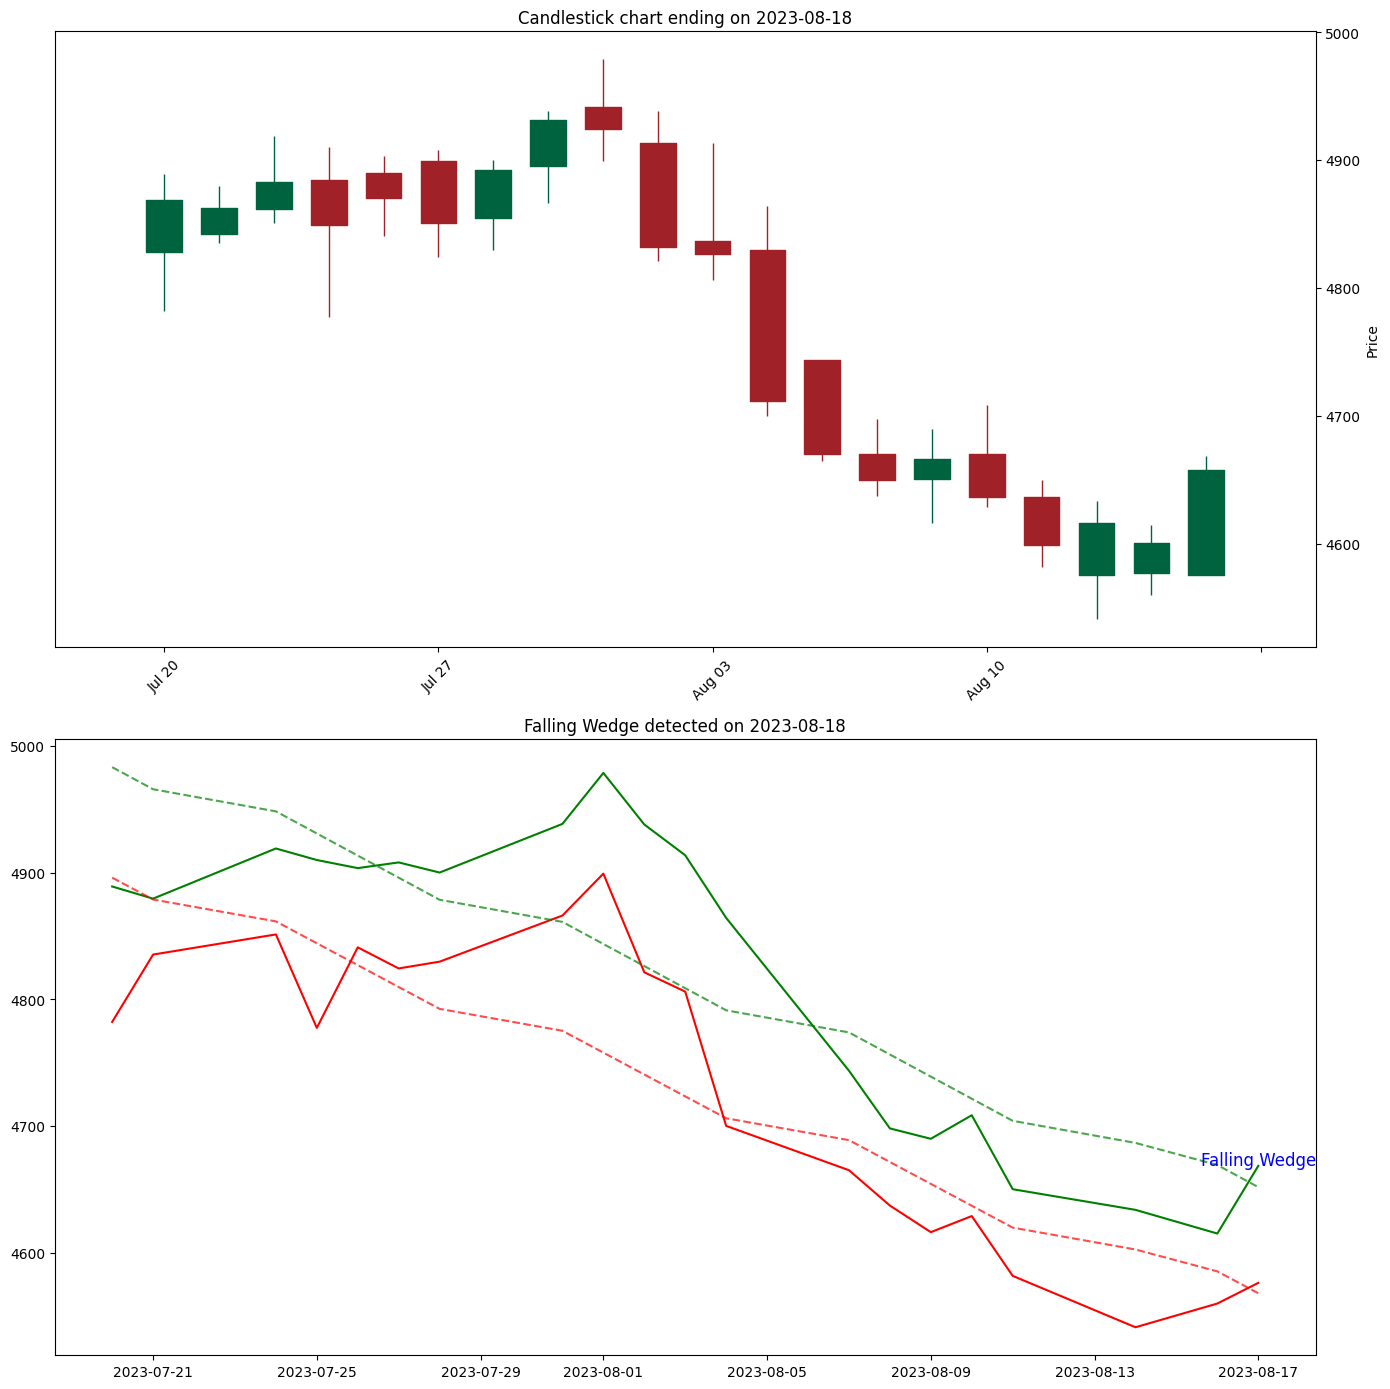

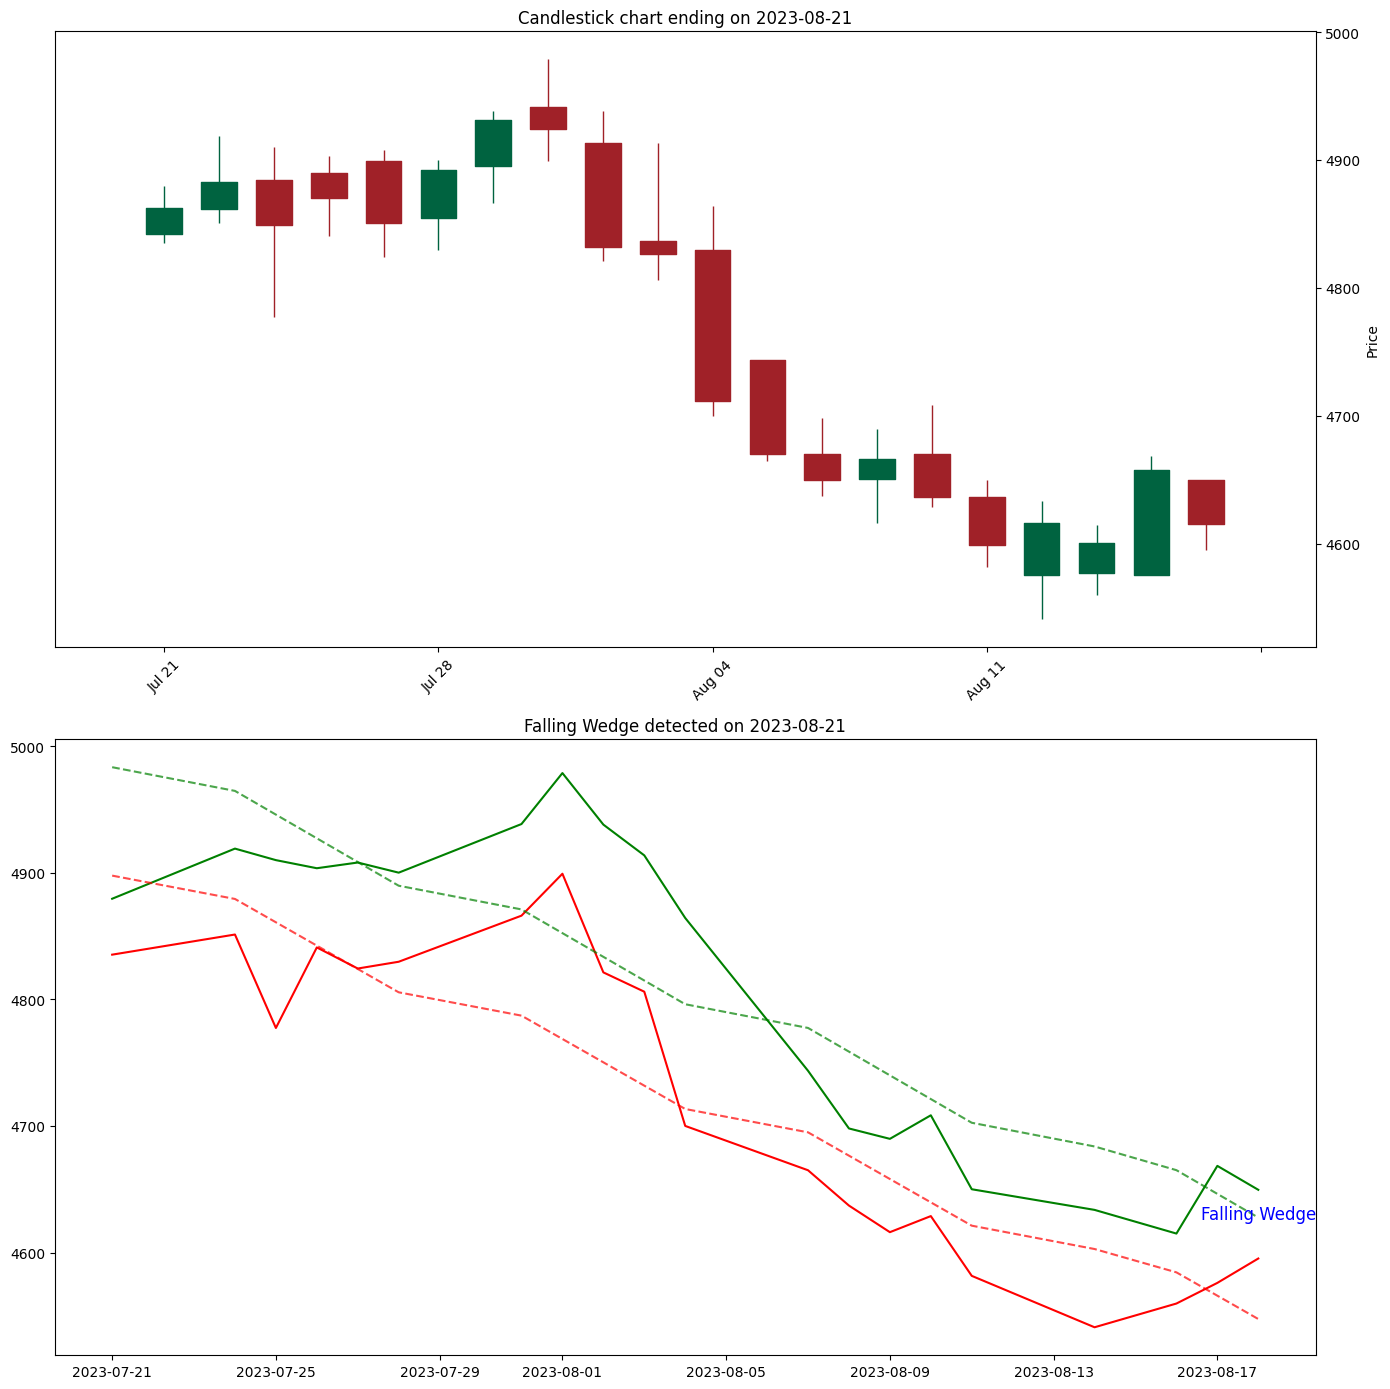

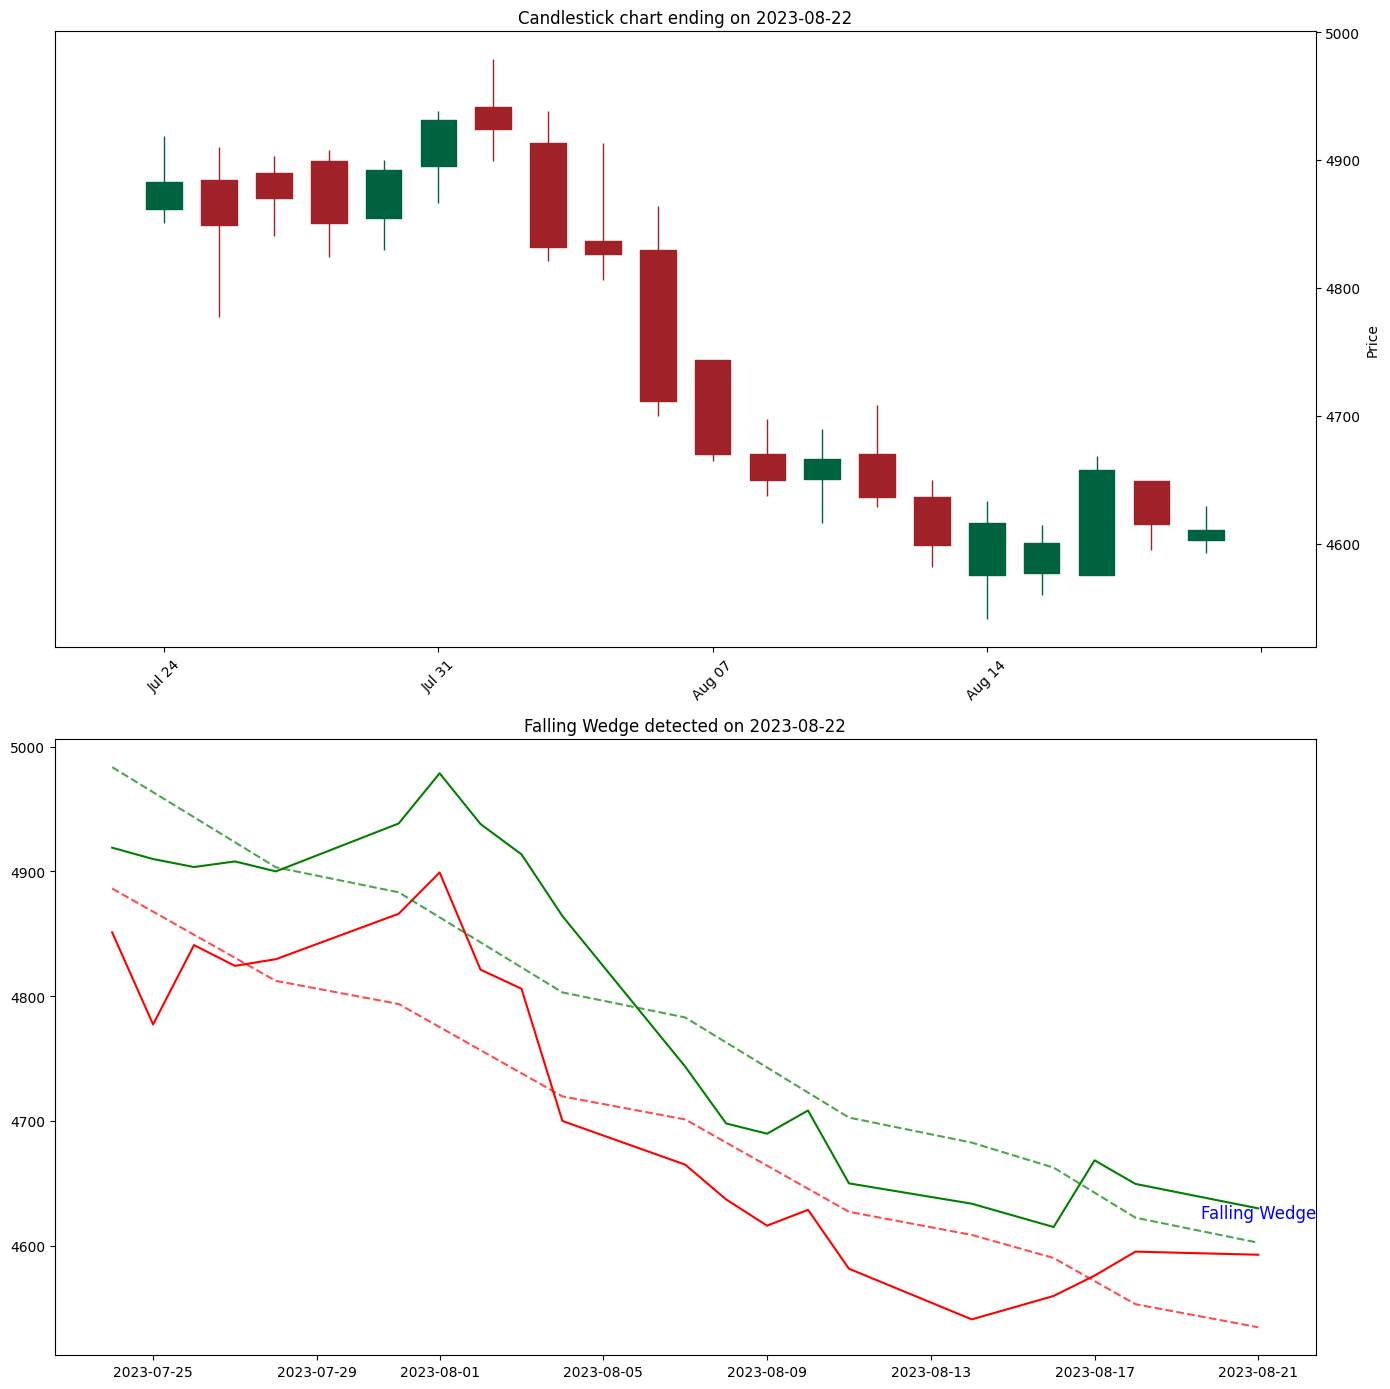

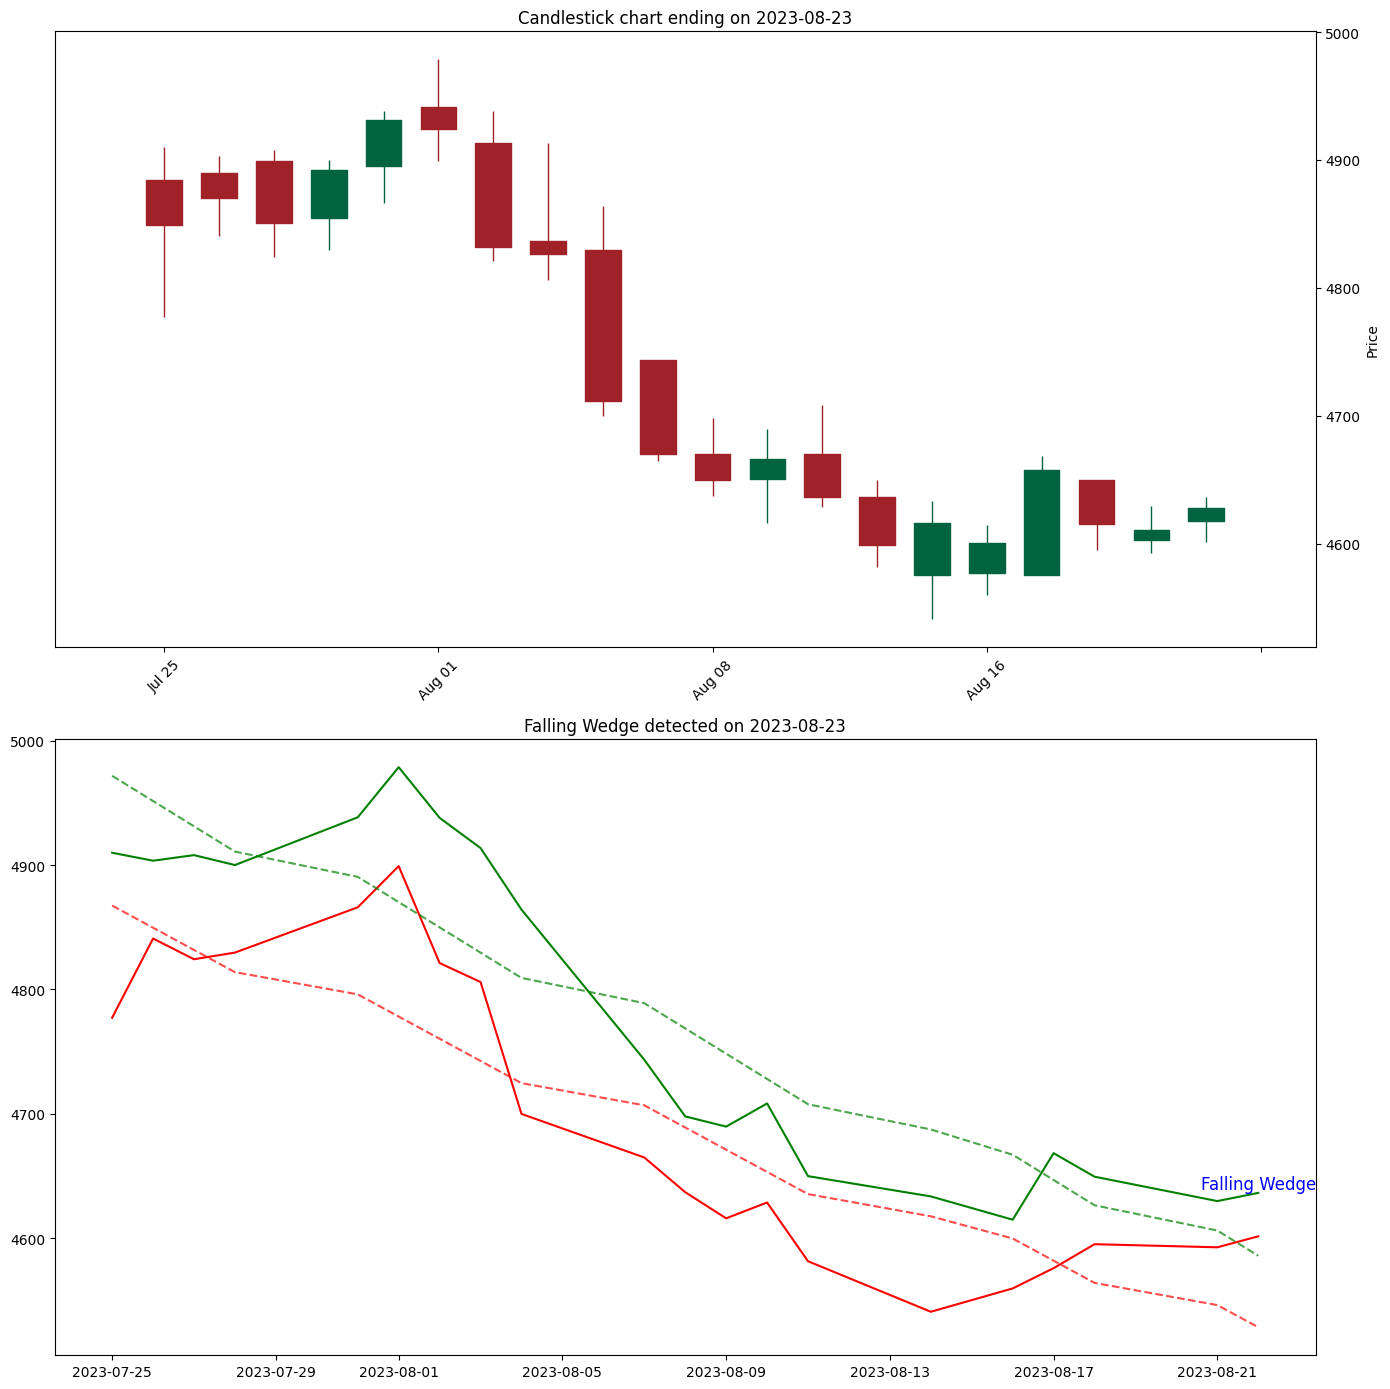

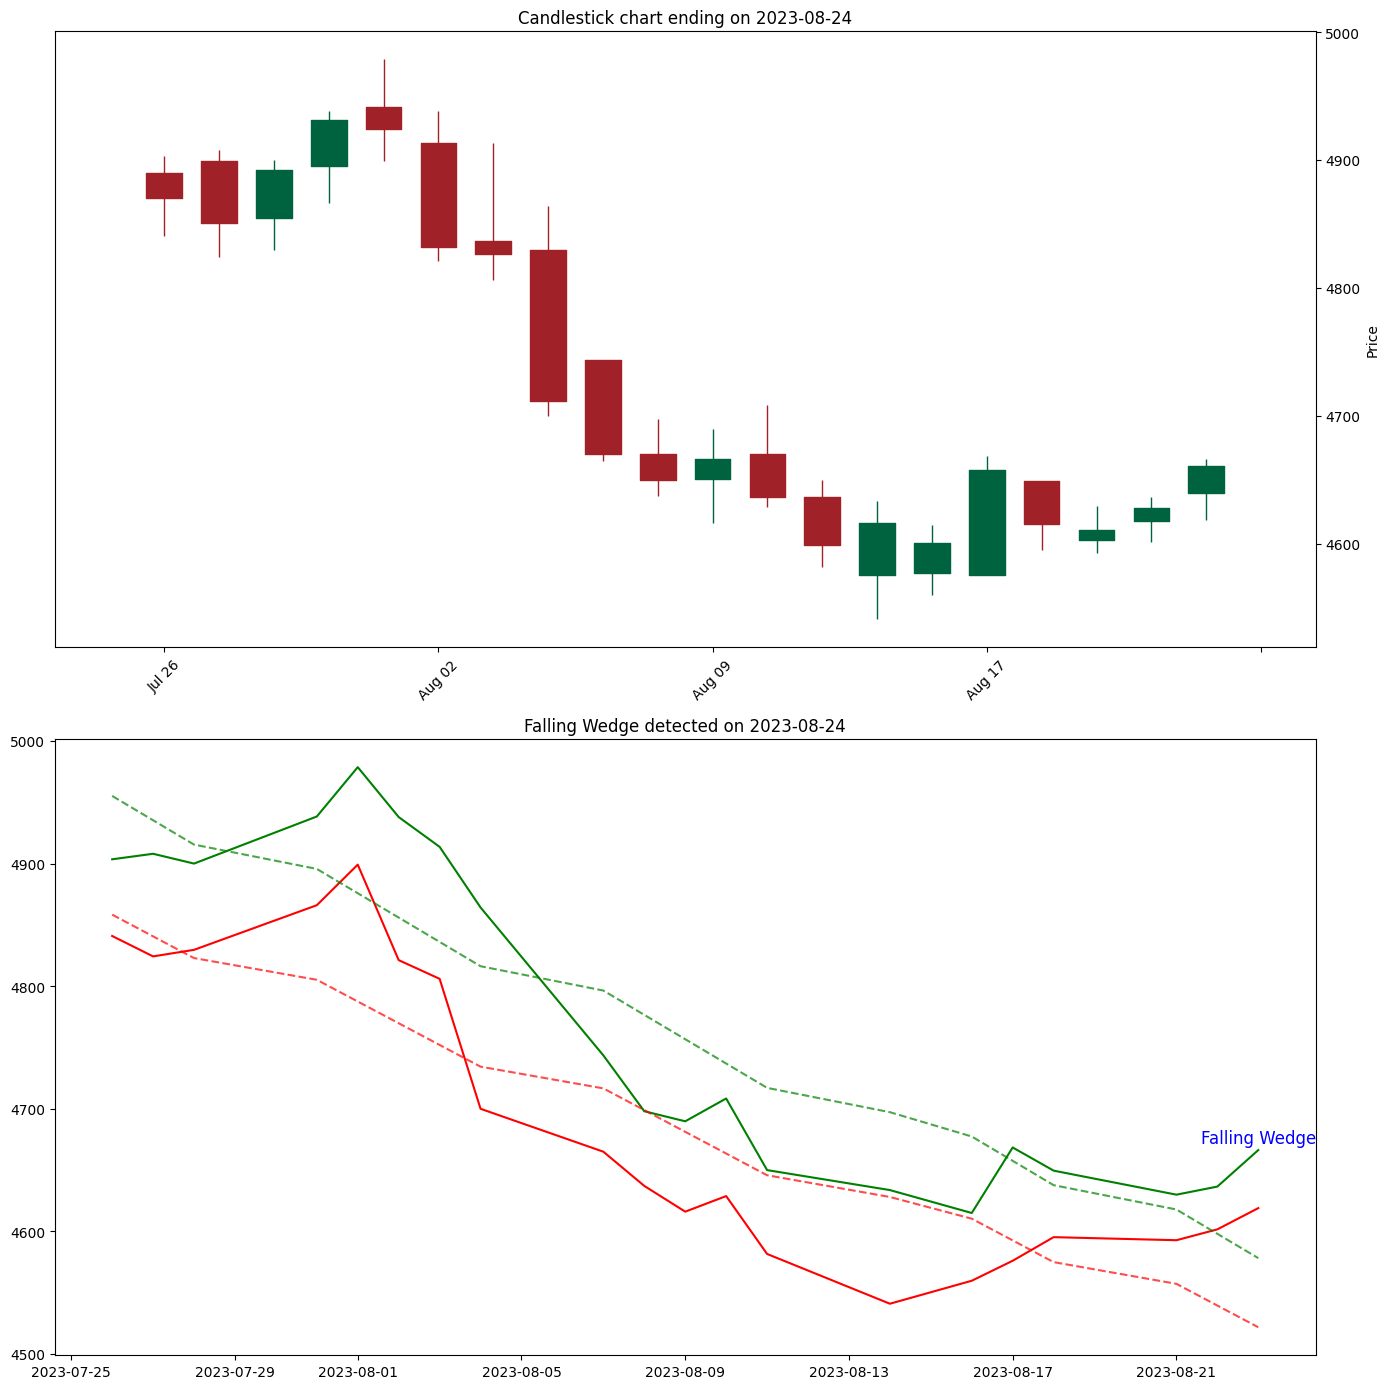

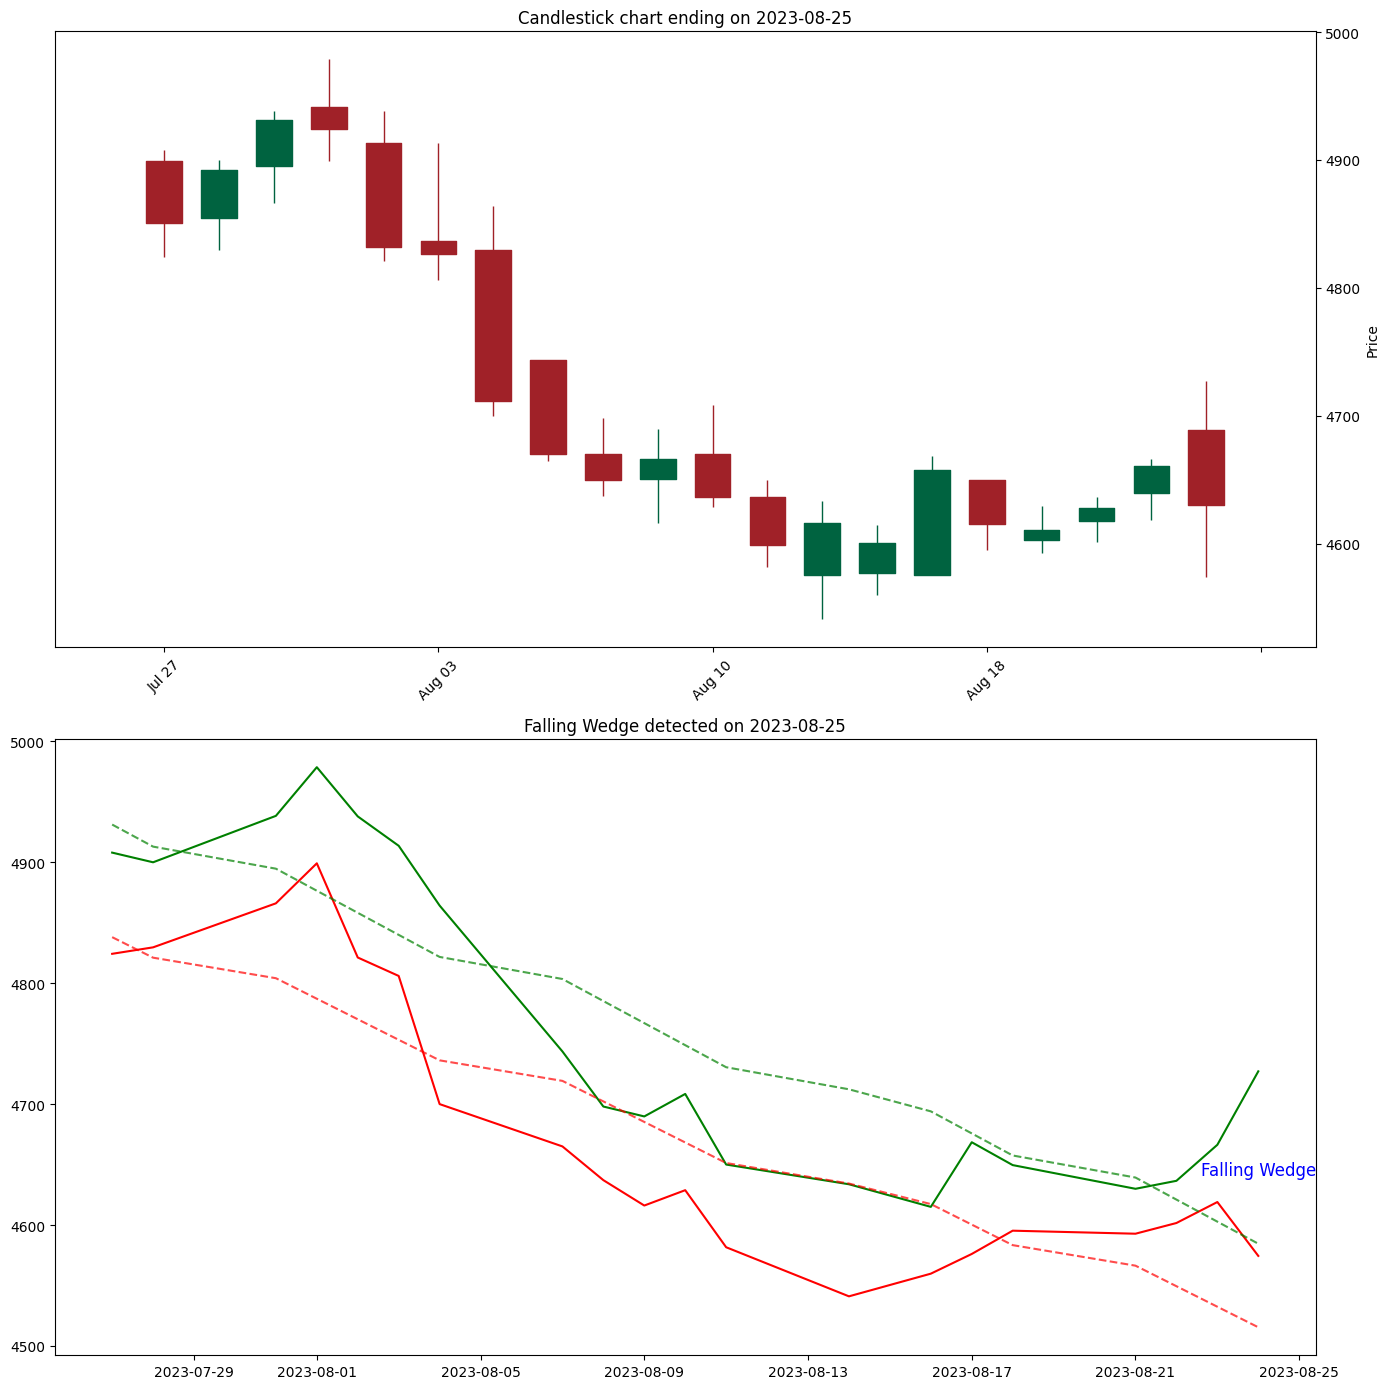

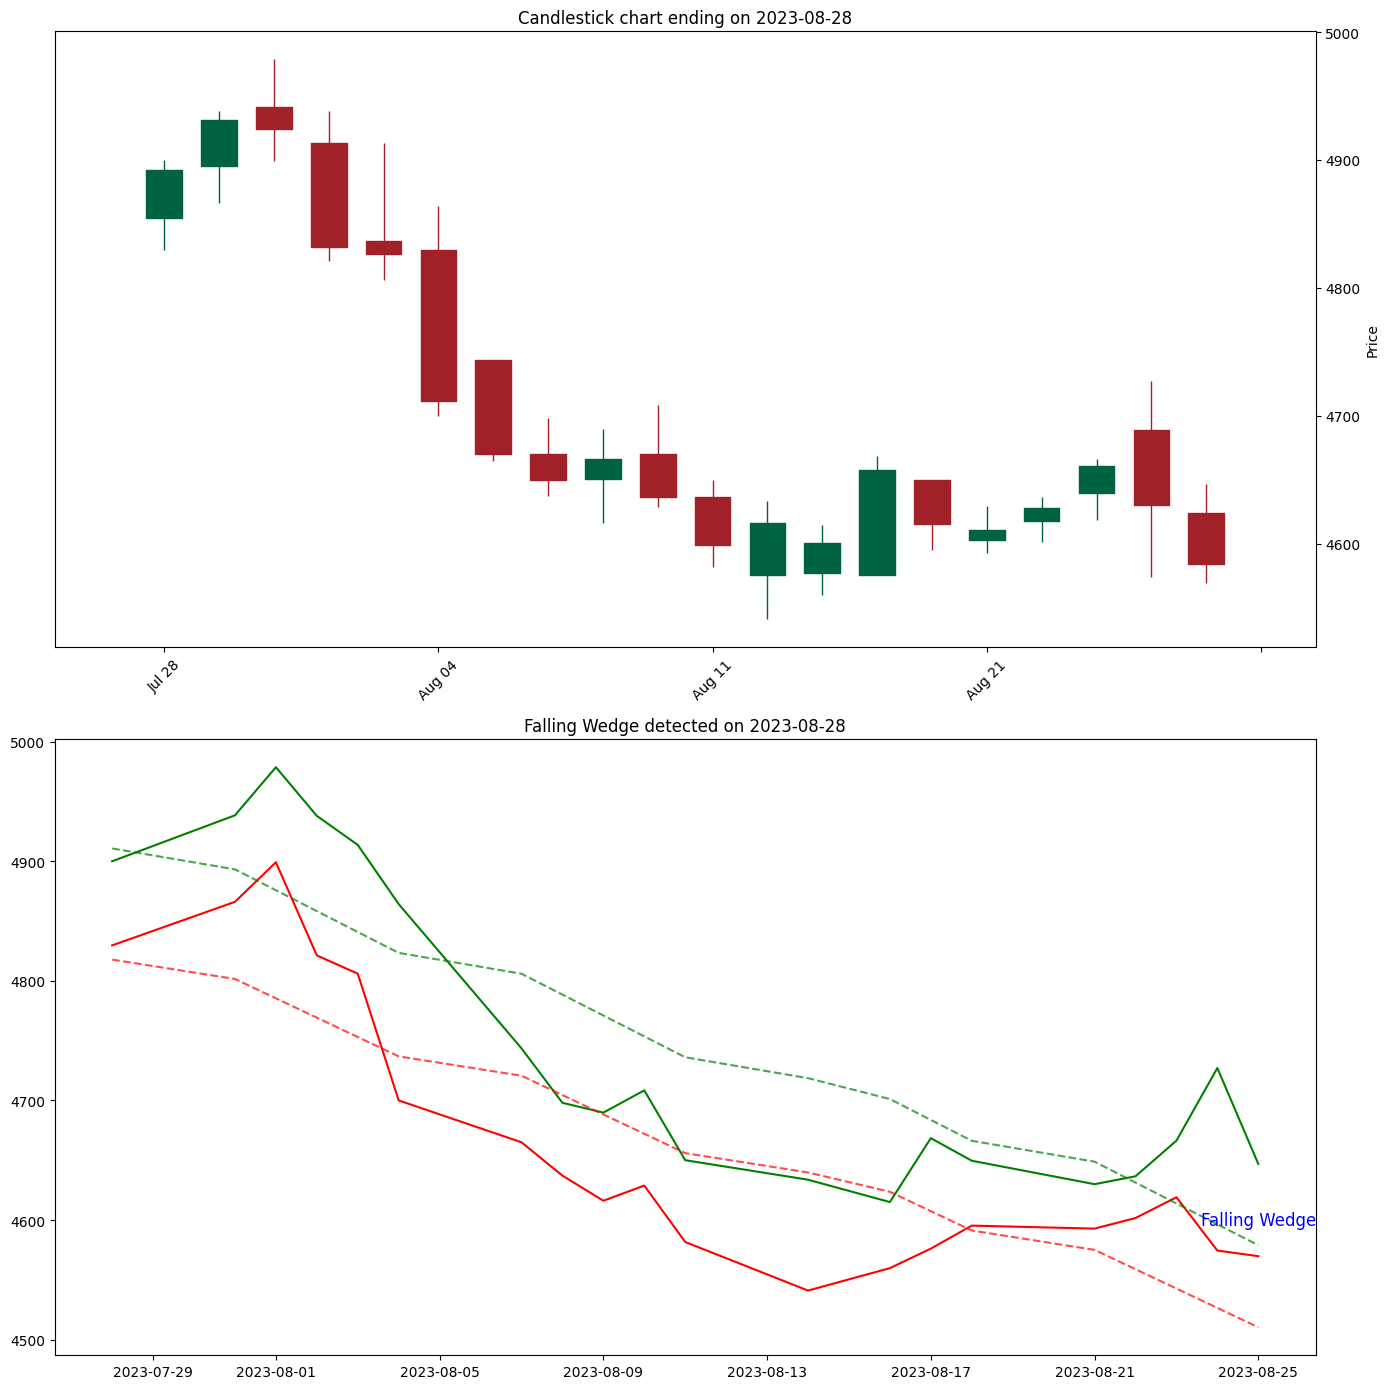

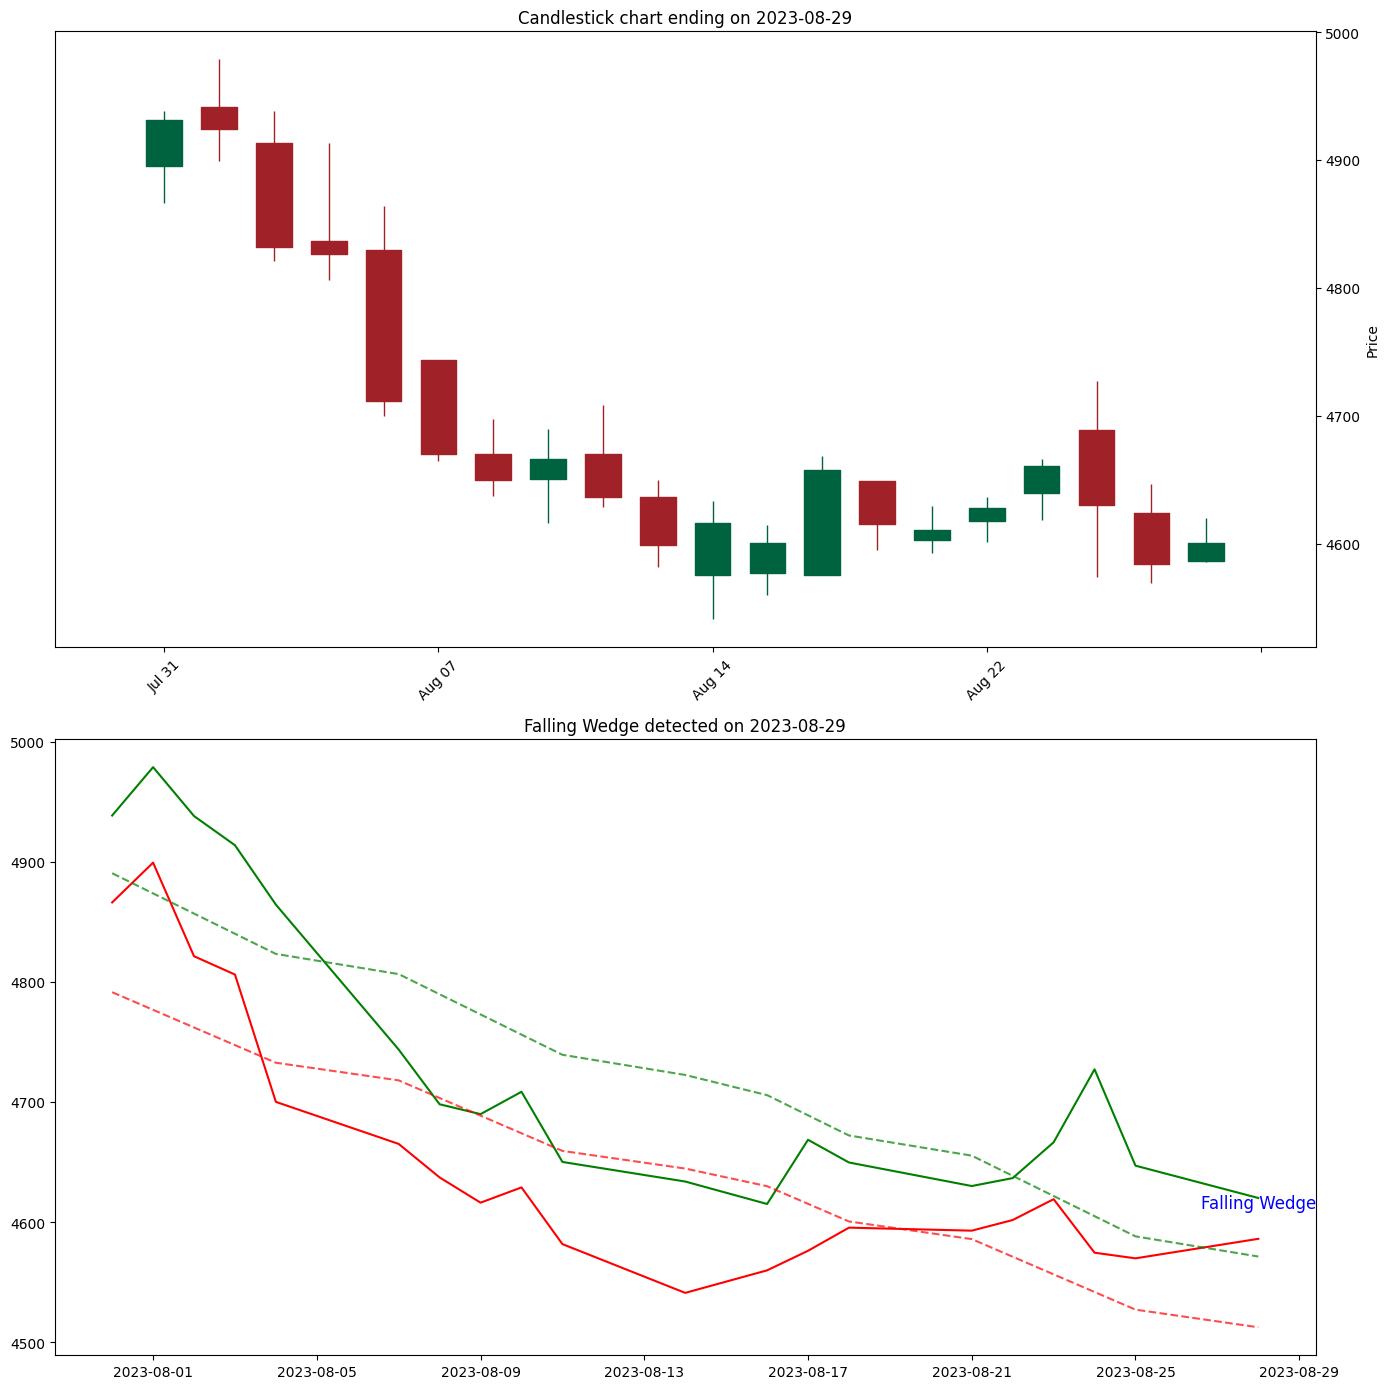

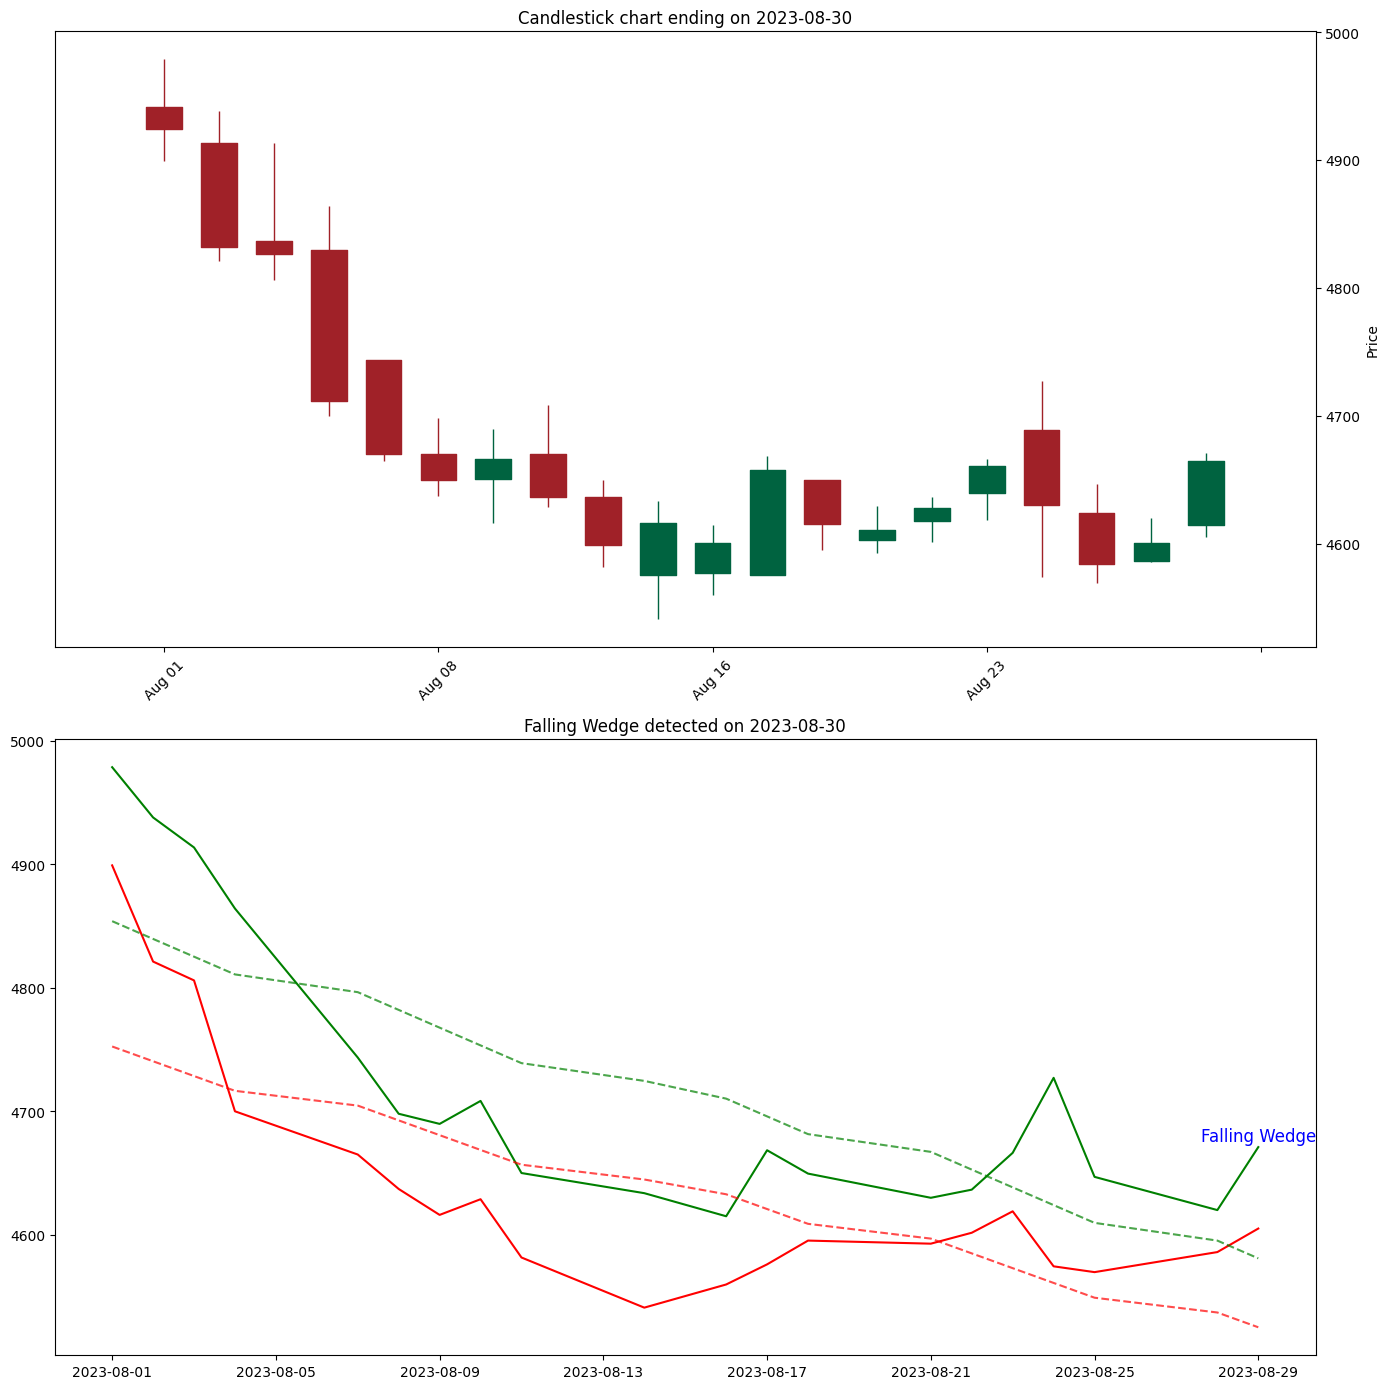

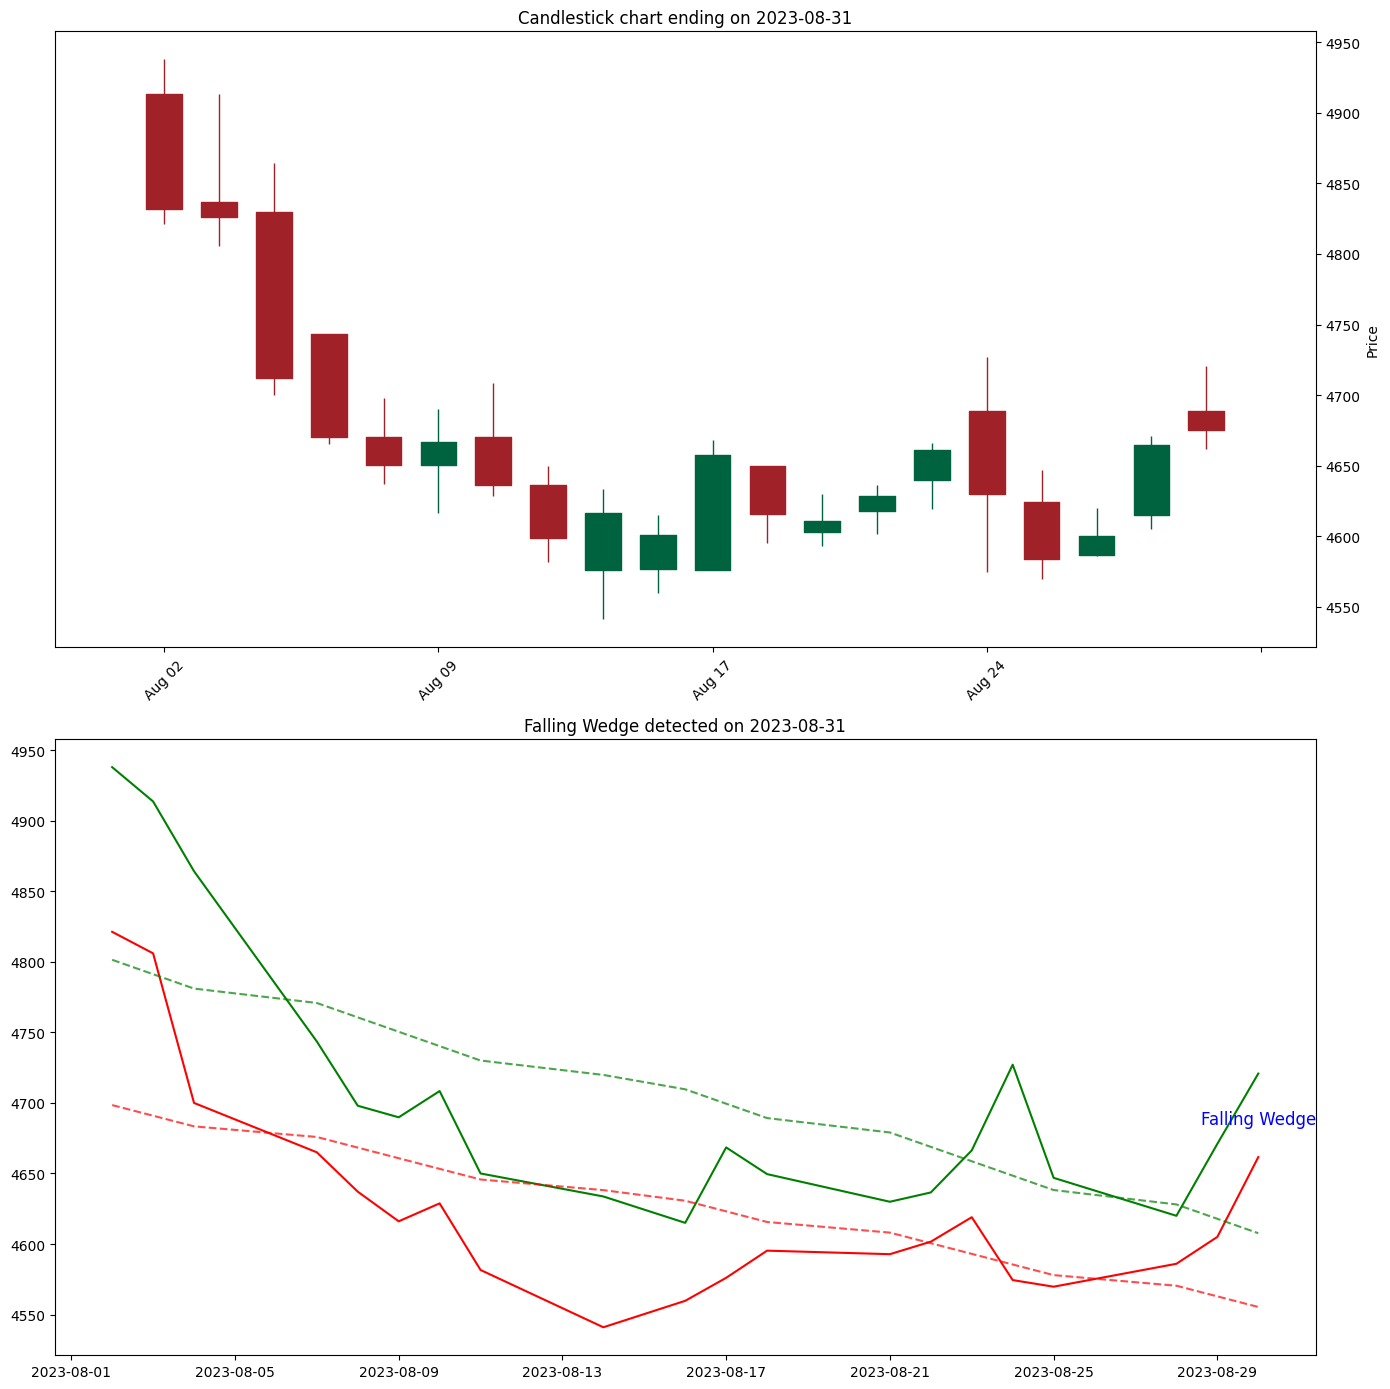

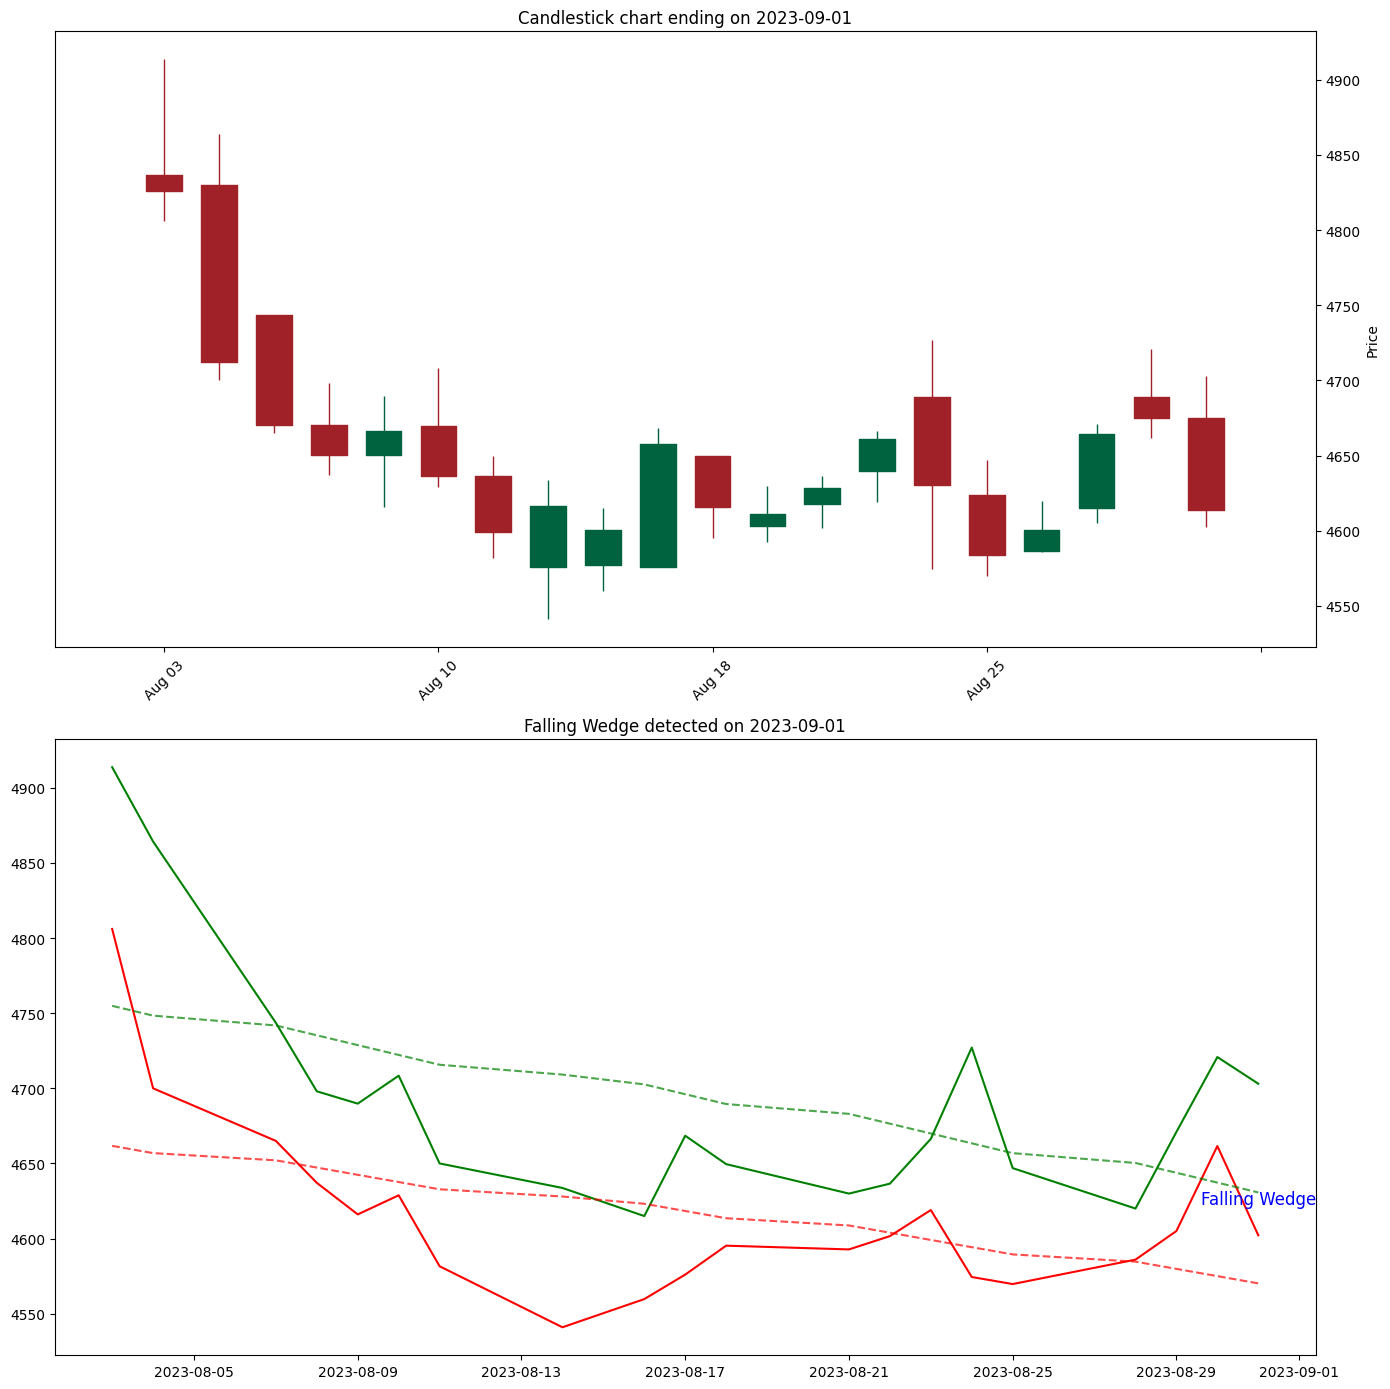

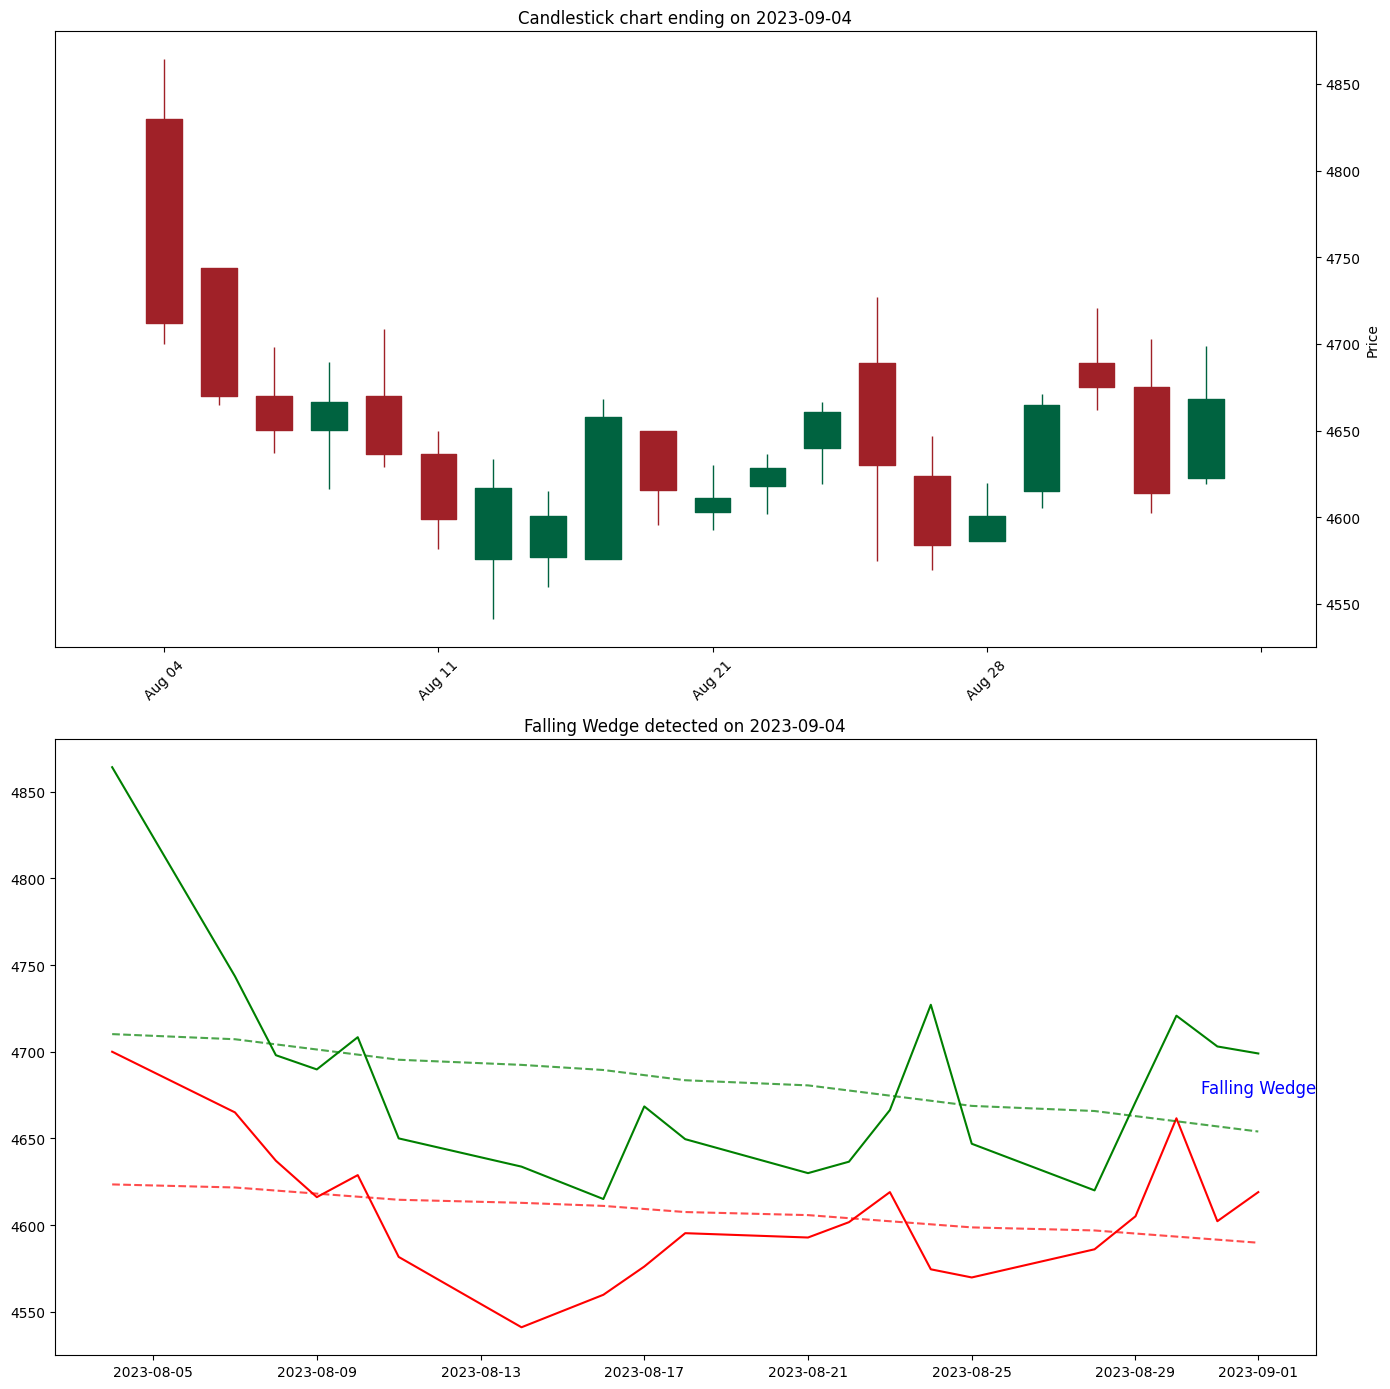

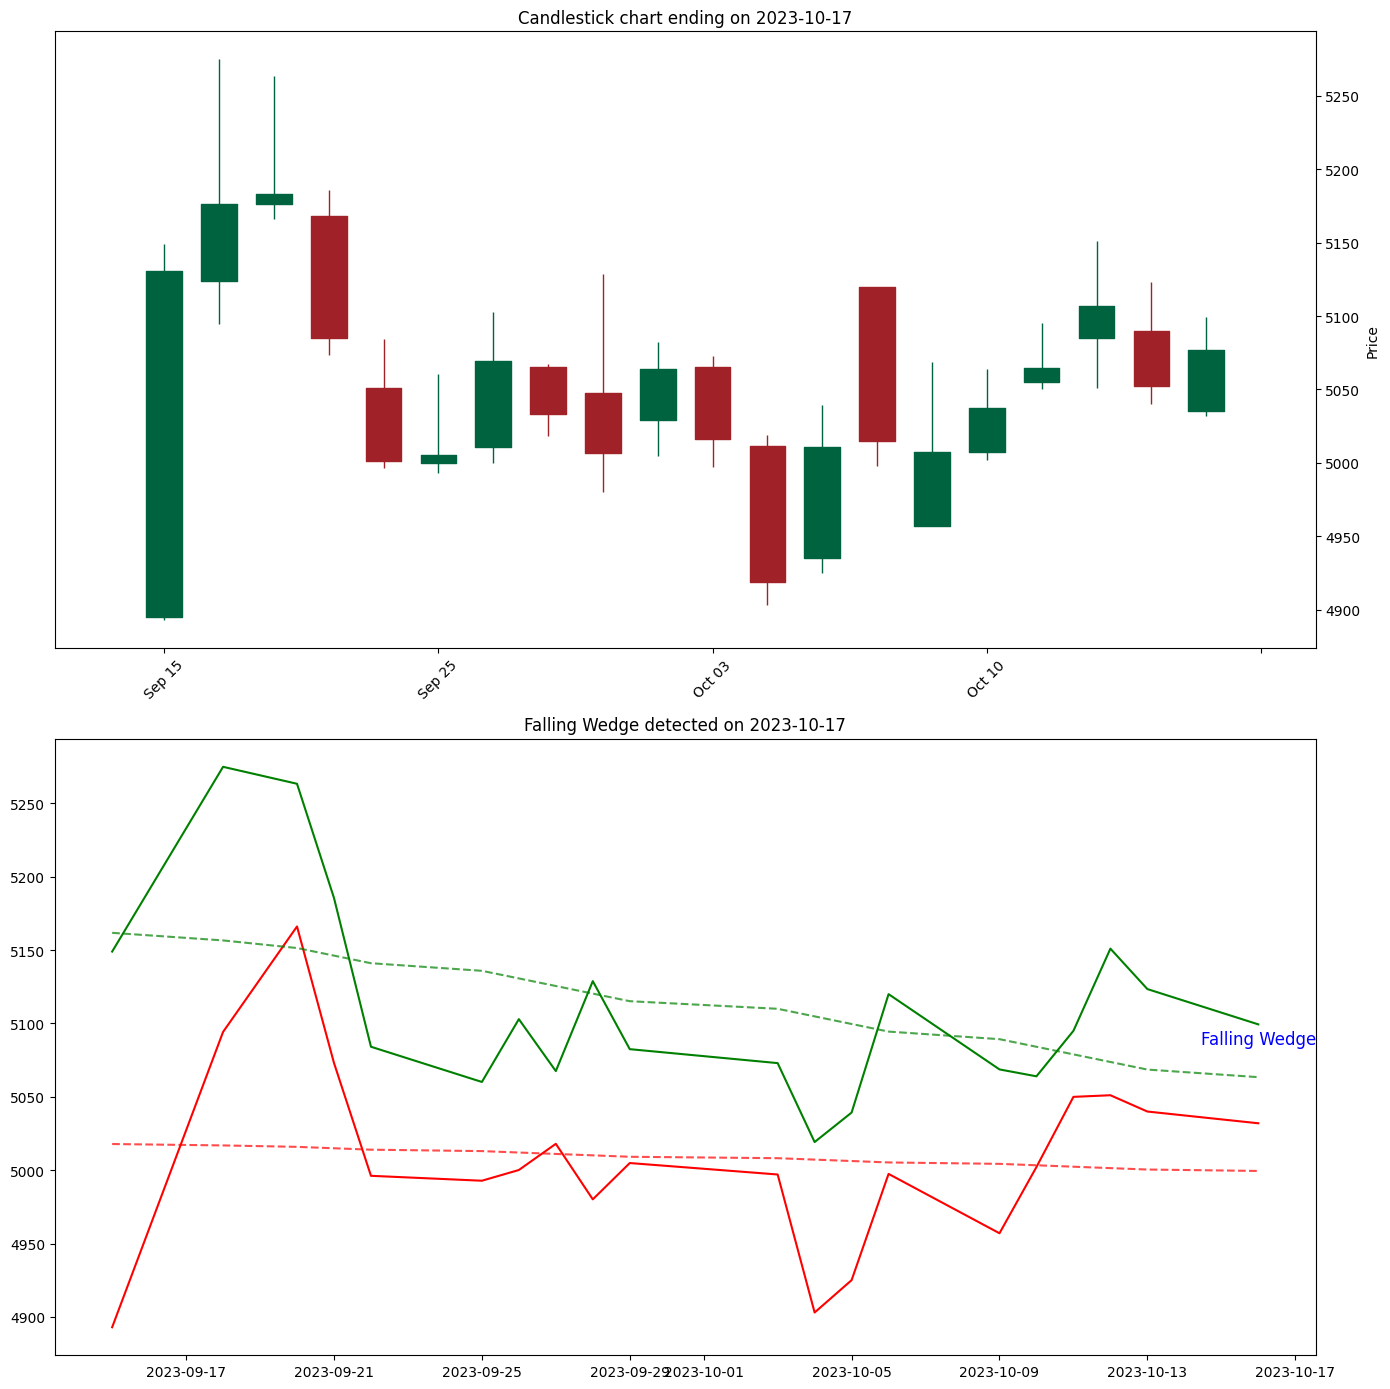

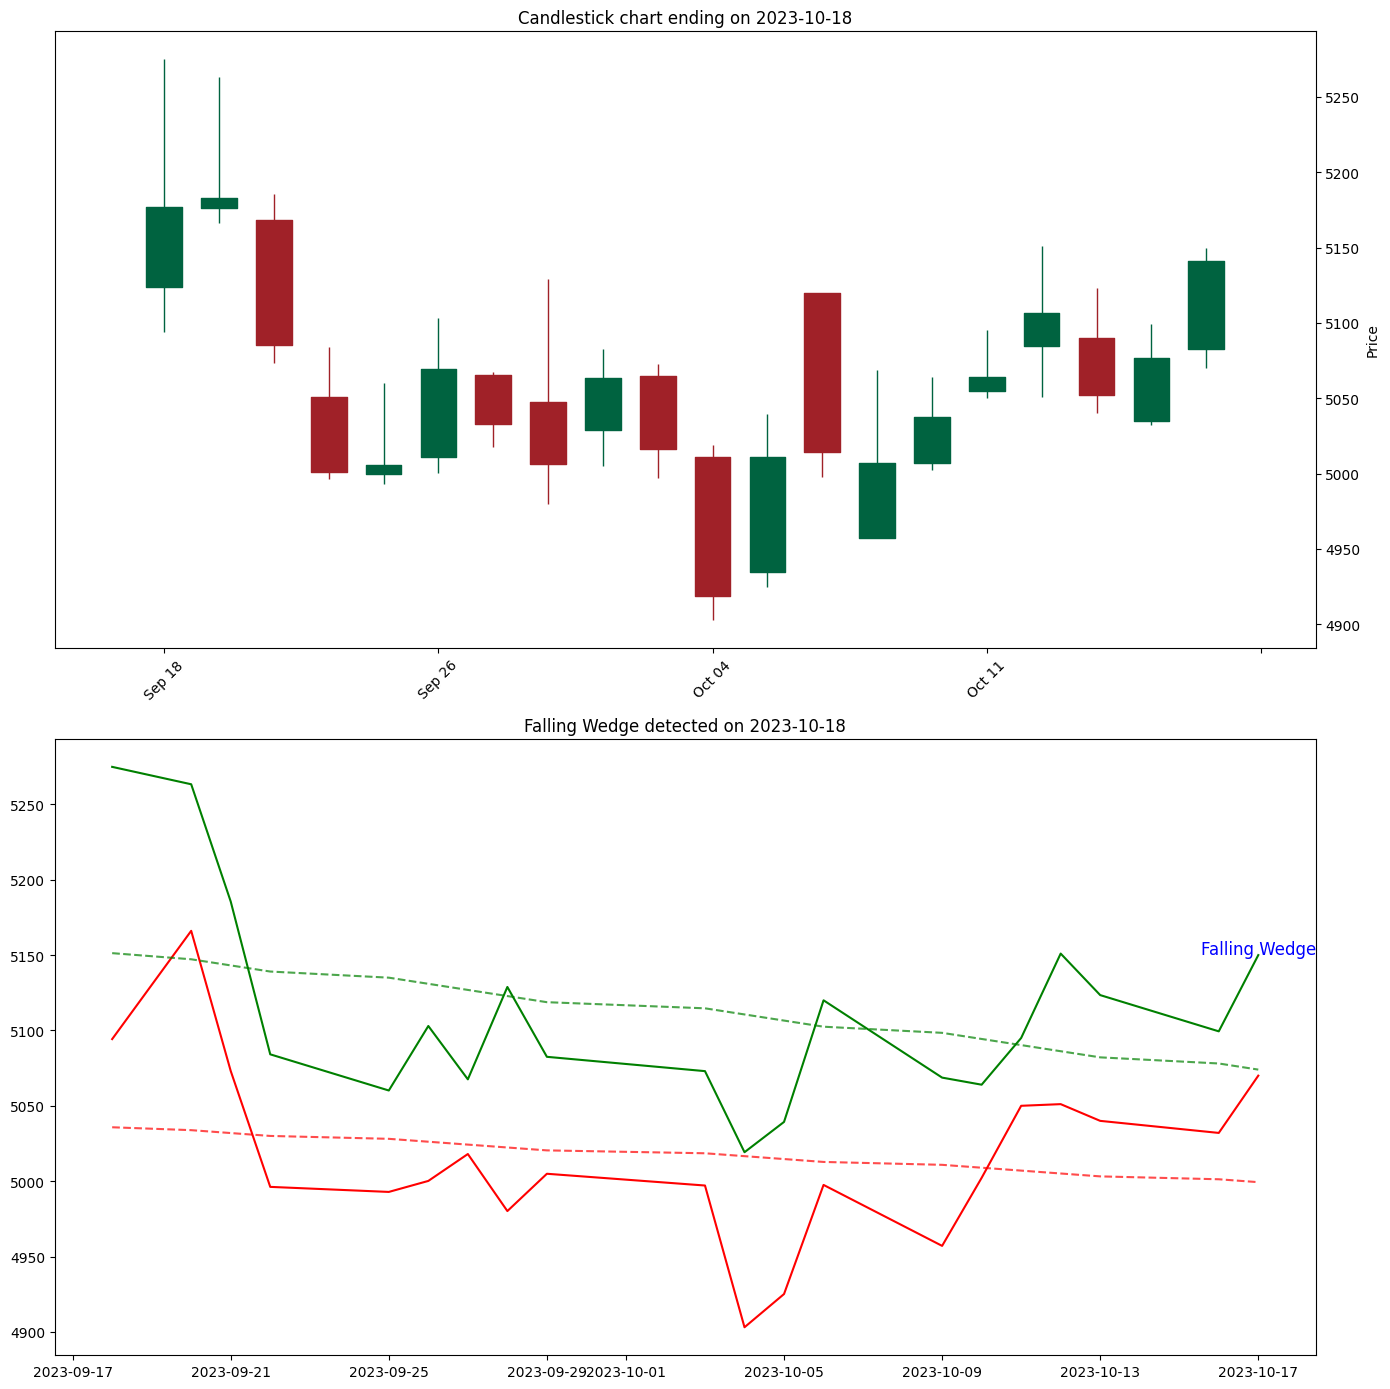

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

def find_wedges(data, lookback=20):
    wedges = []
    for i in range(lookback, len(data)):
        max_high = data['High'][i-lookback:i].max()
        min_low = data['Low'][i-lookback:i].min()
        
        upper_line = np.polyfit(range(lookback), data['High'][i-lookback:i], 1)
        lower_line = np.polyfit(range(lookback), data['Low'][i-lookback:i], 1)
        
        upper_slope = upper_line[0]
        lower_slope = lower_line[0]
        
        if upper_slope < 0 and lower_slope < 0:
            if abs(upper_slope) < abs(lower_slope):
                wedges.append((data.index[i], 'Rising Wedge'))
            else:
                wedges.append((data.index[i], 'Falling Wedge'))
                
    return wedges

def plot_wedges(data, wedges, lookback=20):
    for date, pattern in wedges:
        end_idx = data.index.get_loc(date)
        start_idx = end_idx - lookback
        
        subset_data = data.iloc[start_idx:end_idx]
        
        # Plotting candlestick chart
        fig, ax = plt.subplots(2, 1, figsize=(14, 14))
        
        mpf.plot(subset_data, type='candle', ax=ax[0], style='charles')
        ax[0].set_title(f'Candlestick chart ending on {date.strftime("%Y-%m-%d")}')
        
        # Plotting the wedge lines on a separate plot
        ax[1].plot(subset_data.index, subset_data['High'], label='High', color='green')
        ax[1].plot(subset_data.index, subset_data['Low'], label='Low', color='red')
        
        upper_line = np.polyfit(range(lookback), subset_data['High'], 1)
        lower_line = np.polyfit(range(lookback), subset_data['Low'], 1)
        
        upper_fit = np.polyval(upper_line, range(lookback))
        lower_fit = np.polyval(lower_line, range(lookback))
        
        ax[1].plot(subset_data.index, upper_fit, linestyle='--', color='green', alpha=0.7)
        ax[1].plot(subset_data.index, lower_fit, linestyle='--', color='red', alpha=0.7)
        
        ax[1].annotate(pattern, (subset_data.index[-1], subset_data['Close'][-1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, color='blue')
        ax[1].set_title(f'{pattern} detected on {date.strftime("%Y-%m-%d")}')
        
        plt.tight_layout()
        plt.show()

# Load your data
data_path = r'D:\AlgoT\yfinanceData\BAJAJ-AUTO.NS_OHLC_2023.csv'
data = pd.read_csv(data_path, parse_dates=['Date'])
data.set_index('Date', inplace=True)

# Find wedges
wedges = find_wedges(data)

# Display results
for wedge in wedges:
    print(wedge)

# Plot wedges
plot_wedges(data, wedges)
